# home-credit-bureau

# 索引
* [1. 載入 & 整理資料](#01)
    * [資料的型態、大小](#011)
    * [資料的空值分佈](#012)
    * [資料的名詞解釋](#013)    
* [2. 處理各種型別的資料](#02)
    * [類別型資料](#021)
    * [整數型資料](#022)
    * [浮點數型資料](#023)
* [3.特徵工程](#03)
    * [原資料的heatmap](#031)
    * [查看相關係數高者](#032)
    * [特徵篩選](#033)
* [4.Data Clearning](#04)
    * [copy bureau](#041)
    * [處理非空值欄位](#042) 
    * [處理空值欄位](#043)
    * [合併非空值、空值欄位](#044)
* [5.檢查異常值（abnormal value)](#05)
    * [處理整數型異常值欄位](#051)
    * [合併非空值、空值、整數異常值欄位](#052)
    * [處理浮點數型異常值欄位（abnormal value)](#053)
* [6.載入home-application-train](#06)
    * [資料的型態、大小](#061)
    * [提取Train_Target](#062)
* [7.載入home-application-test](#07)
    * [資料的型態、大小](#071)
    * [提取Test_SK_ID_CURR](#072)
* [8.驗證資料](#08)
    * [與訓練資料驗證](#081)
    * [與測試資料驗證](#082)
* [9.載入home-bureau_balance](#09)
    * [資料的型態、大小](#091)
    * [特徵篩選](#092)
    * [合併與訓練資料驗證](#093)
* [96.Sample](#96)
* [97.Test](#97)
* [98.待確](#98)
* [99.印出所有報告](#99)

* [NEW1](#109011601)
* [NEW2](#109011602)

## 摘要
#### * bureau合併train :  共1,716,428筆，1,350,805筆無違約，114,520筆有違約，251,103筆違約isnull--都是test資料集人員。
### 1090114
#### 1.CREDIT_ACTIVE & TARGET(驗證資料)
#### 2.CREDIT_TYPE& TARGET(驗證資料)
#### 3.bureau_balance的STATUS，依照MONTHS_BALANCE發生的比例合併到bureau(載入home-bureau_balance)
   


In [ ]:
#pip3 install plotly
#pip3 install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
#import pandas_profiling

## <a id=01>1. 載入 & 整理資料</a>

資料的基本數據

In [2]:
#group_3
#bureau=pd.read_csv("../../datasets/homecdt_eda/bureau.csv")

In [3]:
#家裡
# bureau=pd.read_csv("home-credit-default-risk/bureau.csv")# 所有資料

In [4]:
#!dir ..\..\bureau_balance.csv
#資策會
bureau=pd.read_csv("../../bureau.csv") # 所有資料

In [5]:
#dfTrain=pd.read_csv("../datasets/titanic/titanic_train.csv") # 訓練資料

In [6]:
bureau.head(5)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [7]:
bureau.tail(5)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
1716423        Microloan                 -19          NaN  
1716424  Consumer credit               -2493          NaN  
1716425  Consumer credit                -967          NaN  
1716426  Consumer credit               -1508          NaN  
1716427        Microloan                -387          NaN

[[Back to Top]](#索引)

### <a id=011>資料的型態、大小</a>

In [8]:
bureau.shape

(1716428, 17)

In [9]:
print('bureau : {:,} rows , {:,} columns , total data {:,}'.format(bureau.shape[0],bureau.shape[1],bureau.size))

bureau : 1,716,428 rows , 17 columns , total data 29,179,276


In [10]:
def total_info(data):
    
    #＊要改columns檔名
    data_shape=pd.DataFrame([data.shape[0],data.shape[1],data.size],index=['Row','Column','Total Data'],columns=['bureau'])
    data_type_counts=pd.DataFrame(data.dtypes.value_counts(),columns=['bureau'])
    data_shape_df=data_shape.append(data_type_counts)
    print(data_shape_df)
    

    #a欄位型態
    data_type=data.dtypes
    
    #b差異值數量
    uniques_num=data.apply(lambda x:x.unique().shape[0],axis=0)
    
    #c空值比例
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    
    #abc
    columns_data=pd.concat([data_type,uniques_num,total, percent], axis=1, keys=['Type','Uniques_Num','Missing_Total', 'Missing_Percent'],sort=False)
    return columns_data
    #return data_shape_df,columns_data

In [11]:
total_info(bureau)

              bureau
Row          1716428
Column            17
Total Data  29179276
float64            8
int64              6
object             3


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_CURR                int64       305811              0         0.000000
SK_ID_BUREAU              int64      1716428              0         0.000000
CREDIT_ACTIVE            object            4              0         0.000000
CREDIT_CURRENCY          object            4              0         0.000000
DAYS_CREDIT               int64         2923              0         0.000000
CREDIT_DAY_OVERDUE        int64          942              0         0.000000
DAYS_CREDIT_ENDDATE     float64        14097         105553         6.149573
DAYS_ENDDATE_FACT       float64         2918         633653        36.916958
AMT_CREDIT_MAX_OVERDUE  float64        68252        1124488        65.513264
CNT_CREDIT_PROLONG        int64           10              0         0.000000
AMT_CREDIT_SUM          float64       236709             13         0.000757
AMT_CREDIT_SUM_DEBT     float64       226538         257669        15.011932
AMT_CREDIT_SUM_LIMIT    float64        51727         591780        34.477415
AMT_CREDIT_SUM_OVERDUE  float64         1616              0         0.000000
CREDIT_TYPE              object           15              0         0.000000
DAYS_CREDIT_UPDATE        int64         2982              0         0.000000
AMT_ANNUITY             float64        40322        1226791        71.473490

[[Back to Top]](#索引)

### <a id=012>資料的空值分佈</a>

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    print('missing data')
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [13]:
missing_data(bureau)

missing data


Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_TYPE                   0   0.000000
AMT_CREDIT_SUM_OVERDUE        0   0.000000
CNT_CREDIT_PROLONG            0   0.000000
DAYS_CREDIT_UPDATE            0   0.000000
CREDIT_DAY_OVERDUE            0   0.000000
DAYS_CREDIT                   0   0.000000
CREDIT_CURRENCY               0   0.000000
CREDIT_ACTIVE                 0   0.000000
SK_ID_BUREAU                  0   0.000000
SK_ID_CURR                    0   0.000000

[[Back to Top]](#索引)

### <a id=013>資料的名詞解釋</a>

In [14]:
#kaggle參考資料：
#1.https://www.kaggle.com/c/home-credit-default-risk/discussion/62791
#(但欄位有缺資料)
#AMTCREDITSUM = AMTCREDITSUMLIMIT + AMTCREDITSUMDEBT
#AMT 信用額度= AMT 信用額度上限+ AMT信用額度債務
#AMT CREDIT SUM實際上可能表示信用卡限額，而AMT CREDIT SUM_LIMIT表示在給定信用卡限額的情況下當前還剩多少信用額

#2.

In [15]:
#bureau.info()

[[Back to Top]](#索引)

## <a id=02>2. 處理各種型別的資料</a>

### <a id=021>類別型資料</a>

In [16]:
def columns_object(data):
    columns_object= data.columns[data.dtypes == 'object']
    columns_object_pd =pd.DataFrame(columns_object,columns=['類別型欄位'])

    unique_object = data.select_dtypes(include=['object']).nunique()
    unique_object_pd=pd.DataFrame(unique_object,columns=['Unique_Num'])
    
    print('類別型欄位計共 {} 個。'.format(len(data.select_dtypes(include=['object']).columns)))
    print('')
    
    print(pd.merge(columns_object_pd,unique_object_pd,left_on='類別型欄位',right_index=True))


In [17]:
columns_object(bureau)

類別型欄位計共 3 個。

             類別型欄位  Unique_Num
0    CREDIT_ACTIVE           4
1  CREDIT_CURRENCY           4
2      CREDIT_TYPE          15


Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64


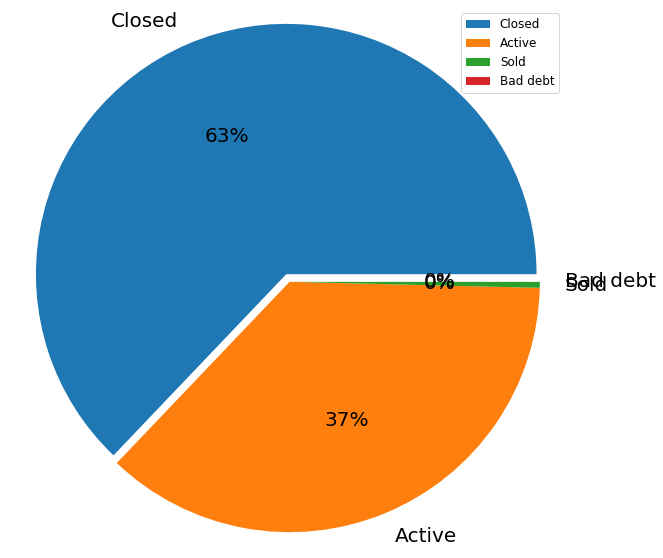

In [18]:
temp = bureau['CREDIT_ACTIVE'].value_counts()
#df = pd.DataFrame({'labels': temp.index,
#                  'values': temp.values
#                  })
#df.iplot(kind='pie',labels='labels',values='values', title='Family Status of Applicant\'s', hole = 0.5)
print(temp)
plt.figure(figsize=(10,10)) 
explode = (0.5,0,0,0)
plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'}, explode=explode, radius = 15)
#plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'})
plt.axis('equal')
plt.legend(loc = "upper right",fontsize="large")

plt.show()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64


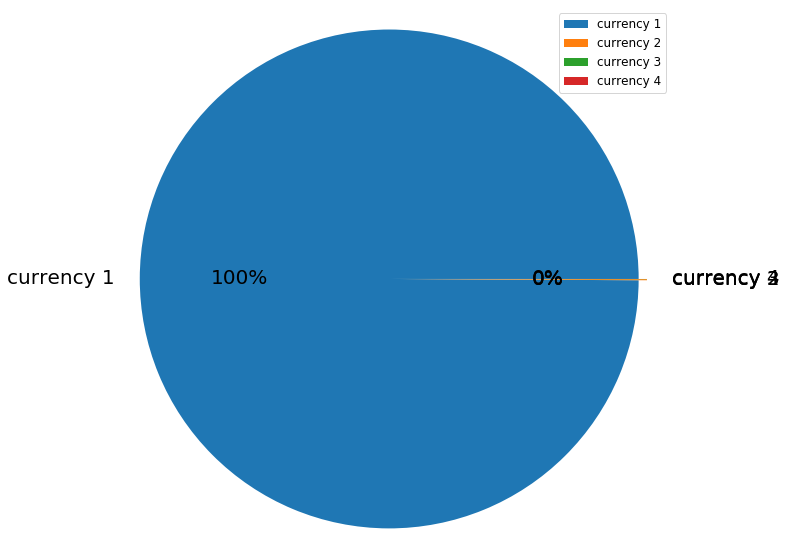

In [19]:
temp = bureau['CREDIT_CURRENCY'].value_counts()
#df = pd.DataFrame({'labels': temp.index,
#                  'values': temp.values
#                  })
#df.iplot(kind='pie',labels='labels',values='values', title='Family Status of Applicant\'s', hole = 0.5)
print(temp)
plt.figure(figsize=(10,10)) 
explode = (0.5,0,0,0)
plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'}, explode=explode, radius = 15)
#plt.pie(temp,labels=temp.index,autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'})
plt.axis('equal')
plt.legend(loc = "best",fontsize="large")

plt.show()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64


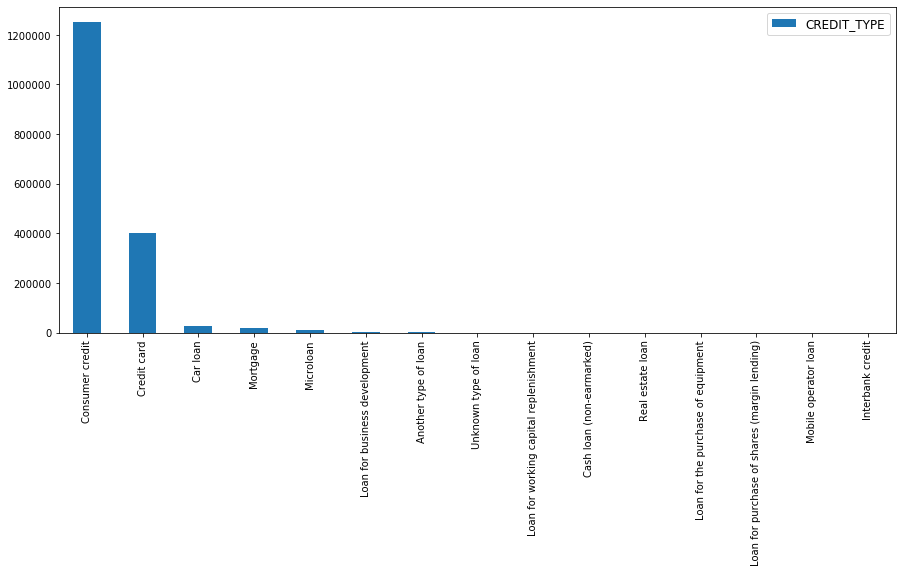

In [20]:
temp = bureau['CREDIT_TYPE'].value_counts()
print(temp)
plt.figure(figsize=(15,6)) 
temp.plot(kind='bar')
plt.legend(loc = "best",fontsize="large")

[[Back to Top]](#索引)

### <a id=022>整數型資料</a>

In [21]:
def int64_float64_describe(data):
    return(data.describe())

In [22]:
int64_float64_describe(bureau)

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [23]:
#bureau_int64 = bureau.columns[bureau.dtypes == 'int64']
#pd.DataFrame(bureau_int64,columns=['整數型欄位'])

In [24]:
def columns_int64(data):
    columns_int64= data.columns[data.dtypes == 'int64']
    columns_int64_pd =pd.DataFrame(columns_int64,columns=['整數型欄位'])

    unique_int64 = data.select_dtypes(include=['int64']).nunique()
    unique_int64_pd=pd.DataFrame(unique_int64,columns=['Unique_Num'])
    print('整數型欄位計共 {} 個。'.format(len(data.select_dtypes(include=['int64']).columns)))
    print('')
    print(pd.merge(columns_int64_pd,unique_int64_pd,left_on='整數型欄位',right_index=True))
    
    return data.describe()

In [25]:
columns_int64(bureau)

整數型欄位計共 6 個。

                整數型欄位  Unique_Num
0          SK_ID_CURR      305811
1        SK_ID_BUREAU     1716428
2         DAYS_CREDIT        2923
3  CREDIT_DAY_OVERDUE         942
4  CNT_CREDIT_PROLONG          10
5  DAYS_CREDIT_UPDATE        2982


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

<function matplotlib.pyplot.show(*args, **kw)>

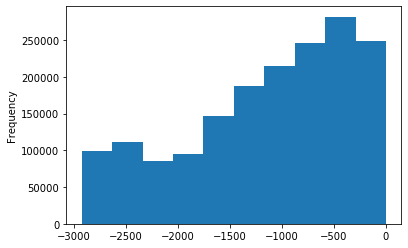

In [26]:
bureau["DAYS_CREDIT"].plot.hist()
plt.show

Text(0.5, 1.0, 'DAYS_CREDIT_UPDATE')

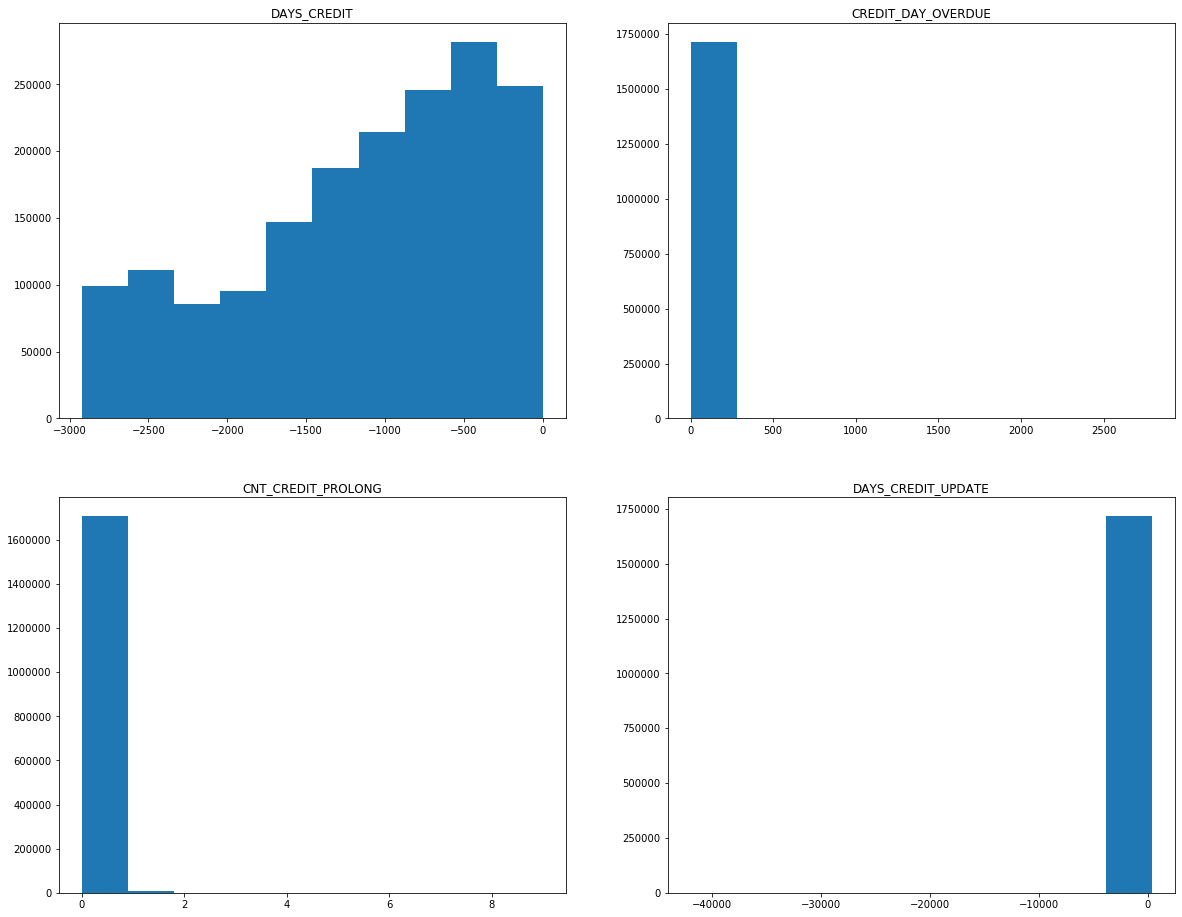

In [27]:
plt.figure(figsize = (20, 16))
#客戶在申請前幾天內申請了信貸局信貸
plt.subplot(2,2,1)
plt.hist(bureau["DAYS_CREDIT"]);
plt.title("DAYS_CREDIT")

#在申請相關貸款時，信貸的逾期天數
plt.subplot(2,2,2)
plt.hist(bureau["CREDIT_DAY_OVERDUE"]);
plt.title("CREDIT_DAY_OVERDUE")

#信貸延長次數
plt.subplot(2,2,3)
plt.hist(bureau["CNT_CREDIT_PROLONG"]);
plt.title("CNT_CREDIT_PROLONG")

#離上次收到貸款訊息幾天了
plt.subplot(2,2,4)
plt.hist(bureau["DAYS_CREDIT_UPDATE"]);
plt.title("DAYS_CREDIT_UPDATE")

In [28]:
temp=bureau["CREDIT_DAY_OVERDUE"].value_counts()
print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp )

0       1712211
30          311
60          126
13          103
8           103
         ...   
1548          1
1546          1
519           1
2565          1
372           1
Name: CREDIT_DAY_OVERDUE, Length: 942, dtype: int64


In [29]:
temp=bureau["CNT_CREDIT_PROLONG"].value_counts()
print(temp)

0    1707314
1       7620
2       1222
3        191
4         54
5         21
9          2
6          2
8          1
7          1
Name: CNT_CREDIT_PROLONG, dtype: int64


In [30]:
temp=bureau["DAYS_CREDIT_UPDATE"].value_counts()
print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp )

-7        18503
-8        18462
-11       16975
-15       16870
-12       16827
          ...  
-2882         1
 16           1
-41886        1
-41905        1
-41853        1
Name: DAYS_CREDIT_UPDATE, Length: 2982, dtype: int64


In [31]:
pd.set_option("display.max_rows",None)
bureau[bureau["SK_ID_CURR"]==215354].sort_values(by=["SK_ID_BUREAU"])

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
225157      215354       5714458        Closed      currency 1        -1872   
225158      215354       5714459        Closed      currency 1        -1734   
225159      215354       5714460        Closed      currency 1        -1333   
225160      215354       5714461        Closed      currency 1        -1011   
0           215354       5714462        Closed      currency 1         -497   
1           215354       5714463        Active      currency 1         -208   
2           215354       5714464        Active      currency 1         -203   
3           215354       5714465        Active      currency 1         -203   
4           215354       5714466        Active      currency 1         -629   
5           215354       5714467        Active      currency 1         -273   
6           215354       5714468        Active      currency 1          -43   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
225157                   0               -776.0            -1203.0   
225158                   0               -638.0            -1336.0   
225159                   0              -1089.0             -987.0   
225160                   0               -830.0             -770.0   
0                        0               -153.0             -153.0   
1                        0               1075.0                NaN   
2                        0                528.0                NaN   
3                        0                  NaN                NaN   
4                        0               1197.0                NaN   
5                        0              27460.0                NaN   
6                        0                 79.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
225157                     NaN                   0        494550.0   
225158                     NaN                   0       1084032.0   
225159                     NaN                   0        102150.0   
225160                     NaN                   0        500463.0   
0                          NaN                   0         91323.0   
1                          NaN                   0        225000.0   
2                          NaN                   0        464323.5   
3                          NaN                   0         90000.0   
4                      77674.5                   0       2700000.0   
5                          0.0                   0        180000.0   
6                          0.0                   0         42103.8   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
225157                 0.00                  0.00                     0.0   
225158                 0.00                   NaN                     0.0   
225159                  NaN                   NaN                     0.0   
225160                  NaN                   NaN                     0.0   
0                      0.00                   NaN                     0.0   
1                 171342.00                   NaN                     0.0   
2                       NaN                   NaN                     0.0   
3                       NaN                   NaN                     0.0   
4                       NaN                   NaN                     0.0   
5                  71017.38             108982.62                     0.0   
6                  42103.80                  0.00                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
225157  Consumer credit                -696          NaN  
225158         Car loan               -1336          NaN  
225159  Consumer credit                -984          NaN  
225160  Consumer credit                -767          NaN  
0       Consumer credit                -131          NaN  
1           Credit card                 -20          NaN  
2       Consumer credit                

[[Back to Top]](#索引)

### <a id=023>浮點數型資料</a>

In [32]:
#bureau_float64 = bureau.columns[bureau.dtypes == 'float64']
#pd.DataFrame(bureau_float64,columns=['浮點數型欄位'])

In [33]:
def columns_float64(data):
    columns_float64= data.columns[data.dtypes == 'float64']
    columns_float64_pd =pd.DataFrame(columns_float64,columns=['浮點數型欄位'])

    unique_float64 = data.select_dtypes(include=['float64']).nunique()
    unique_float64_pd=pd.DataFrame(unique_float64,columns=['Unique_Num'])
    print('浮點數型欄位計共 {} 個。'.format(len(data.select_dtypes(include=['float64']).columns)))
    print('')
    print(pd.merge(columns_float64_pd,unique_float64_pd,left_on='浮點數型欄位',right_index=True))
    
    return data.describe()

In [34]:
columns_float64(bureau)

浮點數型欄位計共 8 個。

                   浮點數型欄位  Unique_Num
0     DAYS_CREDIT_ENDDATE       14096
1       DAYS_ENDDATE_FACT        2917
2  AMT_CREDIT_MAX_OVERDUE       68251
3          AMT_CREDIT_SUM      236708
4     AMT_CREDIT_SUM_DEBT      226537
5    AMT_CREDIT_SUM_LIMIT       51726
6  AMT_CREDIT_SUM_OVERDUE        1616
7             AMT_ANNUITY       40321


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



DAYS_CREDIT_ENDDATE(申請“Home Credit”時，信貸局信貸的剩餘期限)：資料顯示天數為整數.0，有正負數。異常。
DAYS_ENDDATE_FACT(申請“Home Credit”時，信貸局信貸終止後的天數)：資料顯示天數為整數.0。
AMT_CREDIT_MAX_OVERDUE(逾期的最大金額)：逾期金額為0者最多：470650位，已剔除。
AMT_CREDIT_SUM(貸局信貸的當前信貸金額)：金額為0者最多：66582位，已剔除。
AMT_CREDIT_SUM_DEBT(信貸局信貸的流動負債)：金額為0者最多： 1016434位，已剔除。有正負數-4.500000e+02：543位。異常。
AMT_CREDIT_SUM_LIMIT(當前的信用卡額度)：金額為0者最多：1050142 位，已剔除。
AMT_CREDIT_SUM_OVERDUE(當前逾期金額)：金額為0者最多： 1712270位，已剔除。
AMT_ANNUITY(先前申請的年金，約定每年要償還的金額)：金額為0者最多：256915 位，已剔除。


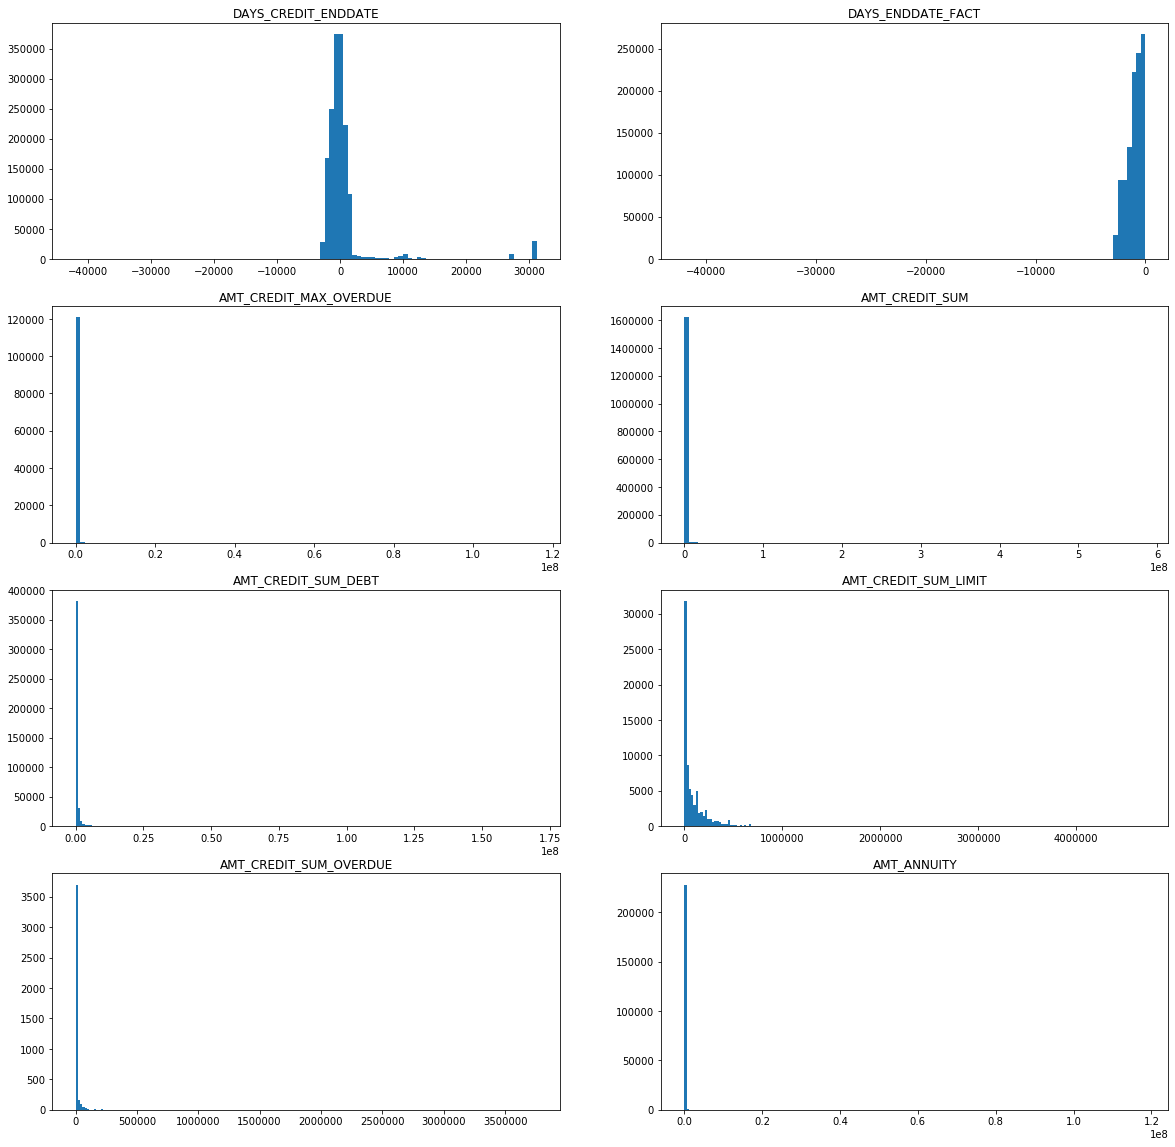

In [35]:
plt.figure(figsize = (20, 20))
#申請“Home Credit”時，信貸局信貸的剩餘期限
plt.subplot(4,2,1)
plt.hist(bureau["DAYS_CREDIT_ENDDATE"], bins=100);
plt.title("DAYS_CREDIT_ENDDATE")
print('DAYS_CREDIT_ENDDATE(申請“Home Credit”時，信貸局信貸的剩餘期限)：資料顯示天數為整數.0，有正負數。異常。')

#申請“Home Credit”時，信貸局信貸終止後的天數
plt.subplot(4,2,2)
plt.hist(bureau["DAYS_ENDDATE_FACT"], bins=100);
plt.title("DAYS_ENDDATE_FACT")
print('DAYS_ENDDATE_FACT(申請“Home Credit”時，信貸局信貸終止後的天數)：資料顯示天數為整數.0。')

#逾期的最大金額
plt.subplot(4,2,3)
plt.hist(bureau["AMT_CREDIT_MAX_OVERDUE"], bins=100,range=(4.500000e+00 ,1.159872e+08));
plt.title("AMT_CREDIT_MAX_OVERDUE")
print('AMT_CREDIT_MAX_OVERDUE(逾期的最大金額)：逾期金額為0者最多：470650位，已剔除。')

#信貸局信貸的當前信貸金額
plt.subplot(4,2,4)
plt.hist(bureau["AMT_CREDIT_SUM"], bins=100,range=(1.350000e+04 , 5.850000e+08));
plt.title("AMT_CREDIT_SUM")
print('AMT_CREDIT_SUM(貸局信貸的當前信貸金額)：金額為0者最多：66582位，已剔除。')


#信貸局信貸的流動負債
plt.subplot(4,2,5)
plt.hist(bureau["AMT_CREDIT_SUM_DEBT"], bins=200,range= (4.500000e+00, 1.701000e+08));
plt.title("AMT_CREDIT_SUM_DEBT")
print('AMT_CREDIT_SUM_DEBT(信貸局信貸的流動負債)：金額為0者最多： 1016434位，已剔除。有正負數-4.500000e+02：543位。異常。')

         
#當前的信用卡額度
plt.subplot(4,2,6)
plt.hist(bureau["AMT_CREDIT_SUM_LIMIT"] , bins=200,range= (4.500,4.705600e+06));
plt.title("AMT_CREDIT_SUM_LIMIT")
print('AMT_CREDIT_SUM_LIMIT(當前的信用卡額度)：金額為0者最多：1050142 位，已剔除。')

#當前逾期金額
plt.subplot(4,2,7)
plt.hist(bureau["AMT_CREDIT_SUM_OVERDUE"], bins=200,range= (4.500,3.756681e+06));
plt.title("AMT_CREDIT_SUM_OVERDUE")
print('AMT_CREDIT_SUM_OVERDUE(當前逾期金額)：金額為0者最多： 1712270位，已剔除。')

#先前申請的年金，約定每年要償還的金額
plt.subplot(4,2,8)
plt.hist(bureau["AMT_ANNUITY"], bins=200,range= (1.350000e+03,1.184534e+08));
plt.title("AMT_ANNUITY")
print('AMT_ANNUITY(先前申請的年金，約定每年要償還的金額)：金額為0者最多：256915 位，已剔除。')


In [36]:
bureau["DAYS_CREDIT_ENDDATE"].describe()

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [37]:
#temp = bureau["DAYS_CREDIT_ENDDATE"].value_counts()
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp)

In [38]:
bureau["DAYS_ENDDATE_FACT"].describe()

count    1.082775e+06
mean    -1.017437e+03
std      7.140106e+02
min     -4.202300e+04
25%     -1.489000e+03
50%     -8.970000e+02
75%     -4.250000e+02
max      0.000000e+00
Name: DAYS_ENDDATE_FACT, dtype: float64

In [39]:
#temp=bureau["DAYS_ENDDATE_FACT"].value_counts()
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp)

In [40]:
bureau["AMT_CREDIT_MAX_OVERDUE"].describe()

count    5.919400e+05
mean     3.825418e+03
std      2.060316e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.159872e+08
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64

In [41]:
#temp=bureau["AMT_CREDIT_MAX_OVERDUE"].value_counts()
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp)

In [42]:
#處理Jupyter Notebook報错：IOPub data rate exceeded
# cmd key => jupyter notebook --generate-config
#https://blog.csdn.net/LaoChengZier/article/details/80705298  詳細說明

In [43]:
bureau["AMT_CREDIT_SUM"].describe()

count    1.716415e+06
mean     3.549946e+05
std      1.149811e+06
min      0.000000e+00
25%      5.130000e+04
50%      1.255185e+05
75%      3.150000e+05
max      5.850000e+08
Name: AMT_CREDIT_SUM, dtype: float64

In [44]:
#temp=bureau["AMT_CREDIT_SUM"].value_counts()
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp)

In [45]:
bureau["AMT_CREDIT_SUM_DEBT"].describe()

count    1.458759e+06
mean     1.370851e+05
std      6.774011e+05
min     -4.705600e+06
25%      0.000000e+00
50%      0.000000e+00
75%      4.015350e+04
max      1.701000e+08
Name: AMT_CREDIT_SUM_DEBT, dtype: float64

In [46]:
#temp=bureau["AMT_CREDIT_SUM_DEBT"].value_counts()
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp)

In [47]:
bureau["AMT_CREDIT_SUM_LIMIT"].describe()

count    1.124648e+06
mean     6.229515e+03
std      4.503203e+04
min     -5.864061e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.705600e+06
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

In [48]:
#temp=bureau["AMT_CREDIT_SUM_LIMIT"].value_counts()
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp )

In [49]:
bureau["AMT_CREDIT_SUM_OVERDUE"].describe()

count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

In [50]:
#temp=bureau["AMT_CREDIT_SUM_OVERDUE"].value_counts()
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp )

In [51]:
bureau["AMT_ANNUITY"].describe()

count    4.896370e+05
mean     1.571276e+04
std      3.258269e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.350000e+04
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64

In [52]:
temp=bureau["AMT_ANNUITY"].value_counts()
print('前15筆')
print(temp.head(15))

print()
print('後15筆')
print(temp.tail(15))

#跑全部會很久
#print(temp)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(temp)

前15筆
0.0        256915
4500.0       5182
13500.0      3147
22500.0      2502
9000.0       1725
18000.0      1605
45000.0      1593
27000.0      1252
2700.0       1208
6750.0       1164
11250.0       966
450.0         749
2250.0        664
33750.0       622
20250.0       546
Name: AMT_ANNUITY, dtype: int64

後15筆
466038.000    1
12267.990     1
29135.250     1
67131.000     1
3490.380      1
4872.015      1
7590.690      1
7476.930      1
8322.705      1
12389.715     1
466407.000    1
12867.525     1
4887.360      1
4708.980      1
3176.190      1
Name: AMT_ANNUITY, dtype: int64


[[Back to Top]](#索引)

# <a id=03>3.特徵工程</a>

### <a id=031>原資料的Heatmap</a>

In [53]:
def heatmap(data):
    data_corr=data.corr()
    plt.figure(figsize=(20,20),dpi=80)
    sns.heatmap(np.abs(data.corr()),cmap="Blues",
               vmin=0,
               vmax=1,
               square=True,
               annot=True,
               fmt='.2f')
    plt.show()
    print('數值型別欄位計共 {} 個。'.format(len(data.select_dtypes(include=['int64','float64']).columns)))
    return(data_corr)

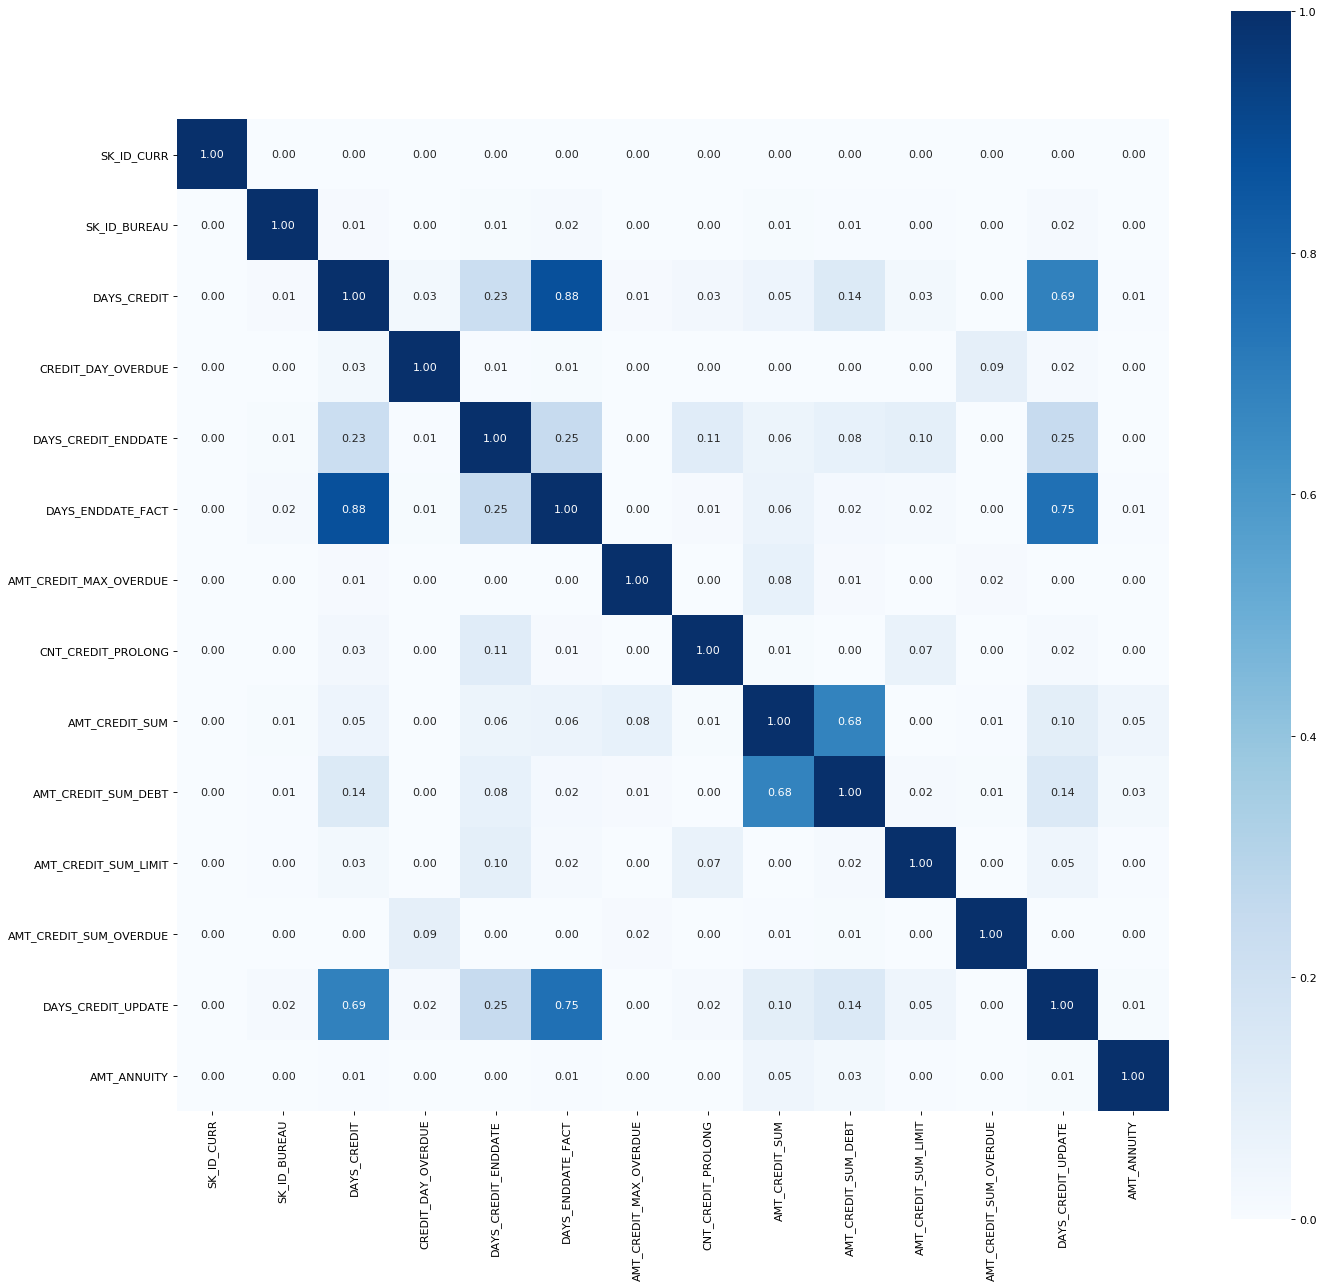

數值型別欄位計共 14 個。


SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  \
SK_ID_CURR                1.000000      0.000135     0.000266   
SK_ID_BUREAU              0.000135      1.000000     0.013015   
DAYS_CREDIT               0.000266      0.013015     1.000000   
CREDIT_DAY_OVERDUE        0.000283     -0.002628    -0.027266   
DAYS_CREDIT_ENDDATE       0.000456      0.009107     0.225682   
DAYS_ENDDATE_FACT        -0.000648      0.017890     0.875359   
AMT_CREDIT_MAX_OVERDUE    0.001329      0.002290    -0.014724   
CNT_CREDIT_PROLONG       -0.000388     -0.000740    -0.030460   
AMT_CREDIT_SUM            0.001179      0.007962     0.050883   
AMT_CREDIT_SUM_DEBT      -0.000790      0.005732     0.135397   
AMT_CREDIT_SUM_LIMIT     -0.000304     -0.003986     0.025140   
AMT_CREDIT_SUM_OVERDUE   -0.000014     -0.000499    -0.000383   
DAYS_CREDIT_UPDATE        0.000510      0.019398     0.688771   
AMT_ANNUITY              -0.002727      0.001799     0.005676   

                        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
SK_ID_CURR                        0.000283             0.000456   
SK_ID_BUREAU                     -0.002628             0.009107   
DAYS_CREDIT                      -0.027266             0.225682   
CREDIT_DAY_OVERDUE                1.000000            -0.007352   
DAYS_CREDIT_ENDDATE              -0.007352             1.000000   
DAYS_ENDDATE_FACT                -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE            0.001249             0.000577   
CNT_CREDIT_PROLONG                0.002756             0.113683   
AMT_CREDIT_SUM                   -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT              -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT             -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE            0.090951             0.001077   
DAYS_CREDIT_UPDATE               -0.018461             0.248525   
AMT_ANNUITY                      -0.000339             0.000475   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                      -0.000648                0.001329   
SK_ID_BUREAU                     0.017890                0.002290   
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT              0.019609                0.014007   
AMT_CREDIT_SUM_LIMIT             0.019476               -0.000112   
AMT_CREDIT_SUM_OVERDUE          -0.000332                0.015036   
DAYS_CREDIT_UPDATE               0.751294               -0.000749   
AMT_ANNUITY                      0.006274                0.001578   

                        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
SK_ID_CURR                       -0.000388        0.001179   
SK_ID_BUREAU                     -0.000740        0.007962   
DAYS_CREDIT                      -0.030460        0.050883   
CREDIT_DAY_OVERDUE                0.002756       -0.003292   
DAYS_CREDIT_ENDDATE               0.113683        0.055424   
DAYS_ENDDATE_FACT                 0.012017        0.059096   
AMT_CREDIT_MAX_OVERDUE            0.001523        0.081663   
CNT_CREDIT_PROLONG                1.000000       -0.008345   
AMT_CREDIT_SUM                   -0.008345        1.000000   
AMT_CREDIT_SUM_DEBT              -0.001366        0.683419   
AMT_CREDIT_SUM_LIMIT              0.073805        0.003756   
AMT_CREDIT_SUM_OVERDUE            0.000002        0.006342   
DAYS_CREDIT_UPDATE                0.017864        0.104629   
AMT_ANNUITY                      -0.000465        0.049146   

                        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
SK_ID_

In [54]:
heatmap(bureau)

[[Back to Top]](#索引)

### <a id=032>查看相關係數高者</a>

In [55]:
pd.set_option("display.max_rows",None)
bureau[bureau["SK_ID_CURR"]==215354].sort_values(by=["SK_ID_BUREAU"])

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
225157      215354       5714458        Closed      currency 1        -1872   
225158      215354       5714459        Closed      currency 1        -1734   
225159      215354       5714460        Closed      currency 1        -1333   
225160      215354       5714461        Closed      currency 1        -1011   
0           215354       5714462        Closed      currency 1         -497   
1           215354       5714463        Active      currency 1         -208   
2           215354       5714464        Active      currency 1         -203   
3           215354       5714465        Active      currency 1         -203   
4           215354       5714466        Active      currency 1         -629   
5           215354       5714467        Active      currency 1         -273   
6           215354       5714468        Active      currency 1          -43   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
225157                   0               -776.0            -1203.0   
225158                   0               -638.0            -1336.0   
225159                   0              -1089.0             -987.0   
225160                   0               -830.0             -770.0   
0                        0               -153.0             -153.0   
1                        0               1075.0                NaN   
2                        0                528.0                NaN   
3                        0                  NaN                NaN   
4                        0               1197.0                NaN   
5                        0              27460.0                NaN   
6                        0                 79.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
225157                     NaN                   0        494550.0   
225158                     NaN                   0       1084032.0   
225159                     NaN                   0        102150.0   
225160                     NaN                   0        500463.0   
0                          NaN                   0         91323.0   
1                          NaN                   0        225000.0   
2                          NaN                   0        464323.5   
3                          NaN                   0         90000.0   
4                      77674.5                   0       2700000.0   
5                          0.0                   0        180000.0   
6                          0.0                   0         42103.8   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
225157                 0.00                  0.00                     0.0   
225158                 0.00                   NaN                     0.0   
225159                  NaN                   NaN                     0.0   
225160                  NaN                   NaN                     0.0   
0                      0.00                   NaN                     0.0   
1                 171342.00                   NaN                     0.0   
2                       NaN                   NaN                     0.0   
3                       NaN                   NaN                     0.0   
4                       NaN                   NaN                     0.0   
5                  71017.38             108982.62                     0.0   
6                  42103.80                  0.00                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
225157  Consumer credit                -696          NaN  
225158         Car loan               -1336          NaN  
225159  Consumer credit                -984          NaN  
225160  Consumer credit                -767          NaN  
0       Consumer credit                -131          NaN  
1           Credit card                 -20          NaN  
2       Consumer credit                

In [56]:
#CREDIT_DAY_OVERDUE相關係數
kind_of_bureau_corr_CREDIT_DAY_OVERDUE = bureau[['SK_ID_CURR','SK_ID_BUREAU','CREDIT_DAY_OVERDUE','DAYS_CREDIT','DAYS_ENDDATE_FACT',]].corr()
kind_of_bureau_corr_CREDIT_DAY_OVERDUE

SK_ID_CURR  SK_ID_BUREAU  CREDIT_DAY_OVERDUE  DAYS_CREDIT  \
SK_ID_CURR            1.000000      0.000135            0.000283     0.000266   
SK_ID_BUREAU          0.000135      1.000000           -0.002628     0.013015   
CREDIT_DAY_OVERDUE    0.000283     -0.002628            1.000000    -0.027266   
DAYS_CREDIT           0.000266      0.013015           -0.027266     1.000000   
DAYS_ENDDATE_FACT    -0.000648      0.017890           -0.008637     0.875359   

                    DAYS_ENDDATE_FACT  
SK_ID_CURR                  -0.000648  
SK_ID_BUREAU                 0.017890  
CREDIT_DAY_OVERDUE          -0.008637  
DAYS_CREDIT                  0.875359  
DAYS_ENDDATE_FACT            1.000000

[[Back to Top]](#索引)

### <a id=033>特徵篩選</a>

In [57]:
#109/01/12
#bureau.groupby('SK_ID_CURR').aggregate({'AMT_CREDIT_SUM':max,'AMT_CREDIT_SUM_DEBT':max}).head()

#SK_ID_BUREAU==5715448，在bureau_balance-MONTHS_BALANCE==0,STATUS==C,但在bureau:CREDIT_ACTIVE==Active
#所以bureau_balance：STATUS==C,不一定代表是全部結清
#bureau[bureau["SK_ID_BUREAU"]==5715448].sort_values(by=["SK_ID_BUREAU"])

#1079273筆bureau["CREDIT_ACTIVE"]=='Closed']
#bureau[bureau["CREDIT_ACTIVE"]=='Closed'].sort_values(by=["SK_ID_CURR"]).shape[0]
#bureau[bureau["CREDIT_ACTIVE"]=='Closed'].sort_values(by=["SK_ID_CURR"]).head(15)

bureau.loc[(bureau["CREDIT_ACTIVE"]=='Closed') & (bureau['AMT_CREDIT_SUM_OVERDUE']>0),
           ('SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_OVERDUE','AMT_ANNUITY')].head(10)



SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  CREDIT_DAY_OVERDUE  \
9446       350002       5725982        Closed                1715   
17100      323596       5190659        Closed                1572   
33723      406327       5804754        Closed                   0   
43881      392205       5214368        Closed                1694   
46064      247863       5217154        Closed                1651   
50560      233380       5222730        Closed                 745   
54020      144186       5231209        Closed                   0   
60149      242940       5238648        Closed                   0   
61153      403361       5239894        Closed                   0   
78280      398531       5256731        Closed                1573   

       AMT_CREDIT_MAX_OVERDUE  AMT_CREDIT_SUM  AMT_CREDIT_SUM_OVERDUE  \
9446                      NaN         16186.5                   585.0   
17100                     NaN        113094.0                   220.5   
33723                     NaN        160879.5                     9.0   
43881                     NaN         26995.5                     9.0   
46064                     NaN         16929.0                    54.0   
50560                     NaN        249300.0                     9.0   
54020                     NaN         14818.5                    40.5   
60149                     NaN        675000.0                     4.5   
61153                     NaN         29547.0                   229.5   
78280                     NaN        107415.0                   184.5   

       AMT_ANNUITY  
9446           NaN  
17100          NaN  
33723     31868.91  
43881          NaN  
46064          NaN  
50560          NaN  
54020         0.00  
60149          NaN  
61153          NaN  
78280          NaN

In [58]:
#109/01/09
#4217筆在申請貸款時，信貸局信貸的逾期天數>0
#bureau.loc[(bureau['CREDIT_DAY_OVERDUE']>0)].shape[0]
#bureau.loc[(bureau['CREDIT_DAY_OVERDUE']>0)].head(10)
#4158筆信貸局貸款紀錄的逾期金額
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)].shape[0]
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)].head(10)

#3911筆在申請貸款時，信貸局信貸的逾期天數>0 & 有信貸局貸款紀錄的逾期金額
#bureau.loc[(bureau['CREDIT_DAY_OVERDUE']>0) & (bureau['AMT_CREDIT_SUM_OVERDUE']>0)].shape[0]
bureau.loc[(bureau['CREDIT_DAY_OVERDUE']>0) & (bureau['AMT_CREDIT_SUM_OVERDUE']>0),
           ('SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_OVERDUE','AMT_ANNUITY')].head(10)

#247筆在申請貸款時，信貸局信貸的逾期天數==0 & 有信貸局貸款紀錄的逾期金額 -->有異
#bureau.loc[(bureau['CREDIT_DAY_OVERDUE']==0) & (bureau['AMT_CREDIT_SUM_OVERDUE']>0)].shape[0]
#bureau.loc[(bureau['CREDIT_DAY_OVERDUE']==0) & (bureau['AMT_CREDIT_SUM_OVERDUE']>0),
#            ('SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_OVERDUE','AMT_ANNUITY')].head(60)




#bureau[['SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_OVERDUE']].head(50)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  CREDIT_DAY_OVERDUE  \
365       282297       5714943        Active                2603   
785       408647       5715468        Active                   6   
936       380677       5715645        Active                  30   
1575      218135       5716400        Active                2156   
1791      229323       5716671        Active                 496   
1847      295460       5716741        Active                 186   
1848      295460       5716742        Active                2264   
2033      129289       5716990        Active                  41   
2060      446640       5717023        Active                   8   
2061      446640       5717024        Active                   8   

      AMT_CREDIT_MAX_OVERDUE  AMT_CREDIT_SUM  AMT_CREDIT_SUM_OVERDUE  \
365                   4590.0         24696.0                 231.525   
785                      NaN        417208.5                 288.000   
936                      NaN         57024.0                  58.500   
1575                     NaN         45000.0                 504.000   
1791                     NaN        225000.0              169582.500   
1847                     NaN        699300.0                  36.000   
1848                     NaN         20250.0                 540.000   
2033                     NaN       1102500.0                  58.500   
2060                     NaN        103500.0                1710.000   
2061                     NaN        135000.0                4941.000   

      AMT_ANNUITY  
365           NaN  
785           NaN  
936           NaN  
1575          NaN  
1791          NaN  
1847          NaN  
1848          NaN  
2033          NaN  
2060          NaN  
2061          NaN

In [59]:
kind_of_bureau_corr = bureau[['SK_ID_CURR','SK_ID_BUREAU','DAYS_CREDIT','DAYS_ENDDATE_FACT']].corr()
kind_of_bureau_corr 

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  DAYS_ENDDATE_FACT
SK_ID_CURR           1.000000      0.000135     0.000266          -0.000648
SK_ID_BUREAU         0.000135      1.000000     0.013015           0.017890
DAYS_CREDIT          0.000266      0.013015     1.000000           0.875359
DAYS_ENDDATE_FACT   -0.000648      0.017890     0.875359           1.000000

In [60]:
bureau[['SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','DAYS_CREDIT','DAYS_ENDDATE_FACT','DAYS_CREDIT_UPDATE']].head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  DAYS_ENDDATE_FACT  \
0      215354       5714462        Closed         -497             -153.0   
1      215354       5714463        Active         -208                NaN   
2      215354       5714464        Active         -203                NaN   
3      215354       5714465        Active         -203                NaN   
4      215354       5714466        Active         -629                NaN   

   DAYS_CREDIT_UPDATE  
0                -131  
1                 -20  
2                 -16  
3                 -16  
4                 -21

In [61]:
#1090108

#3840筆信貸局貸款紀錄延長了多少次>0 & 信貸局貸款紀錄的逾期金額>0
#bureau.loc[(bureau['CNT_CREDIT_PROLONG']>0) & (bureau['AMT_CREDIT_MAX_OVERDUE']>0)].shape[0]
#bureau.loc[(bureau['CNT_CREDIT_PROLONG']>0) & (bureau['AMT_CREDIT_MAX_OVERDUE']>0)].head(15)

#Sold共6527筆，
#25筆信貸局貸款紀錄延長了多少次>0 & 信貸局貸款紀錄的逾期金額>0
#670筆信貸局貸款紀錄延長了多少次=0 & 信貸局貸款紀錄的逾期金額>0
#815筆信貸局貸款紀錄延長了多少次=0 & 信貸局貸款紀錄的逾期金額=0
#bureau.loc[(bureau['CREDIT_ACTIVE']=='Sold') &(bureau['CNT_CREDIT_PROLONG']==0) & (bureau['AMT_CREDIT_MAX_OVERDUE']<0)].shape[0] 
#bureau.loc[(bureau['CREDIT_ACTIVE']=='Sold') & (bureau['AMT_CREDIT_MAX_OVERDUE']>0)].shape[0]
#bureau.loc[(bureau['CREDIT_ACTIVE']=='Sold') & (bureau['AMT_CREDIT_MAX_OVERDUE']>0)].head(10)
#2665筆Sold & 信貸局貸款紀錄的負債==0
#289筆Sold & 信貸局貸款紀錄的負債>0
#3573筆Sold & 信貸局貸款紀錄的負債==isnull
#bureau.loc[(bureau['CREDIT_ACTIVE']=='Sold') & (bureau['AMT_CREDIT_SUM_DEBT'].isnull())].shape[0]
#257669筆信貸局貸款紀錄的負債==isnull
bureau.loc[(bureau['AMT_CREDIT_SUM_DEBT'].isnull())].shape[0]


#121290筆逾期的最大金額
#bureau.loc[(bureau['AMT_CREDIT_MAX_OVERDUE']>0)].shape
#4158筆信貸局貸款紀錄的逾期金額>0。1712270筆信貸局貸款紀錄的逾期金額=0--->正確
#4126筆有信貸局貸款紀錄的逾期金額>0者
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)].shape
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)].head(15)
#bureau.loc[(bureau['CNT_CREDIT_PROLONG']>0)].head(15)

#4126筆有信貸局貸款紀錄的逾期金額>0者，CNT_CREDIT_PROLONG(信貸局貸款紀錄延長了多少次)為0
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau['CNT_CREDIT_PROLONG']==0)].shape[0]
#32筆有信貸局貸款紀錄的逾期金額>0者，CNT_CREDIT_PROLONG(信貸局貸款紀錄延長了多少次)>0
#與train-target比對8筆有違約（1筆重複ID)，24筆無違約
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau['CNT_CREDIT_PROLONG']>0)].shape[0]
bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau['CNT_CREDIT_PROLONG']>0),
            ('SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_OVERDUE','CNT_CREDIT_PROLONG')].head(60)
          
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau['CNT_CREDIT_PROLONG']<0)].shape[0]    #0-->正確

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  CREDIT_DAY_OVERDUE  \
29206        381662       5799047        Active                 140   
46592        141760       5217816        Active                1541   
49050        399324       5220825        Active                   9   
69946        386859       5246470      Bad debt                  26   
74100        340383       5251577        Active                1604   
123491       439778       5241089        Active                 107   
405036       287369       6419367        Active                 101   
518039       332409       6461428        Active                  15   
598847       179735       5142521        Active                1829   
600828       360278       5144816        Active                1857   
626684       114166       5692238        Active                  72   
629408       360228       5695657        Active                  58   
644947       314990       6148835        Active                   9   
672280       400590       6154717        Active                2473   
728127       396283       5028767        Active                   5   
763172       230282       6232419        Active                  16   
873572       238396       5663457        Active                1875   
902055       158082       5664045        Active                1522   
963330       139111       5474525        Active                1887   
983248       101512       5073169        Active                1644   
1233384      430228       5911726        Active                  24   
1259277      200515       6812769        Active                1813   
1279359      243940       5650527        Active                 502   
1363836      171426       5413351        Active                  25   
1363838      171426       5413353        Active                  32   
1367396      422593       5417612        Active                1503   
1454099      373922       6329266        Active                  75   
1489855      127512       6332186        Active                   5   
1545349      167506       6680917        Active                  34   
1564056      374651       5991321        Active                1584   
1589206      344782       5588154        Active                1514   
1632806      104862       5760426        Active                  17   

         AMT_CREDIT_SUM_OVERDUE  CNT_CREDIT_PROLONG  
29206                   654.480                   2  
46592                    49.635                   1  
49050                   373.500                   1  
69946                 53532.000                   1  
74100                    85.545                   1  
123491               203009.940                   1  
405036                 3955.500                   2  
518039                   27.000                   2  
598847                    7.920                   1  
600828                    1.305                   1  
626684                34032.240                   1  
629408                 3357.000                   1  
644947                   31.500                   1  
672280                   44.640                   1  
728127                33615.000                   1  
763172                  279.000                   2  
873572                   22.770                   1  
902055                   33.435                   1  
963330                   17.280                   1  
983248                   35.955                   1  
1233384                 508.500                   1  
1259277                  33.660                   1  
1279359                  94.455                   1  
1363836               40243.500                   1  
1363838                4338.000                   1  
1367396                  17.595                   1  
1454099               25849.125                   1  
1489855                9670.455                   1  
1545349                 333.000                   1  
1564056                  33.795              

In [62]:
#1090108

#有1079273筆['CREDIT_ACTIVE']=='Closed & ['DAYS_CREDIT'信貸局信貸與申請貸款差了幾天]<=0
#bureau.loc[(bureau['CREDIT_ACTIVE']=='Closed') & (bureau['DAYS_CREDIT']<=0)].shape[0] 
#bureau.loc[(bureau['CREDIT_ACTIVE']=='Closed') & (bureau['DAYS_CREDIT']<=0)].head(20)
#有0筆['CREDIT_ACTIVE']=='Closed & ['DAYS_CREDIT'信貸局信貸與申請貸款差了幾天]<=0-->正確
#bureau.loc[(bureau['CREDIT_ACTIVE']=='Closed') & (bureau['DAYS_CREDIT']>0)].shape[0] 


bureau.loc[(bureau['CREDIT_ACTIVE']=='Active') & (bureau['DAYS_ENDDATE_FACT'].isnull())].head(20)
#bureau.loc[(bureau['DAYS_CREDIT']==0)].head(20)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1       215354       5714463        Active      currency 1         -208   
2       215354       5714464        Active      currency 1         -203   
3       215354       5714465        Active      currency 1         -203   
4       215354       5714466        Active      currency 1         -629   
5       215354       5714467        Active      currency 1         -273   
6       215354       5714468        Active      currency 1          -43   
9       162297       5714471        Active      currency 1        -1146   
10      162297       5714472        Active      currency 1        -1146   
12      162297       5714474        Active      currency 1         -277   
13      402440       5714475        Active      currency 1          -96   
17      238881       5714486        Active      currency 1         -381   
18      238881       5714487        Active      currency 1          -95   
20      238881       5714489        Active      currency 1         -392   
21      222183       5714491        Active      currency 1         -784   
22      222183       5714492        Active      currency 1         -774   
23      222183       5714493        Active      currency 1         -395   
26      222183       5714497        Active      currency 1         -315   
31      136226       5714502        Active      currency 1         -521   
34      400486       5714506        Active      currency 1         -941   
37      400486       5714509        Active      currency 1         -391   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1                    0               1075.0                NaN   
2                    0                528.0                NaN   
3                    0                  NaN                NaN   
4                    0               1197.0                NaN   
5                    0              27460.0                NaN   
6                    0                 79.0                NaN   
9                    0               -484.0                NaN   
10                   0               -180.0                NaN   
12                   0               5261.0                NaN   
13                   0                269.0                NaN   
17                   0                  NaN                NaN   
18                   0               1720.0                NaN   
20                   0                  NaN                NaN   
21                   0               1008.0                NaN   
22                   0                625.0                NaN   
23                   0               1431.0                NaN   
26                   0               1512.0                NaN   
31                   0                551.0                NaN   
34                   0                -17.0                NaN   
37                   0                705.0                NaN   

    AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1                      NaN                   0        225000.0   
2                      NaN                   0        464323.5   
3                      NaN                   0         90000.0   
4                  77674.5                   0       2700000.0   
5                      0.0                   0        180000.0   
6                      0.0                   0         42103.8   
9                      0.0                   0          4500.0   
10                     0.0                   0        337500.0   
12                     0.0                   0       7033500.0   
13                     0.0                   0         89910.0   
17                     NaN                   0        450000.0   
18                     NaN                   0         67500.0   
20                     0.0                   0        252000.0   
21                     0.0                   0             0.0   
22                     NaN                   0     

In [63]:
pd.set_option("display.max_rows",None)
bureau[bureau["SK_ID_CURR"]==215354].sort_values(by=["SK_ID_BUREAU"])

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
225157      215354       5714458        Closed      currency 1        -1872   
225158      215354       5714459        Closed      currency 1        -1734   
225159      215354       5714460        Closed      currency 1        -1333   
225160      215354       5714461        Closed      currency 1        -1011   
0           215354       5714462        Closed      currency 1         -497   
1           215354       5714463        Active      currency 1         -208   
2           215354       5714464        Active      currency 1         -203   
3           215354       5714465        Active      currency 1         -203   
4           215354       5714466        Active      currency 1         -629   
5           215354       5714467        Active      currency 1         -273   
6           215354       5714468        Active      currency 1          -43   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
225157                   0               -776.0            -1203.0   
225158                   0               -638.0            -1336.0   
225159                   0              -1089.0             -987.0   
225160                   0               -830.0             -770.0   
0                        0               -153.0             -153.0   
1                        0               1075.0                NaN   
2                        0                528.0                NaN   
3                        0                  NaN                NaN   
4                        0               1197.0                NaN   
5                        0              27460.0                NaN   
6                        0                 79.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
225157                     NaN                   0        494550.0   
225158                     NaN                   0       1084032.0   
225159                     NaN                   0        102150.0   
225160                     NaN                   0        500463.0   
0                          NaN                   0         91323.0   
1                          NaN                   0        225000.0   
2                          NaN                   0        464323.5   
3                          NaN                   0         90000.0   
4                      77674.5                   0       2700000.0   
5                          0.0                   0        180000.0   
6                          0.0                   0         42103.8   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
225157                 0.00                  0.00                     0.0   
225158                 0.00                   NaN                     0.0   
225159                  NaN                   NaN                     0.0   
225160                  NaN                   NaN                     0.0   
0                      0.00                   NaN                     0.0   
1                 171342.00                   NaN                     0.0   
2                       NaN                   NaN                     0.0   
3                       NaN                   NaN                     0.0   
4                       NaN                   NaN                     0.0   
5                  71017.38             108982.62                     0.0   
6                  42103.80                  0.00                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
225157  Consumer credit                -696          NaN  
225158         Car loan               -1336          NaN  
225159  Consumer credit                -984          NaN  
225160  Consumer credit                -767          NaN  
0       Consumer credit                -131          NaN  
1           Credit card                 -20          NaN  
2       Consumer credit                

[[Back to Top]](#索引)

## <a id=04>4.Data Clearning

### <a id=041>copy bureau</a>

In [64]:
bureau_fill = bureau.copy()

In [65]:
bureau_fill.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

[[Back to Top]](#索引)

### <a id=042>處理非空值欄位</a>

In [66]:
def select_notnull(data):
    
    #a欄位型態
    data_type=data.dtypes
    
    #b差異值數量
    uniques_num=data.apply(lambda x:x.unique().shape[0],axis=0)
    
    #c空值比例
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    
    columns_data=pd.concat([data_type,uniques_num,total, percent], axis=1, keys=['Type','Uniques_Num','Missing_Total', 'Missing_Percent'],sort=False)
    pd.set_option("display.max_rows",None)
    only_notnull_data=columns_data[columns_data["Missing_Total"]==0].sort_values(by=["Missing_Total"])
    
    
    return  only_notnull_data

In [67]:
#???
#aa=select_notnull(bureau)
#aal=list(aa.index)
#aal


In [68]:
select_notnull_column_show=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_CURRENCY','DAYS_CREDIT','CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG','AMT_CREDIT_SUM_OVERDUE','CREDIT_TYPE','DAYS_CREDIT_UPDATE']]
select_notnull_column_show.head(5)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM_OVERDUE  \
0                   0                   0                     0.0   
1                   0                   0                     0.0   
2                   0                   0                     0.0   
3                   0                   0                     0.0   
4                   0                   0                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  
0  Consumer credit                -131  
1      Credit card                 -20  
2  Consumer credit                 -16  
3      Credit card                 -16  
4  Consumer credit                 -21

In [69]:
total_info(select_notnull_column_show)

              bureau
Row          1716428
Column            10
Total Data  17164280
int64              6
object             3
float64            1


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_CURR                int64       305811              0              0.0
SK_ID_BUREAU              int64      1716428              0              0.0
CREDIT_ACTIVE            object            4              0              0.0
CREDIT_CURRENCY          object            4              0              0.0
DAYS_CREDIT               int64         2923              0              0.0
CREDIT_DAY_OVERDUE        int64          942              0              0.0
CNT_CREDIT_PROLONG        int64           10              0              0.0
AMT_CREDIT_SUM_OVERDUE  float64         1616              0              0.0
CREDIT_TYPE              object           15              0              0.0
DAYS_CREDIT_UPDATE        int64         2982              0              0.0

In [70]:

#????

#select_notnull = bureau.notnull().all()
#pd.DataFrame(select_notnull )


#select_notnull_olumn_show=pd.DataFrame(select_notnull)
#select_notnull_olumn_show
#select_notnull_olumn_show=pd.DataFrame(select_notnull.loc[2])
#select_notnull_olumn_show.head(5)

[[Back to Top]](#索引)

### <a id=043>處理空值欄位</a>

#類別型欄位將空值改為NA
#data['column_name']=data['column_name'].replace(np.nan,'NA')

In [71]:
def select_missing(data):
    
    #a欄位型態
    data_type=data.dtypes
    
    #b差異值數量
    uniques_num=data.apply(lambda x:x.unique().shape[0],axis=0)
    
    #c空值比例
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    
    columns_data=pd.concat([data_type,uniques_num,total, percent], axis=1, keys=['Type','Uniques_Num','Missing_Total', 'Missing_Percent'],sort=False)
    pd.set_option("display.max_rows",None)
    only_missing_data=columns_data[columns_data["Missing_Total"]>0].sort_values(by=["Missing_Total"])
    
    
    return only_missing_data

In [72]:
select_missing(bureau_fill)

Type  Uniques_Num  Missing_Total  Missing_Percent
AMT_CREDIT_SUM          float64       236709             13         0.000757
DAYS_CREDIT_ENDDATE     float64        14097         105553         6.149573
AMT_CREDIT_SUM_DEBT     float64       226538         257669        15.011932
AMT_CREDIT_SUM_LIMIT    float64        51727         591780        34.477415
DAYS_ENDDATE_FACT       float64         2918         633653        36.916958
AMT_CREDIT_MAX_OVERDUE  float64        68252        1124488        65.513264
AMT_ANNUITY             float64        40322        1226791        71.473490

In [73]:
select_missing_column_show=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM','DAYS_CREDIT_ENDDATE','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','DAYS_ENDDATE_FACT','AMT_CREDIT_MAX_OVERDUE','AMT_ANNUITY']]
select_missing_column_show.head(15)

SK_ID_CURR  SK_ID_BUREAU  AMT_CREDIT_SUM  DAYS_CREDIT_ENDDATE  \
0       215354       5714462        91323.00               -153.0   
1       215354       5714463       225000.00               1075.0   
2       215354       5714464       464323.50                528.0   
3       215354       5714465        90000.00                  NaN   
4       215354       5714466      2700000.00               1197.0   
5       215354       5714467       180000.00              27460.0   
6       215354       5714468        42103.80                 79.0   
7       162297       5714469        76878.45              -1684.0   
8       162297       5714470       103007.70               -811.0   
9       162297       5714471         4500.00               -484.0   
10      162297       5714472       337500.00               -180.0   
11      162297       5714473       675000.00               -629.0   
12      162297       5714474      7033500.00               5261.0   
13      402440       5714475        89910.00                269.0   
14      238881       5714482            0.00               -187.0   

    AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  DAYS_ENDDATE_FACT  \
0                  0.00                   NaN             -153.0   
1             171342.00                   NaN                NaN   
2                   NaN                   NaN                NaN   
3                   NaN                   NaN                NaN   
4                   NaN                   NaN                NaN   
5              71017.38             108982.62                NaN   
6              42103.80                  0.00                NaN   
7                  0.00                  0.00            -1710.0   
8                  0.00                  0.00             -840.0   
9                  0.00                  0.00                NaN   
10                 0.00                  0.00                NaN   
11                 0.00                  0.00             -825.0   
12                  NaN                   NaN                NaN   
13             76905.00                  0.00                NaN   
14                 0.00                  0.00             -187.0   

    AMT_CREDIT_MAX_OVERDUE  AMT_ANNUITY  
0                      NaN          NaN  
1                      NaN          NaN  
2                      NaN          NaN  
3                      NaN          NaN  
4                  77674.5          NaN  
5                      0.0          NaN  
6                      0.0          NaN  
7                  14985.0          NaN  
8                      0.0          NaN  
9                      0.0          NaN  
10                     0.0          NaN  
11                     NaN          NaN  
12                     0.0          NaN  
13                     0.0          NaN  
14                     NaN          NaN

In [74]:
total_info(select_missing_column_show)

              bureau
Row          1716428
Column             9
Total Data  15447852
float64            7
int64              2


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_CURR                int64       305811              0         0.000000
SK_ID_BUREAU              int64      1716428              0         0.000000
AMT_CREDIT_SUM          float64       236709             13         0.000757
DAYS_CREDIT_ENDDATE     float64        14097         105553         6.149573
AMT_CREDIT_SUM_DEBT     float64       226538         257669        15.011932
AMT_CREDIT_SUM_LIMIT    float64        51727         591780        34.477415
DAYS_ENDDATE_FACT       float64         2918         633653        36.916958
AMT_CREDIT_MAX_OVERDUE  float64        68252        1124488        65.513264
AMT_ANNUITY             float64        40322        1226791        71.473490

In [75]:
#DAYS_CREDIT_ENDDATE_NaN=bureau_fill.loc[bureau.DAYS_CREDIT_ENDDATE.isnull(),['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM','DAYS_CREDIT_ENDDATE']]
#DAYS_CREDIT_ENDDATE_NaN.head(15)

In [76]:
#xxxxSettingWithCopyWarning:

#select_missing_column_show['AMT_CREDIT_SUM_flag']=(select_missing_column_show['AMT_CREDIT_SUM'].isnull().replace(True,1))
#select_missing_column_show['DAYS_CREDIT_ENDDATE_flag']=(select_missing_column_show['DAYS_CREDIT_ENDDATE'].isnull().replace(True,1))
#select_missing_column_show['AMT_CREDIT_SUM_DEBT_flag']=(select_missing_column_show['AMT_CREDIT_SUM_DEBT'].isnull().replace(True,1))
#select_missing_column_show['AMT_CREDIT_SUM_LIMIT_flag']=(select_missing_column_show['AMT_CREDIT_SUM_LIMIT'].isnull().replace(True,1))
#select_missing_column_show['DAYS_ENDDATE_FACT_flag']=(select_missing_column_show['DAYS_ENDDATE_FACT'].isnull().replace(True,1))
#select_missing_column_show['AMT_CREDIT_MAX_OVERDUE_flag']=(select_missing_column_show['AMT_CREDIT_MAX_OVERDUE'].isnull().replace(True,1))
#select_missing_column_show['AMT_ANNUITY_flag']=(select_missing_column_show['AMT_ANNUITY'].isnull().replace(True,1))

# 增加select_missing(bureau)_flag

In [77]:
bureau_fill['AMT_CREDIT_SUM_flag']=(bureau_fill['AMT_CREDIT_SUM'].isnull().replace(True,1))
bureau_fill['DAYS_CREDIT_ENDDATE_flag']=(bureau_fill['DAYS_CREDIT_ENDDATE'].isnull().replace(True,1))
bureau_fill['AMT_CREDIT_SUM_DEBT_flag']=(bureau_fill['AMT_CREDIT_SUM_DEBT'].isnull().replace(True,1))
bureau_fill['AMT_CREDIT_SUM_LIMIT_flag']=(bureau_fill['AMT_CREDIT_SUM_LIMIT'].isnull().replace(True,1))
bureau_fill['DAYS_ENDDATE_FACT_flag']=(bureau_fill['DAYS_ENDDATE_FACT'].isnull().replace(True,1))
bureau_fill['AMT_CREDIT_MAX_OVERDUE_flag']=(bureau_fill['AMT_CREDIT_MAX_OVERDUE'].isnull().replace(True,1))
bureau_fill['AMT_ANNUITY_flag']=(bureau_fill['AMT_ANNUITY'].isnull().replace(True,1))

In [78]:
#this one is double
#sort_AMT_CREDIT_SUM_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM','AMT_CREDIT_SUM_flag']]
#sort_DAYS_CREDIT_ENDDATE_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','DAYS_CREDIT_ENDDATE','DAYS_CREDIT_ENDDATE_flag']]
#sort_AMT_CREDIT_SUM_DEBT_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_DEBT_flag']]
#sort_AMT_CREDIT_SUM_LIMIT_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_LIMIT_flag']]
#sort_DAYS_ENDDATE_FACT_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','DAYS_ENDDATE_FACT','DAYS_ENDDATE_FACT_flag']]
#sort_AMT_CREDIT_MAX_OVERDUE_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_MAX_OVERDUE_flag']]
#sort_AMT_ANNUITY_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','AMT_ANNUITY','AMT_ANNUITY_flag']]

In [79]:
#this one is good
sort_AMT_CREDIT_SUM_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM','AMT_CREDIT_SUM_flag']]
sort_DAYS_CREDIT_ENDDATE_flag=bureau_fill[['DAYS_CREDIT_ENDDATE','DAYS_CREDIT_ENDDATE_flag']]
sort_AMT_CREDIT_SUM_DEBT_flag=bureau_fill[['AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_DEBT_flag']]
sort_AMT_CREDIT_SUM_LIMIT_flag=bureau_fill[['AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_LIMIT_flag']]
sort_DAYS_ENDDATE_FACT_flag=bureau_fill[['DAYS_ENDDATE_FACT','DAYS_ENDDATE_FACT_flag']]
sort_AMT_CREDIT_MAX_OVERDUE_flag=bureau_fill[['AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_MAX_OVERDUE_flag']]
sort_AMT_ANNUITY_flag=bureau_fill[['AMT_ANNUITY','AMT_ANNUITY_flag']]


#sort_AMT_CREDIT_SUM_flag.head(n=15)
#sort_DAYS_CREDIT_ENDDATE_flag.head(n=20)
#sort_AMT_CREDIT_SUM_DEBT_flag.head(n=15)
#sort_AMT_CREDIT_SUM_LIMIT_flag.head(n=15)
#sort_DAYS_ENDDATE_FACT_flag.head(n=15)
#sort_AMT_CREDIT_MAX_OVERDUE_flag.head(n=15)
sort_AMT_ANNUITY_flag.head(n=15)

AMT_ANNUITY  AMT_ANNUITY_flag
0           NaN               1.0
1           NaN               1.0
2           NaN               1.0
3           NaN               1.0
4           NaN               1.0
5           NaN               1.0
6           NaN               1.0
7           NaN               1.0
8           NaN               1.0
9           NaN               1.0
10          NaN               1.0
11          NaN               1.0
12          NaN               1.0
13          NaN               1.0
14          NaN               1.0

# 填補空值select_missing(bureau)_flag

In [80]:
sort_AMT_CREDIT_SUM_flag_fillna=sort_AMT_CREDIT_SUM_flag.fillna(0)
sort_DAYS_CREDIT_ENDDATE_flag_fillna=sort_DAYS_CREDIT_ENDDATE_flag.fillna(0)
sort_AMT_CREDIT_SUM_DEBT_flag_fillna=sort_AMT_CREDIT_SUM_DEBT_flag.fillna(0)
sort_AMT_CREDIT_SUM_LIMIT_flag_fillna=sort_AMT_CREDIT_SUM_LIMIT_flag.fillna(0)
sort_DAYS_ENDDATE_FACT_flag_fillna=sort_DAYS_ENDDATE_FACT_flag.fillna(0)
sort_AMT_CREDIT_MAX_OVERDUE_flag_fillna=sort_AMT_CREDIT_MAX_OVERDUE_flag.fillna(0)
sort_AMT_ANNUITY_flag_fillna=sort_AMT_ANNUITY_flag.fillna(0)

sort_AMT_CREDIT_SUM_flag_fillna.head()
#sort_DAYS_CREDIT_ENDDATE_flag_fillna.head()
#sort_AMT_CREDIT_SUM_DEBT_flag_fillna.head()
#sort_AMT_CREDIT_SUM_LIMIT_flag_fillna.head()
#sort_DAYS_ENDDATE_FACT_flag_fillna.head()
#sort_AMT_CREDIT_MAX_OVERDUE_flag_fillna.head()
#sort_AMT_ANNUITY_flag_fillna.head()



SK_ID_CURR  SK_ID_BUREAU  AMT_CREDIT_SUM  AMT_CREDIT_SUM_flag
0      215354       5714462         91323.0                  0.0
1      215354       5714463        225000.0                  0.0
2      215354       5714464        464323.5                  0.0
3      215354       5714465         90000.0                  0.0
4      215354       5714466       2700000.0                  0.0

# 合併missing_data_flag_df

In [81]:
sort_select_missing_flag=[sort_AMT_CREDIT_SUM_flag_fillna,sort_DAYS_CREDIT_ENDDATE_flag_fillna,sort_AMT_CREDIT_SUM_DEBT_flag_fillna,sort_AMT_CREDIT_SUM_LIMIT_flag_fillna,sort_DAYS_ENDDATE_FACT_flag_fillna,sort_AMT_CREDIT_MAX_OVERDUE_flag_fillna,sort_AMT_ANNUITY_flag_fillna]
sort_select_missing_flag=pd.concat(sort_select_missing_flag,axis=1)
sort_select_missing_flag.head(10)


SK_ID_CURR  SK_ID_BUREAU  AMT_CREDIT_SUM  AMT_CREDIT_SUM_flag  \
0      215354       5714462        91323.00                  0.0   
1      215354       5714463       225000.00                  0.0   
2      215354       5714464       464323.50                  0.0   
3      215354       5714465        90000.00                  0.0   
4      215354       5714466      2700000.00                  0.0   
5      215354       5714467       180000.00                  0.0   
6      215354       5714468        42103.80                  0.0   
7      162297       5714469        76878.45                  0.0   
8      162297       5714470       103007.70                  0.0   
9      162297       5714471         4500.00                  0.0   

   DAYS_CREDIT_ENDDATE  DAYS_CREDIT_ENDDATE_flag  AMT_CREDIT_SUM_DEBT  \
0               -153.0                       0.0                 0.00   
1               1075.0                       0.0            171342.00   
2                528.0                       0.0                 0.00   
3                  0.0                       1.0                 0.00   
4               1197.0                       0.0                 0.00   
5              27460.0                       0.0             71017.38   
6                 79.0                       0.0             42103.80   
7              -1684.0                       0.0                 0.00   
8               -811.0                       0.0                 0.00   
9               -484.0                       0.0                 0.00   

   AMT_CREDIT_SUM_DEBT_flag  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_LIMIT_flag  \
0                       0.0                  0.00                        1.0   
1                       0.0                  0.00                        1.0   
2                       1.0                  0.00                        1.0   
3                       1.0                  0.00                        1.0   
4                       1.0                  0.00                        1.0   
5                       0.0             108982.62                        0.0   
6                       0.0                  0.00                        0.0   
7                       0.0                  0.00                        0.0   
8                       0.0                  0.00                        0.0   
9                       0.0                  0.00                        0.0   

   DAYS_ENDDATE_FACT  DAYS_ENDDATE_FACT_flag  AMT_CREDIT_MAX_OVERDUE  \
0             -153.0                     0.0                     0.0   
1                0.0                     1.0                     0.0   
2                0.0                     1.0                     0.0   
3                0.0                     1.0                     0.0   
4                0.0                     1.0                 77674.5   
5                0.0                     1.0                     0.0   
6                0.0                     1.0                     0.0   
7            -1710.0                     0.0                 14985.0   
8             -840.0                     0.0                     0.0   
9                0.0                     1.0                     0.0   

   AMT_CREDIT_MAX_OVERDUE_flag  AMT_ANNUITY  AMT_ANNUITY_flag  
0                          1.0          0.0               1.0  
1                          1.0          0.0               1.0  
2                          1.0          0.0               1.0  
3                          1.0          0.0               1.0  
4                          0.0          0.0               1.0  
5                          0.0          0.0               1.0  
6                          0.0          0.0               1.0  
7                          0.0          0.0               1.0  
8                          0.0          0.0               1.0  
9                          0.0          0.0               1.0

# 確認是否填補成功

In [82]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    print('missing data')
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [83]:
total_info(sort_select_missing_flag)

              bureau
Row          1716428
Column            16
Total Data  27462848
float64           14
int64              2


Type  Uniques_Num  Missing_Total  \
SK_ID_CURR                     int64       305811              0   
SK_ID_BUREAU                   int64      1716428              0   
AMT_CREDIT_SUM               float64       236708              0   
AMT_CREDIT_SUM_flag          float64            2              0   
DAYS_CREDIT_ENDDATE          float64        14096              0   
DAYS_CREDIT_ENDDATE_flag     float64            2              0   
AMT_CREDIT_SUM_DEBT          float64       226537              0   
AMT_CREDIT_SUM_DEBT_flag     float64            2              0   
AMT_CREDIT_SUM_LIMIT         float64        51726              0   
AMT_CREDIT_SUM_LIMIT_flag    float64            2              0   
DAYS_ENDDATE_FACT            float64         2917              0   
DAYS_ENDDATE_FACT_flag       float64            2              0   
AMT_CREDIT_MAX_OVERDUE       float64        68251              0   
AMT_CREDIT_MAX_OVERDUE_flag  float64            2              0   
AMT_ANNUITY                  float64        40321              0   
AMT_ANNUITY_flag             float64            2              0   

                             Missing_Percent  
SK_ID_CURR                               0.0  
SK_ID_BUREAU                             0.0  
AMT_CREDIT_SUM                           0.0  
AMT_CREDIT_SUM_flag                      0.0  
DAYS_CREDIT_ENDDATE                      0.0  
DAYS_CREDIT_ENDDATE_flag                 0.0  
AMT_CREDIT_SUM_DEBT                      0.0  
AMT_CREDIT_SUM_DEBT_flag                 0.0  
AMT_CREDIT_SUM_LIMIT                     0.0  
AMT_CREDIT_SUM_LIMIT_flag                0.0  
DAYS_ENDDATE_FACT                        0.0  
DAYS_ENDDATE_FACT_flag                   0.0  
AMT_CREDIT_MAX_OVERDUE                   0.0  
AMT_CREDIT_MAX_OVERDUE_flag              0.0  
AMT_ANNUITY                              0.0  
AMT_ANNUITY_flag                         0.0

[[Back to Top]](#索引)

### <a id=044>合併非空值、空值欄位</a>

In [84]:
notnull_missing=pd.merge(select_notnull_column_show,sort_select_missing_flag)

#notnull_missing.head(5)
notnull_missing.tail(5)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#   print(notnull_missing.head(10))


#x->no this one
#notnull_missing=pd.merge(select_notnull_column_show,sort_select_missing_flag,on='SK_ID_CURR').drop('SK_ID_BUREAU_y',axis=1)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM_OVERDUE  \
1716423                   0                   0                     0.0   
1716424                   0                   0                     0.0   
1716425                   0                   0                     0.0   
1716426                   0                   0                     0.0   
1716427                   0                   0                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  ...  AMT_CREDIT_SUM_DEBT  \
1716423        Microloan                 -19  ...              11250.0   
1716424  Consumer credit               -2493  ...                  0.0   
1716425  Consumer credit                -967  ...                  0.0   
1716426  Consumer credit               -1508  ...                  0.0   
1716427        Microloan                -387  ...                  0.0   

         AMT_CREDIT_SUM_DEBT_flag  AMT_CREDIT_SUM_LIMIT  \
1716423                       0.0                   0.0   
1716424                       0.0                   0.0   
1716425                       1.0                   0.0   
1716426                       0.0                   0.0   
1716427                       0.0                   0.0   

         AMT_CREDIT_SUM_LIMIT_flag  DAYS_ENDDATE_FACT  DAYS_ENDDATE_FACT_flag  \
1716423                        0.0                0.0                     1.0   
1716424                        0.0            -2493.0                     0.0   
1716425                        1.0             -970.0                     0.0   
1716426                        0.0            -1513.0                     0.0   
1716427                        1.0             -387.0                     0.0   

         AMT_CREDIT_MAX_OVERDUE  AMT_CREDIT_MAX_OVERDUE_flag  AMT_ANNUITY  \
1716423                     0.0                          0.0          0.0   
1716424                  5476.5                          0.0          0.0   
1716425                     0.0                          1.0          0.0   
1716426                     0.0                          1.0          0.0   
1716427                     0.0                          1.0          0.0   

         AMT_ANNUITY_flag  
1716423               1.0  
1716424               1.0  
1716425               1.0  
1716426               1.0  
1716427               1.0  

[5 rows x 24 columns]

In [85]:
total_info(notnull_missing)

              bureau
Row          1716428
Column            24
Total Data  41194272
float64           15
int64              6
object             3


Type  Uniques_Num  Missing_Total  \
SK_ID_CURR                     int64       305811              0   
SK_ID_BUREAU                   int64      1716428              0   
CREDIT_ACTIVE                 object            4              0   
CREDIT_CURRENCY               object            4              0   
DAYS_CREDIT                    int64         2923              0   
CREDIT_DAY_OVERDUE             int64          942              0   
CNT_CREDIT_PROLONG             int64           10              0   
AMT_CREDIT_SUM_OVERDUE       float64         1616              0   
CREDIT_TYPE                   object           15              0   
DAYS_CREDIT_UPDATE             int64         2982              0   
AMT_CREDIT_SUM               float64       236708              0   
AMT_CREDIT_SUM_flag          float64            2              0   
DAYS_CREDIT_ENDDATE          float64        14096              0   
DAYS_CREDIT_ENDDATE_flag     float64            2              0   
AMT_CREDIT_SUM_DEBT          float64       226537              0   
AMT_CREDIT_SUM_DEBT_flag     float64            2              0   
AMT_CREDIT_SUM_LIMIT         float64        51726              0   
AMT_CREDIT_SUM_LIMIT_flag    float64            2              0   
DAYS_ENDDATE_FACT            float64         2917              0   
DAYS_ENDDATE_FACT_flag       float64            2              0   
AMT_CREDIT_MAX_OVERDUE       float64        68251              0   
AMT_CREDIT_MAX_OVERDUE_flag  float64            2              0   
AMT_ANNUITY                  float64        40321              0   
AMT_ANNUITY_flag             float64            2              0   

                             Missing_Percent  
SK_ID_CURR                               0.0  
SK_ID_BUREAU                             0.0  
CREDIT_ACTIVE                            0.0  
CREDIT_CURRENCY                          0.0  
DAYS_CREDIT                              0.0  
CREDIT_DAY_OVERDUE                       0.0  
CNT_CREDIT_PROLONG                       0.0  
AMT_CREDIT_SUM_OVERDUE                   0.0  
CREDIT_TYPE                              0.0  
DAYS_CREDIT_UPDATE                       0.0  
AMT_CREDIT_SUM                           0.0  
AMT_CREDIT_SUM_flag                      0.0  
DAYS_CREDIT_ENDDATE                      0.0  
DAYS_CREDIT_ENDDATE_flag                 0.0  
AMT_CREDIT_SUM_DEBT                      0.0  
AMT_CREDIT_SUM_DEBT_flag                 0.0  
AMT_CREDIT_SUM_LIMIT                     0.0  
AMT_CREDIT_SUM_LIMIT_flag                0.0  
DAYS_ENDDATE_FACT                        0.0  
DAYS_ENDDATE_FACT_flag                   0.0  
AMT_CREDIT_MAX_OVERDUE                   0.0  
AMT_CREDIT_MAX_OVERDUE_flag              0.0  
AMT_ANNUITY                              0.0  
AMT_ANNUITY_flag                         0.0

[[Back to Top]](#索引)

## <a id=05>5.檢查異常值（abnormal value)</a>

### <a id=051>整數型-檢查異常值（abnormal value）</a>

異常值新增欄位名稱-xxx_abn_flag

In [86]:
def columns_int64(data):
    columns_int64= data.columns[data.dtypes == 'int64']
    columns_int64_pd =pd.DataFrame(columns_int64,columns=['整數型欄位'])

    unique_int64 = data.select_dtypes(include=['int64']).nunique()
    unique_int64_pd=pd.DataFrame(unique_int64,columns=['Unique_Num'])
    print('整數型欄位計共 {} 個。'.format(len(data.select_dtypes(include=['int64']).columns)))
    print('')
    print(pd.merge(columns_int64_pd,unique_int64_pd,left_on='整數型欄位',right_index=True))
    
    return data.describe()

In [87]:
columns_int64(bureau_fill)

整數型欄位計共 6 個。

                整數型欄位  Unique_Num
0          SK_ID_CURR      305811
1        SK_ID_BUREAU     1716428
2         DAYS_CREDIT        2923
3  CREDIT_DAY_OVERDUE         942
4  CNT_CREDIT_PROLONG          10
5  DAYS_CREDIT_UPDATE        2982


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  ...  \
count        1.716428e+06    1.716415e+06         1.458759e+06  ...   
mean         6.410406e-03    3.549946e+05         1.370851e+05  ...   
std          9.622391e-02    1.149811e+06         6.774011e+05  ...   
min          0.000000e+00    0.000000e+00        -4.705600e+06  ...   
25%          0.000000e+00    5.130000e+04         0.000000e+00  ...   
50%          0.000000e+00    1.255185e+05         0.000000e+00  ...   
75%          0.000000e+00    3.150000e+05         4.015350e+04  ...   
max          9.000000e+00    5.850000e+08         1.701000e+08  ...   

       AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE   AMT_ANNUITY  \
count            1.716428e+06        1.716428e+06  4.896370e+05   
mean             3.791276e+01       -5.937483e+02  1.571276e+04   
std              5.937650e+03        7.207473e+02  3.258269e+05   
min              0.000000e+00       -4.194700e+04  0.000000e+00   
25%              0.000000e+00       -9.080000e+02  0.000000e+00   
50%              0.000000e+00       -3.950000e+02  0.000000e+00   
75%              0.000000e+00       -3.300000e+01  1.350000e+04   
max              3.756681e+06        3.720000e+02  1.184534e+08   

       AMT_CREDIT_SUM_flag  DAYS_CREDIT_ENDDATE_flag  \
count         1.716428e+06              1.716428e+06   
mean          7.573869e-06              6.149573e-02   
std           2.752057e-03              2.402375e-01   
min           0.000000e+00              0.000000e+00   
25%           0.000000e+00              0.000000e+00   
50%           0.000000e+00              0.000000e+00   
75%           0.000000e+00              0.000000e+00   
max           1.000000e+00              1.000000e+00   

       AMT_CREDIT_SUM_DEBT_flag  AMT_CREDIT_SUM_LIMIT_flag  \
count              1.716428e+06               1.716428e+06   
mean               1.501193e-01               3.447741e-01   
std                3.571884e-01               4.752947e-01   
min                0.000000e+00               0.000000e+00   
25%                0.000000e+00               0.000000e+00   
50%                0.000000e+00               0.000000e+00   
75%                0.000000e+00               1.000000e+00   
max                1.000000e+00               1.000000e+00   

       DAYS_ENDDATE_FACT_flag  AMT_CREDIT_MAX_OVERDUE_flag  AMT_ANNUITY_flag  
count            1.716428e+06                 1.716428e+06      1.716428e+06  
mean             3.691696e-01                 6.551326e-01      7.147349e-01  
std              4.825801e-01                 4.753251e-01      4.515407e-01  
min              0.000000e+00                 0.000000e+00      0.000000e+00  
25%     

In [88]:
columns_int64 = bureau_fill.columns[bureau_fill.dtypes == 'int64']
def plot_int64_hist(data, columns_int64):    
    for i in range(len(columns_int64)):
        fig,axes = plt.subplots()
        data[columns_int64[i]].plot.hist(bins=50,ax=axes)
        axes.set_title(columns_int64[i])

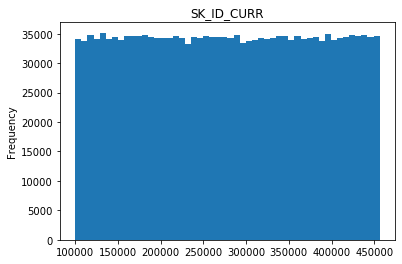

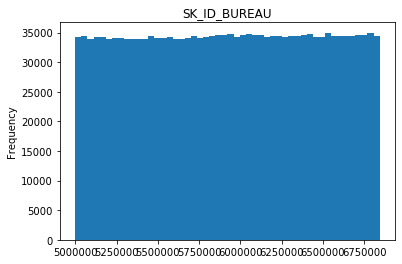

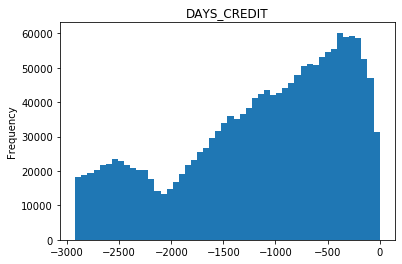

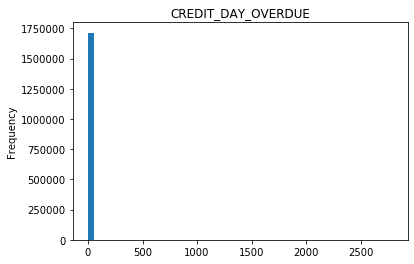

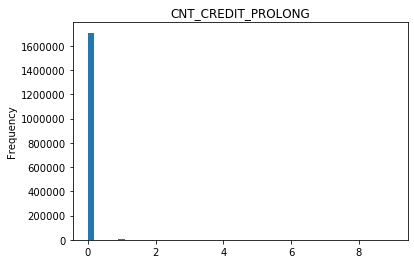

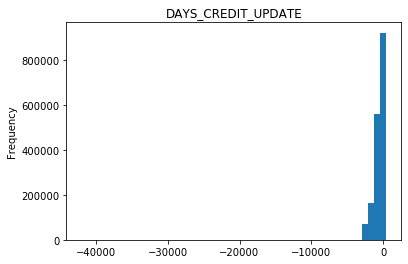

In [89]:
plot_int64_hist(bureau_fill, columns_int64)

In [90]:
columns_int64

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'DAYS_CREDIT_UPDATE'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

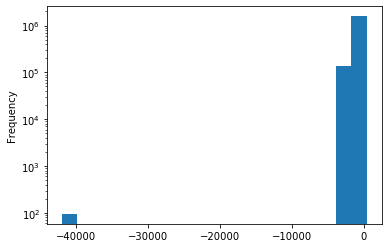

In [91]:
#有問題者個別篩選-步驟1
bureau_fill["DAYS_CREDIT_UPDATE"].plot.hist(bins=20,log=True)
plt.show

count    1.716428e+06
mean    -5.937483e+02
std      7.207473e+02
min     -4.194700e+04
25%     -9.080000e+02
50%     -3.950000e+02
75%     -3.300000e+01
max      3.720000e+02
Name: DAYS_CREDIT_UPDATE, dtype: float64

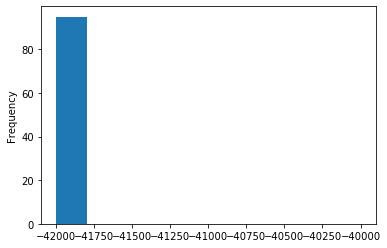

In [92]:
#有問題者個別篩選-步驟2
#DAYS_CREDIT_UPDATE離上次收到貸款訊息幾天了
#day<0*1715806
#-2920~-1*1715711
#-42000~-41800*95
#0*605

#days>0*17
#5~25*16
#372*1

#有異值-42000~-41800-> 95位->約115年以上

bureau_fill["DAYS_CREDIT_UPDATE"].plot.hist(bins=10,range=(-42000,-40000))
plt.show
bureau_fill["DAYS_CREDIT_UPDATE"].describe()

In [93]:
bureau_fill[bureau_fill["DAYS_CREDIT_UPDATE"]>0] .shape[0]  #大於0天有17位
#(bureau_fill["DAYS_CREDIT_UPDATE"]>0).value_counts()
#(bureau_fill["DAYS_CREDIT_UPDATE"]<-41800).value_counts()  #-42000~-41800*95
#((bureau_fill["DAYS_CREDIT_UPDATE"]<0) & (bureau_fill["DAYS_CREDIT_UPDATE"]>=-2920)).value_counts()#-2920~-1*1715711

17

In [94]:
bureau_fill.loc[bureau_fill["DAYS_CREDIT_UPDATE"]<-36500] 

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1943         219708       5716863        Closed      currency 1         -331   
25051        448220       5200446        Closed      currency 1         -488   
30474        380623       5800600        Active      currency 1         -281   
30531        127624       5800677        Closed      currency 1         -364   
60385        214335       5238926        Active      currency 1         -311   
67402        280380       5006959        Closed      currency 1         -292   
88466        368921       5610302        Closed      currency 1        -1095   
102525       281014       5264094        Closed      currency 1         -382   
104201       215097       6582892        Closed      currency 1         -389   
104454       279505       6583226        Closed      currency 1         -292   
143867       426817       6561668        Closed      currency 1         -625   
160138       218446       5813571        Closed      currency 1         -443   
184029       317058       6821923        Closed      currency 1         -872   
226049       154757       5049245        Active      currency 1         -301   
234714       361465       5850406        Active      currency 1         -621   
241654       326080       5793641        Closed      currency 1         -447   
259139       202024       6062226        Closed      currency 1         -355   
301435       330657       6313898        Closed      currency 1         -464   
327744       133745       5539933        Active      currency 1         -912   
332124       299455       5063925        Closed      currency 1         -336   
340586       225484       6073310        Closed      currency 1         -322   
355726       257691       5545787        Closed      currency 1         -700   
365872       335534       6017386        Closed      currency 1         -441   
368204       117829       5516704        Closed      currency 1         -320   
382897       384719       5178913        Active      currency 1         -257   
391064       140629       5188971        Closed      currency 1        -1387   
401412       406762       5087636        Closed      currency 1        -1480   
416502       320299       5974238        Closed      currency 1        -1227   
464315       163880       6584796        Active      currency 1         -306   
467007       279505       6583225        Closed      currency 1         -298   
470075       324660       5101306        Active      currency 1         -302   
540932       186232       5097128        Closed      currency 1         -497   
554388       181739       6394447        Active      currency 1         -325   
564799       146042       5684315        Closed      currency 1        -1043   
595770       123022       5138749        Closed      currency 1         -494   
595779       182108       5138759        Closed      currency 1         -472   
595780       182108       5138760        Closed      currency 1         -325   
597716       331011       5141157        Closed      currency 1        -1018   
641404       334626       6309917        Closed      currency 1         -508   
655108       430894       6788427        Closed      currency 1         -460   
686744       289614       5312848        Active      currency 1         -222   
706416       131437       5493785        Closed      currency 1         -314   
706885       299694       5494379        Closed      currency 1         -274   
707653       245286       5495373        Closed      currency 1        -1363   
718373       134630       6490946        Closed      currency 1        -1388   
730760       273453       6375736        Closed      currency 1         -880   
744033       194357       5320056        Closed      currency 1         -972   
756951       259684       5504814        Active      currency 1         -278   
779697       265111       6267444        Closed      currency 1         -316   
780778   

[[Back to Top]](#索引)

### <a id=051>處理整數型異常值欄位</a>

In [95]:
bureau_fill['DAYS_CREDIT_UPDATE_abn_flag']=(bureau_fill["DAYS_CREDIT_UPDATE"]<-40000).replace(True,1)
bureau_fill['DAYS_CREDIT_UPDATE_abn_flag'].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DAYS_CREDIT_UPDATE_abn_flag, dtype: float64

In [96]:
#確認填補數量是否正確:95位==1
bureau_fill.loc[(bureau_fill['DAYS_CREDIT_UPDATE_abn_flag']>0)].shape

(95, 25)

In [97]:
#增加異值標記欄位
sort_DAYS_CREDIT_UPDATE_abn_flag=bureau_fill[['SK_ID_CURR','SK_ID_BUREAU','DAYS_CREDIT_UPDATE','DAYS_CREDIT_UPDATE_abn_flag']]
sort_DAYS_CREDIT_UPDATE_abn_flag.head(5)

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT_UPDATE  DAYS_CREDIT_UPDATE_abn_flag
0      215354       5714462                -131                          0.0
1      215354       5714463                 -20                          0.0
2      215354       5714464                 -16                          0.0
3      215354       5714465                 -16                          0.0
4      215354       5714466                 -21                          0.0

In [98]:
total_info(sort_DAYS_CREDIT_UPDATE_abn_flag)

             bureau
Row         1716428
Column            4
Total Data  6865712
int64             3
float64           1


Type  Uniques_Num  Missing_Total  \
SK_ID_CURR                     int64       305811              0   
SK_ID_BUREAU                   int64      1716428              0   
DAYS_CREDIT_UPDATE             int64         2982              0   
DAYS_CREDIT_UPDATE_abn_flag  float64            2              0   

                             Missing_Percent  
SK_ID_CURR                               0.0  
SK_ID_BUREAU                             0.0  
DAYS_CREDIT_UPDATE                       0.0  
DAYS_CREDIT_UPDATE_abn_flag              0.0

In [99]:
#更改異值標記欄位
sort_DAYS_CREDIT_UPDATE_abn_flag_fill_0=pd.DataFrame(sort_DAYS_CREDIT_UPDATE_abn_flag["DAYS_CREDIT_UPDATE"])
sort_DAYS_CREDIT_UPDATE_abn_flag_fill_0[sort_DAYS_CREDIT_UPDATE_abn_flag_fill_0< -40000] = 0
sort_DAYS_CREDIT_UPDATE_abn_flag_fill_0.head(5)

DAYS_CREDIT_UPDATE
0                -131
1                 -20
2                 -16
3                 -16
4                 -21

In [100]:
#合併異值標記欄位、填補後的異值欄位
sort_select_abn_flag=[sort_DAYS_CREDIT_UPDATE_abn_flag.drop(columns='DAYS_CREDIT_UPDATE'),sort_DAYS_CREDIT_UPDATE_abn_flag_fill_0]
sort_select_abn_flag=pd.concat(sort_select_abn_flag,axis=1)
#sort_select_abn_flag=pd.merge(sort_select_abn_flag)
sort_select_abn_flag.head(5)

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT_UPDATE_abn_flag  DAYS_CREDIT_UPDATE
0      215354       5714462                          0.0                -131
1      215354       5714463                          0.0                 -20
2      215354       5714464                          0.0                 -16
3      215354       5714465                          0.0                 -16
4      215354       5714466                          0.0                 -21

In [101]:
total_info(sort_select_abn_flag)

             bureau
Row         1716428
Column            4
Total Data  6865712
int64             3
float64           1


Type  Uniques_Num  Missing_Total  \
SK_ID_CURR                     int64       305811              0   
SK_ID_BUREAU                   int64      1716428              0   
DAYS_CREDIT_UPDATE_abn_flag  float64            2              0   
DAYS_CREDIT_UPDATE             int64         2923              0   

                             Missing_Percent  
SK_ID_CURR                               0.0  
SK_ID_BUREAU                             0.0  
DAYS_CREDIT_UPDATE_abn_flag              0.0  
DAYS_CREDIT_UPDATE                       0.0

In [102]:
#檢查是否填補成功
sort_select_abn_flag[sort_select_abn_flag["SK_ID_CURR"]==442116]

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT_UPDATE_abn_flag  \
87078        442116       5573520                          0.0   
87079        442116       5573524                          0.0   
1686163      442116       5573516                          0.0   
1686164      442116       5573517                          0.0   
1686165      442116       5573518                          0.0   
1686166      442116       5573519                          1.0   
1686167      442116       5573521                          0.0   
1686168      442116       5573522                          0.0   
1686169      442116       5573523                          0.0   
1686170      442116       5573525                          0.0   

         DAYS_CREDIT_UPDATE  
87078                  -624  
87079                    -6  
1686163               -2049  
1686164               -1133  
1686165                -422  
1686166                   0  
1686167                -683  
1686168                -222  
1686169                -284  
1686170                 -25

[[Back to Top]](#索引)

### <a id=052>合併非空值、空值、整數異常值欄位</a>

In [103]:
#將sort_select_abn_flag->SK_ID_CURR刪除，避免之後重複
sort_select_abn_flag=sort_select_abn_flag.drop(columns='SK_ID_CURR')
sort_select_abn_flag.head(5)

SK_ID_BUREAU  DAYS_CREDIT_UPDATE_abn_flag  DAYS_CREDIT_UPDATE
0       5714462                          0.0                -131
1       5714463                          0.0                 -20
2       5714464                          0.0                 -16
3       5714465                          0.0                 -16
4       5714466                          0.0                 -21

In [104]:
#合併非空值、空值、異值欄位
notnull_missing_abn=[notnull_missing.drop(columns='DAYS_CREDIT_UPDATE'),sort_select_abn_flag.drop(columns='SK_ID_BUREAU')]
notnull_missing_abn=pd.concat(notnull_missing_abn,axis=1)

pd.option_context('display.max_rows', None, 'display.max_columns', None)
notnull_missing_abn.tail(5)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM_OVERDUE  \
1716423                   0                   0                     0.0   
1716424                   0                   0                     0.0   
1716425                   0                   0                     0.0   
1716426                   0                   0                     0.0   
1716427                   0                   0                     0.0   

             CREDIT_TYPE  AMT_CREDIT_SUM  ...  AMT_CREDIT_SUM_LIMIT  \
1716423        Microloan        11250.00  ...                   0.0   
1716424  Consumer credit        38130.84  ...                   0.0   
1716425  Consumer credit        15570.00  ...                   0.0   
1716426  Consumer credit        36000.00  ...                   0.0   
1716427        Microloan        22500.00  ...                   0.0   

         AMT_CREDIT_SUM_LIMIT_flag  DAYS_ENDDATE_FACT  DAYS_ENDDATE_FACT_flag  \
1716423                        0.0                0.0                     1.0   
1716424                        0.0            -2493.0                     0.0   
1716425                        1.0             -970.0                     0.0   
1716426                        0.0            -1513.0                     0.0   
1716427                        1.0             -387.0                     0.0   

         AMT_CREDIT_MAX_OVERDUE  AMT_CREDIT_MAX_OVERDUE_flag  AMT_ANNUITY  \
1716423                     0.0                          0.0          0.0   
1716424                  5476.5                          0.0          0.0   
1716425                     0.0                          1.0          0.0   
1716426                     0.0                          1.0          0.0   
1716427                     0.0                          1.0          0.0   

         AMT_ANNUITY_flag  DAYS_CREDIT_UPDATE_abn_flag  DAYS_CREDIT_UPDATE  
1716423               1.0                          0.0                 -19  
1716424               1.0                          0.0               -2493  
1716425               1.0                          0.0                -967  
1716426               1.0                          0.0               -1508  
1716427               1.0                          0.0                -387  

[5 rows x 25 columns]

In [105]:
total_info(notnull_missing_abn)

              bureau
Row          1716428
Column            25
Total Data  42910700
float64           16
int64              6
object             3


Type  Uniques_Num  Missing_Total  \
SK_ID_CURR                     int64       305811              0   
SK_ID_BUREAU                   int64      1716428              0   
CREDIT_ACTIVE                 object            4              0   
CREDIT_CURRENCY               object            4              0   
DAYS_CREDIT                    int64         2923              0   
CREDIT_DAY_OVERDUE             int64          942              0   
CNT_CREDIT_PROLONG             int64           10              0   
AMT_CREDIT_SUM_OVERDUE       float64         1616              0   
CREDIT_TYPE                   object           15              0   
AMT_CREDIT_SUM               float64       236708              0   
AMT_CREDIT_SUM_flag          float64            2              0   
DAYS_CREDIT_ENDDATE          float64        14096              0   
DAYS_CREDIT_ENDDATE_flag     float64            2              0   
AMT_CREDIT_SUM_DEBT          float64       226537              0   
AMT_CREDIT_SUM_DEBT_flag     float64            2              0   
AMT_CREDIT_SUM_LIMIT         float64        51726              0   
AMT_CREDIT_SUM_LIMIT_flag    float64            2              0   
DAYS_ENDDATE_FACT            float64         2917              0   
DAYS_ENDDATE_FACT_flag       float64            2              0   
AMT_CREDIT_MAX_OVERDUE       float64        68251              0   
AMT_CREDIT_MAX_OVERDUE_flag  float64            2              0   
AMT_ANNUITY                  float64        40321              0   
AMT_ANNUITY_flag             float64            2              0   
DAYS_CREDIT_UPDATE_abn_flag  float64            2              0   
DAYS_CREDIT_UPDATE             int64         2923              0   

                             Missing_Percent  
SK_ID_CURR                               0.0  
SK_ID_BUREAU                             0.0  
CREDIT_ACTIVE                            0.0  
CREDIT_CURRENCY                          0.0  
DAYS_CREDIT                              0.0  
CREDIT_DAY_OVERDUE                       0.0  
CNT_CREDIT_PROLONG                       0.0  
AMT_CREDIT_SUM_OVERDUE                   0.0  
CREDIT_TYPE                              0.0  
AMT_CREDIT_SUM                           0.0  
AMT_CREDIT_SUM_flag                      0.0  
DAYS_CREDIT_ENDDATE                      0.0  
DAYS_CREDIT_ENDDATE_flag                 0.0  
AMT_CREDIT_SUM_DEBT                      0.0  
AMT_CREDIT_SUM_DEBT_flag                 0.0  
AMT_CREDIT_SUM_LIMIT                     0.0  
AMT_CREDIT_SUM_LIMIT_flag                0.0  
DAYS_ENDDATE_FACT                        0.0  
DAYS_ENDDATE_FACT_flag                   0.0  
AMT_CREDIT_MAX_OVERDUE                   0.0  
AMT_CREDIT_MAX_OVERDUE_flag              0.0  
AMT_ANNUITY                              0.0  
AMT_ANNUITY_flag                         0.0  
DAYS_CREDIT_UPDATE_abn_flag              0.0  
DAYS_CREDIT_UPDATE                       0.0

In [106]:
#檢查是否填補成功
notnull_missing_abn[notnull_missing_abn["SK_ID_CURR"]==442116]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
87078        442116       5573520        Active      currency 1         -776   
87079        442116       5573524        Active      currency 1         -329   
1686163      442116       5573516        Closed      currency 1        -2264   
1686164      442116       5573517        Closed      currency 1        -1924   
1686165      442116       5573518        Closed      currency 1        -1297   
1686166      442116       5573519        Closed      currency 1        -1224   
1686167      442116       5573521        Closed      currency 1         -776   
1686168      442116       5573522        Closed      currency 1        -1296   
1686169      442116       5573523        Closed      currency 1         -329   
1686170      442116       5573525        Active      currency 1         -329   

         CREDIT_DAY_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM_OVERDUE  \
87078                     0                   0                     0.0   
87079                     0                   0                     0.0   
1686163                   0                   0                     0.0   
1686164                   0                   0                     0.0   
1686165                   0                   0                     0.0   
1686166                   0                   0                     0.0   
1686167                   0                   0                     0.0   
1686168                   0                   0                     0.0   
1686169                   0                   0                     0.0   
1686170                   0                   0                     0.0   

             CREDIT_TYPE  AMT_CREDIT_SUM  ...  AMT_CREDIT_SUM_LIMIT  \
87078        Credit card            0.00  ...               104.985   
87079        Credit card       585000.00  ...                 0.000   
1686163  Consumer credit        14421.15  ...                 0.000   
1686164      Credit card        58500.00  ...            135193.230   
1686165      Credit card       135000.00  ...            135213.885   
1686166      Credit card         4500.00  ...              4500.000   
1686167  Consumer credit       291159.00  ...                 0.000   
1686168  Consumer credit      1338750.00  ...                 0.000   
1686169  Consumer credit        16812.00  ...                 0.000   
1686170      Credit card       360000.00  ...            360000.000   

         AMT_CREDIT_SUM_LIMIT_flag  DAYS_ENDDATE_FACT  DAYS_ENDDATE_FACT_flag  \
87078                          0.0                0.0                     1.0   
87079                          1.0                0.0                     1.0   
1686163                        0.0            -2066.0                     0.0   
1686164                        0.0            -1133.0                     0.0   
1686165                        0.0             -422.0                     0.0   
1686166                        0.0            -1223.0                     0.0   
1686167                        0.0             -683.0                     0.0   
1686168                        0.0             -226.0                     0.0   
1686169                        0.0             -297.0                     0.0   
1686170                        0.0                0.0                     1.0   

         AMT_CREDIT_MAX_OVERDUE  AMT_CREDIT_MAX_OVERDUE_flag  AMT_ANNUITY  \
87078                  4135.815                          0.0          0.0   
87079                     0.000                          1.0          0.0   
1686163                2520.000                          0.0          0.0   
1686164                6750.000                          0.0          0.0   
1686165               11871.090                          0.0          0.0   
1686166                   0.000                          0.0          0.0   
1686167                   0.000                          0.0          0.0   
1686168     

[[Back to Top]](#索引)

### <a id=053>處理浮點數型異常值欄位（abnormal value)</a>

異常值新增欄位名稱-xxx_abn_flag

In [107]:
def columns_float64(data):
    columns_float64= data.columns[data.dtypes == 'float64']
    columns_float64_pd =pd.DataFrame(columns_float64,columns=['浮點數型欄位'])

    unique_float64 = data.select_dtypes(include=['float64']).nunique()
    unique_float64_pd=pd.DataFrame(unique_float64,columns=['Unique_Num'])
    print('浮點數型欄位計共 {} 個。'.format(len(data.select_dtypes(include=['float64']).columns)))
    print('')
    print(pd.merge(columns_float64_pd,unique_float64_pd,left_on='浮點數型欄位',right_index=True))
    
    return data.describe()

In [108]:
columns_float64(bureau_fill)

浮點數型欄位計共 16 個。

                         浮點數型欄位  Unique_Num
0           DAYS_CREDIT_ENDDATE       14096
1             DAYS_ENDDATE_FACT        2917
2        AMT_CREDIT_MAX_OVERDUE       68251
3                AMT_CREDIT_SUM      236708
4           AMT_CREDIT_SUM_DEBT      226537
5          AMT_CREDIT_SUM_LIMIT       51726
6        AMT_CREDIT_SUM_OVERDUE        1616
7                   AMT_ANNUITY       40321
8           AMT_CREDIT_SUM_flag           2
9      DAYS_CREDIT_ENDDATE_flag           2
10     AMT_CREDIT_SUM_DEBT_flag           2
11    AMT_CREDIT_SUM_LIMIT_flag           2
12       DAYS_ENDDATE_FACT_flag           2
13  AMT_CREDIT_MAX_OVERDUE_flag           2
14             AMT_ANNUITY_flag           2
15  DAYS_CREDIT_UPDATE_abn_flag           2


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  ...  \
count        1.716428e+06    1.716415e+06         1.458759e+06  ...   
mean         6.410406e-03    3.549946e+05         1.370851e+05  ...   
std          9.622391e-02    1.149811e+06         6.774011e+05  ...   
min          0.000000e+00    0.000000e+00        -4.705600e+06  ...   
25%          0.000000e+00    5.130000e+04         0.000000e+00  ...   
50%          0.000000e+00    1.255185e+05         0.000000e+00  ...   
75%          0.000000e+00    3.150000e+05         4.015350e+04  ...   
max          9.000000e+00    5.850000e+08         1.701000e+08  ...   

       DAYS_CREDIT_UPDATE   AMT_ANNUITY  AMT_CREDIT_SUM_flag  \
count        1.716428e+06  4.896370e+05         1.716428e+06   
mean        -5.937483e+02  1.571276e+04         7.573869e-06   
std          7.207473e+02  3.258269e+05         2.752057e-03   
min         -4.194700e+04  0.000000e+00         0.000000e+00   
25%         -9.080000e+02  0.000000e+00         0.000000e+00   
50%         -3.950000e+02  0.000000e+00         0.000000e+00   
75%         -3.300000e+01  1.350000e+04         0.000000e+00   
max          3.720000e+02  1.184534e+08         1.000000e+00   

       DAYS_CREDIT_ENDDATE_flag  AMT_CREDIT_SUM_DEBT_flag  \
count              1.716428e+06              1.716428e+06   
mean               6.149573e-02              1.501193e-01   
std                2.402375e-01              3.571884e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                0.000000e+00              0.000000e+00   
max                1.000000e+00              1.000000e+00   

       AMT_CREDIT_SUM_LIMIT_flag  DAYS_ENDDATE_FACT_flag  \
count               1.716428e+06            1.716428e+06   
mean                3.447741e-01            3.691696e-01   
std                 4.752947e-01            4.825801e-01   
min                 0.000000e+00            0.000000e+00   
25%                 0.000000e+00            0.000000e+00   
50%                 0.000000e+00            0.000000e+00   
75%                 1.000000e+00            1.000000e+00   
max                 1.000000e+00            1.000000e+00   

       AMT_CREDIT_MAX_OVERDUE_flag  AMT_ANNUITY_flag  \
count                 1.716428e+06      1.716428e+06   
mean                  6.551326e-01      7.147349e-01   
std                   4.753251e-01      4.515407e-01   
min                   0.000000e+00      0.000000e+00   
25%                   0.000000e+00      0.000000e+00   
50%                   1.000000e+00      1.000000e+00   
75%        

In [109]:
columns_float64 = bureau_fill.columns[bureau_fill.dtypes == 'float64']
def plot_float64_hist(data, columns_float64):    
    for i in range(len(columns_float64)):
        fig,axes = plt.subplots()
        data[columns_float64[i]].plot.hist(bins=50,ax=axes)
        axes.set_title(columns_float64[i])

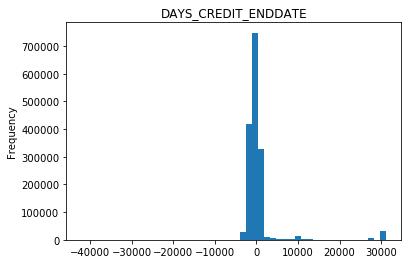

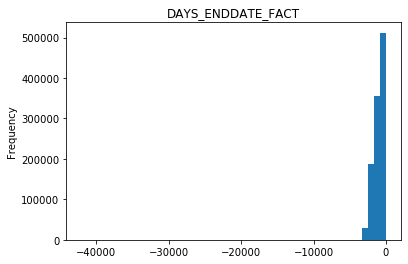

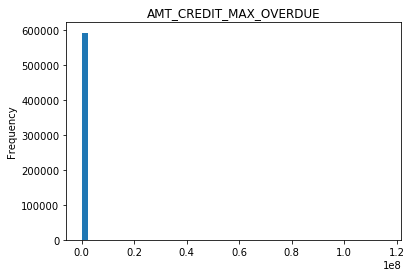

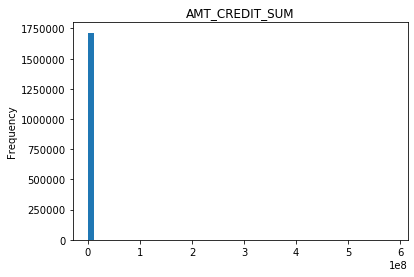

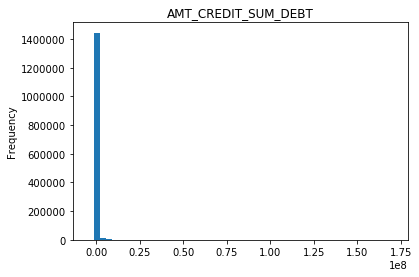

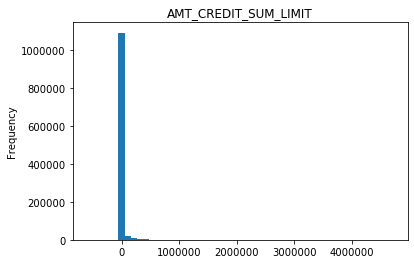

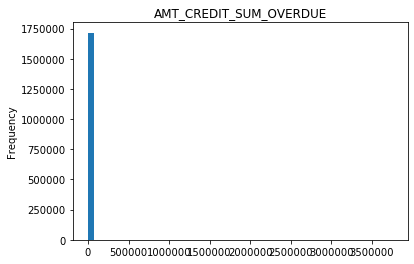

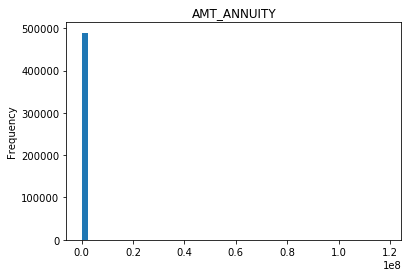

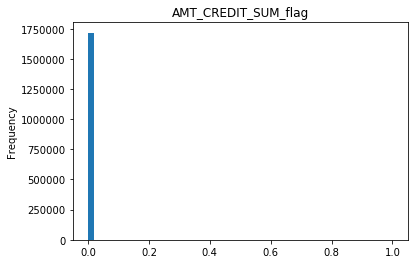

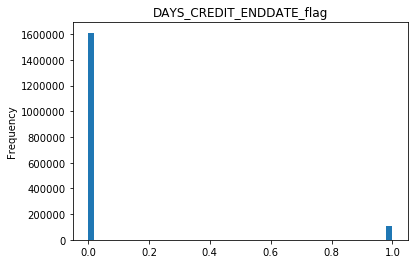

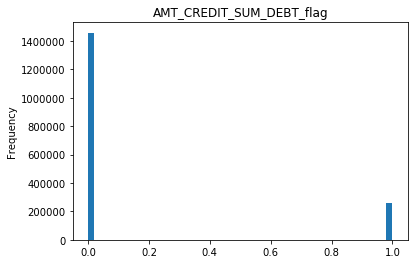

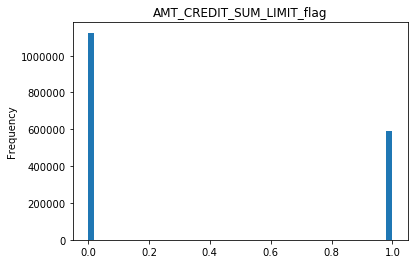

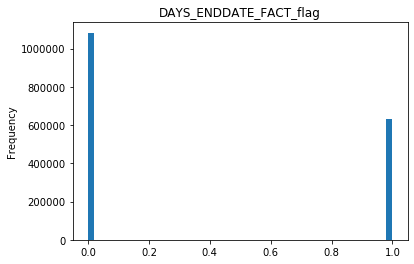

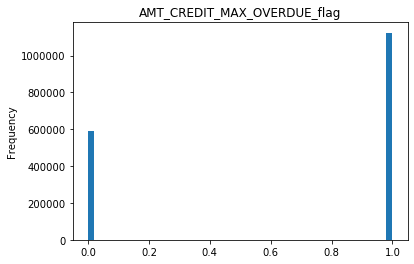

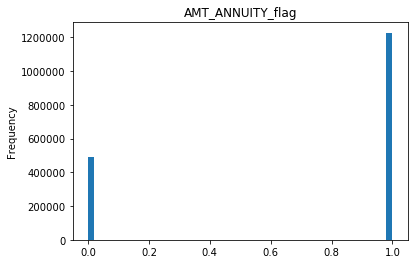

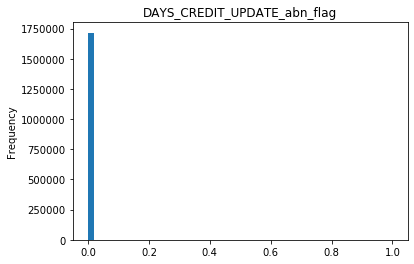

In [110]:
plot_float64_hist(bureau_fill, columns_float64)

In [111]:
columns_float64

Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'AMT_CREDIT_SUM_flag',
       'DAYS_CREDIT_ENDDATE_flag', 'AMT_CREDIT_SUM_DEBT_flag',
       'AMT_CREDIT_SUM_LIMIT_flag', 'DAYS_ENDDATE_FACT_flag',
       'AMT_CREDIT_MAX_OVERDUE_flag', 'AMT_ANNUITY_flag',
       'DAYS_CREDIT_UPDATE_abn_flag'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

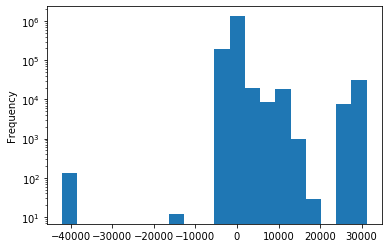

In [112]:
#有問題者個別篩選-步驟1
bureau_fill["DAYS_CREDIT_ENDDATE"].plot.hist(bins=20,log=True)
plt.show

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

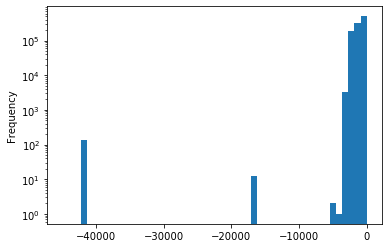

In [113]:
#有問題者個別篩選-步驟2
#申請“Home Credit”時，信貸局信貸的剩餘期限
#0<


bureau_fill["DAYS_CREDIT_ENDDATE"].plot.hist(bins=50,log=True,range=(-45000,0))
plt.show
bureau_fill["DAYS_CREDIT_ENDDATE"].describe()

In [114]:
bureau_fill[bureau_fill["DAYS_CREDIT_ENDDATE"]<0].shape[0]  #小於0天有位
#(bureau["DAYS_CREDIT_ENDDATE"]>0).value_counts()
#(bureau["DAYS_CREDIT_ENDDATE"]<-41800).value_counts()  #-42000~-41800*95
#((bureau["DAYS_CREDIT_ENDDATE"]<0) & (bureau["DAYS_CREDIT_UPDATE"]>=-2920)).value_counts()#-2920~-1*1715711

1007389

In [115]:
#有問題者個別篩選-步驟1

#bureau_fill[""].plot.hist(bins=20,log=True)
#plt.show

In [116]:
#有問題者個別篩選-步驟2


#bureau_fill[""].plot.hist(bins=10,range=(-42000,-40000))
#plt.show
#bureau_fill[""].describe()

[[Back to Top]](#索引)

## <a id=06>6.載入home-application-train</a>

### <a id=061>資料的型態、大小</a>

In [117]:
#group_3
#application_train=pd.read_csv("../../datasets/homecdt_eda/application_train.csv")
#資策會
application_train=pd.read_csv("../../application_train.csv") # 所有資料
#家裡
# application_train=pd.read_csv("home-credit-default-risk/application_train.csv")# 所有資料

In [118]:
application_train.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [119]:
total_info(application_train)

              bureau
Row           307511
Column           122
Total Data  37516342
float64           65
int64             41
object            16


Type  Uniques_Num  Missing_Total  \
SK_ID_CURR                      int64       307511              0   
TARGET                          int64            2              0   
NAME_CONTRACT_TYPE             object            2              0   
CODE_GENDER                    object            3              0   
FLAG_OWN_CAR                   object            2              0   
FLAG_OWN_REALTY                object            2              0   
CNT_CHILDREN                    int64           15              0   
AMT_INCOME_TOTAL              float64         2548              0   
AMT_CREDIT                    float64         5603              0   
AMT_ANNUITY                   float64        13673             12   
AMT_GOODS_PRICE               float64         1003            278   
NAME_TYPE_SUITE                object            8           1292   
NAME_INCOME_TYPE               object            8              0   
NAME_EDUCATION_TYPE            object            5              0   
NAME_FAMILY_STATUS             object            6              0   
NAME_HOUSING_TYPE              object            6              0   
REGION_POPULATION_RELATIVE    float64           81              0   
DAYS_BIRTH                      int64        17460              0   
DAYS_EMPLOYED                   int64        12574              0   
DAYS_REGISTRATION             float64        15688              0   
DAYS_ID_PUBLISH                 int64         6168              0   
OWN_CAR_AGE                   float64           63         202929   
FLAG_MOBIL                      int64            2              0   
FLAG_EMP_PHONE                  int64            2              0   
FLAG_WORK_PHONE                 int64            2              0   
FLAG_CONT_MOBILE                int64            2              0   
FLAG_PHONE                      int64            2              0   
FLAG_EMAIL                      int64            2              0   
OCCUPATION_TYPE                object           19          96391   
CNT_FAM_MEMBERS               float64           18              2   
REGION_RATING_CLIENT            int64            3              0   
REGION_RATING_CLIENT_W_CITY     int64            3              0   
WEEKDAY_APPR_PROCESS_START     object            7              0   
HOUR_APPR_PROCESS_START         int64           24              0   
REG_REGION_NOT_LIVE_REGION      int64            2              0   
REG_REGION_NOT_WORK_REGION      int64            2              0   
LIVE_REGION_NOT_WORK_REGION     int64            2              0   
REG_CITY_NOT_LIVE_CITY          int64            2              0   
REG_CITY_NOT_WORK_CITY          int64            2              0   
LIVE_CITY_NOT_WORK_CITY         int64            2              0   
ORGANIZATION_TYPE              object           58              0   
EXT_SOURCE_1                  float64       114585         173378   
EXT_SOURCE_2                  float64       119832            660   
EXT_SOURCE_3                  float64          815          60965   
APARTMENTS_AVG                float64         2340         156061   
BASEMENTAREA_AVG              float64         3781         179943   
YEARS_BEGINEXPLUATATION_AVG   float64          286         150007   
YEARS_BUILD_AVG               float64          150         204488   
COMMONAREA_AVG                float64         3182         214865   
ELEVATORS_AVG                 float64          258         163891   
ENTRANCES_AVG                 float64          286         154828   
FLOORSMAX_AVG                 float64          404         153020   
FLOORSMIN_AVG                 float64          306         208642   
LANDAREA_AVG                  float64         3528         182590   
LIVINGAPARTMENTS_AVG          float64         1869         210199   
LIVINGAREA_AVG                float64         5200         154350   
NONLIVINGAPARTMENTS_AVG       float64          387         213514   
NONLIVINGAREA_AVG             f

In [120]:
#application_train : 282686筆無違約
#application_train : 24825筆違約
application_train.loc[(application_train['TARGET']==0)].shape[0]

282686

[[Back to Top]](#索引)

### <a id=062>提取Train_Target </a>

In [121]:
app_train_target = application_train[['SK_ID_CURR','TARGET','EXT_SOURCE_3']]
app_train_target.head()

SK_ID_CURR  TARGET  EXT_SOURCE_3
0      100002       1      0.139376
1      100003       0           NaN
2      100004       0      0.729567
3      100006       0           NaN
4      100007       0           NaN

In [122]:
bureau_train_target=pd.merge(bureau, app_train_target,how='left')
bureau_train_target.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  EXT_SOURCE_3  
0  Consumer credit                -131          NaN     0.0      0.231439  
1      Credit card                 -20          NaN     0.0      0.231439  
2  Consumer credit                 -16          NaN     0.0      0.231439  
3      Credit card                 -16          NaN     0.0      0.231439  
4  Consumer credit                 -21          NaN     0.0      0.231439

In [123]:
bureau_train_target.tail()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  \
1716423        Microloan                 -19          NaN     1.0   
1716424  Consumer credit               -2493          NaN     0.0   
1716425  Consumer credit                -967          NaN     0.0   
1716426  Consumer credit               -1508          NaN     0.0   
1716427        Microloan                -387          NaN     0.0   

         EXT_SOURCE_3  
1716423      0.210350  
1716424      0.722393  
1716425      0.722393  
1716426      0.105473  
1716427      0.105473

In [124]:
total_info(bureau_train_target)

              bureau
Row          1716428
Column            19
Total Data  32612132
float64           10
int64              6
object             3


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_CURR                int64       305811              0         0.000000
SK_ID_BUREAU              int64      1716428              0         0.000000
CREDIT_ACTIVE            object            4              0         0.000000
CREDIT_CURRENCY          object            4              0         0.000000
DAYS_CREDIT               int64         2923              0         0.000000
CREDIT_DAY_OVERDUE        int64          942              0         0.000000
DAYS_CREDIT_ENDDATE     float64        14097         105553         6.149573
DAYS_ENDDATE_FACT       float64         2918         633653        36.916958
AMT_CREDIT_MAX_OVERDUE  float64        68252        1124488        65.513264
CNT_CREDIT_PROLONG        int64           10              0         0.000000
AMT_CREDIT_SUM          float64       236709             13         0.000757
AMT_CREDIT_SUM_DEBT     float64       226538         257669        15.011932
AMT_CREDIT_SUM_LIMIT    float64        51727         591780        34.477415
AMT_CREDIT_SUM_OVERDUE  float64         1616              0         0.000000
CREDIT_TYPE              object           15              0         0.000000
DAYS_CREDIT_UPDATE        int64         2982              0         0.000000
AMT_ANNUITY             float64        40322        1226791        71.473490
TARGET                  float64            3         251103        14.629393
EXT_SOURCE_3            float64          813         296018        17.246165

In [125]:
#1350805+114520+251103+114520 = 1716428
#1350805+114520=1465325為train資料集人員
#bureau :  1350805筆無違約  
bureau_train_target.loc[(bureau_train_target['TARGET']==0),('SK_ID_CURR','SK_ID_BUREAU','TARGET')].shape[0]

#bureau :  114520筆有違約  
#bureau_train_target.loc[(bureau_train_target['TARGET']>0),('SK_ID_CURR','SK_ID_BUREAU','TARGET')].shape[0]

#bureau :  251103筆違約isnull--都是test資料集人員
#bureau_train_target.loc[(bureau_train_target['TARGET'].isnull()),('SK_ID_CURR','SK_ID_BUREAU','TARGET')].shape[0]



1350805

In [126]:
total_info(bureau_train_target)

              bureau
Row          1716428
Column            19
Total Data  32612132
float64           10
int64              6
object             3


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_CURR                int64       305811              0         0.000000
SK_ID_BUREAU              int64      1716428              0         0.000000
CREDIT_ACTIVE            object            4              0         0.000000
CREDIT_CURRENCY          object            4              0         0.000000
DAYS_CREDIT               int64         2923              0         0.000000
CREDIT_DAY_OVERDUE        int64          942              0         0.000000
DAYS_CREDIT_ENDDATE     float64        14097         105553         6.149573
DAYS_ENDDATE_FACT       float64         2918         633653        36.916958
AMT_CREDIT_MAX_OVERDUE  float64        68252        1124488        65.513264
CNT_CREDIT_PROLONG        int64           10              0         0.000000
AMT_CREDIT_SUM          float64       236709             13         0.000757
AMT_CREDIT_SUM_DEBT     float64       226538         257669        15.011932
AMT_CREDIT_SUM_LIMIT    float64        51727         591780        34.477415
AMT_CREDIT_SUM_OVERDUE  float64         1616              0         0.000000
CREDIT_TYPE              object           15              0         0.000000
DAYS_CREDIT_UPDATE        int64         2982              0         0.000000
AMT_ANNUITY             float64        40322        1226791        71.473490
TARGET                  float64            3         251103        14.629393
EXT_SOURCE_3            float64          813         296018        17.246165

[[Back to Top]](#索引)

## <a id=07>7.載入home-application-test</a>

### <a id=071>資料的型態、大小</a>

In [127]:
#group_3
#application_test=pd.read_csv("../../datasets/homecdt_eda/application_test.csv")
#資策會
application_test=pd.read_csv("../../application_test.csv") # 所有資料
#家裡
# application_test=pd.read_csv("home-credit-default-risk/application_test.csv")# 所有資料

In [128]:
application_test.head(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [129]:
total_info(application_test)

             bureau
Row           48744
Column          121
Total Data  5898024
float64          65
int64            40
object           16


Type  Uniques_Num  Missing_Total  \
SK_ID_CURR                      int64        48744              0   
NAME_CONTRACT_TYPE             object            2              0   
CODE_GENDER                    object            2              0   
FLAG_OWN_CAR                   object            2              0   
FLAG_OWN_REALTY                object            2              0   
CNT_CHILDREN                    int64           11              0   
AMT_INCOME_TOTAL              float64          606              0   
AMT_CREDIT                    float64         2937              0   
AMT_ANNUITY                   float64         7492             24   
AMT_GOODS_PRICE               float64          677              0   
NAME_TYPE_SUITE                object            8            911   
NAME_INCOME_TYPE               object            7              0   
NAME_EDUCATION_TYPE            object            5              0   
NAME_FAMILY_STATUS             object            5              0   
NAME_HOUSING_TYPE              object            6              0   
REGION_POPULATION_RELATIVE    float64           81              0   
DAYS_BIRTH                      int64        15477              0   
DAYS_EMPLOYED                   int64         7863              0   
DAYS_REGISTRATION             float64        12618              0   
DAYS_ID_PUBLISH                 int64         5880              0   
OWN_CAR_AGE                   float64           53          32312   
FLAG_MOBIL                      int64            2              0   
FLAG_EMP_PHONE                  int64            2              0   
FLAG_WORK_PHONE                 int64            2              0   
FLAG_CONT_MOBILE                int64            2              0   
FLAG_PHONE                      int64            2              0   
FLAG_EMAIL                      int64            2              0   
OCCUPATION_TYPE                object           19          15605   
CNT_FAM_MEMBERS               float64           12              0   
REGION_RATING_CLIENT            int64            3              0   
REGION_RATING_CLIENT_W_CITY     int64            4              0   
WEEKDAY_APPR_PROCESS_START     object            7              0   
HOUR_APPR_PROCESS_START         int64           24              0   
REG_REGION_NOT_LIVE_REGION      int64            2              0   
REG_REGION_NOT_WORK_REGION      int64            2              0   
LIVE_REGION_NOT_WORK_REGION     int64            2              0   
REG_CITY_NOT_LIVE_CITY          int64            2              0   
REG_CITY_NOT_WORK_CITY          int64            2              0   
LIVE_CITY_NOT_WORK_CITY         int64            2              0   
ORGANIZATION_TYPE              object           58              0   
EXT_SOURCE_1                  float64        27208          20532   
EXT_SOURCE_2                  float64        38886              8   
EXT_SOURCE_3                  float64          703           8668   
APARTMENTS_AVG                float64         1544          23887   
BASEMENTAREA_AVG              float64         2817          27641   
YEARS_BEGINEXPLUATATION_AVG   float64          176          22856   
YEARS_BUILD_AVG               float64          131          31818   
COMMONAREA_AVG                float64         2043          33495   
ELEVATORS_AVG                 float64          182          25189   
ENTRANCES_AVG                 float64          201          23579   
FLOORSMAX_AVG                 float64          253          23321   
FLOORSMIN_AVG                 float64          199          32466   
LANDAREA_AVG                  float64         2541          28254   
LIVINGAPARTMENTS_AVG          float64         1212          32780   
LIVINGAREA_AVG                float64         3849          23552   
NONLIVINGAPARTMENTS_AVG       float64          242          33347   
NONLIVINGAREA_AVG             float64         2027          26084   
APARTMENTS_MODE               f

In [130]:
application_test['test']=(application_test['SK_ID_CURR'].isnull().replace(False,1))

In [131]:
app_test_idcurr = application_test[['SK_ID_CURR','test']]
app_test_idcurr.head()

SK_ID_CURR  test
0      100001   1.0
1      100005   1.0
2      100013   1.0
3      100028   1.0
4      100038   1.0

[[Back to Top]](#索引)

### <a id=072>提取Test_SK_ID_CURR</a>
沒有Target可以驗證

In [132]:
bureau_test_target=pd.merge(bureau, app_test_idcurr,how='left')
bureau_test_target.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  test  
0  Consumer credit                -131          NaN   NaN  
1      Credit card                 -20          NaN   NaN  
2  Consumer credit                 -16          NaN   NaN  
3      Credit card                 -16          NaN   NaN  
4  Consumer credit                 -21          NaN   NaN

In [133]:
total_info(bureau_test_target)

              bureau
Row          1716428
Column            18
Total Data  30895704
float64            9
int64              6
object             3


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_CURR                int64       305811              0         0.000000
SK_ID_BUREAU              int64      1716428              0         0.000000
CREDIT_ACTIVE            object            4              0         0.000000
CREDIT_CURRENCY          object            4              0         0.000000
DAYS_CREDIT               int64         2923              0         0.000000
CREDIT_DAY_OVERDUE        int64          942              0         0.000000
DAYS_CREDIT_ENDDATE     float64        14097         105553         6.149573
DAYS_ENDDATE_FACT       float64         2918         633653        36.916958
AMT_CREDIT_MAX_OVERDUE  float64        68252        1124488        65.513264
CNT_CREDIT_PROLONG        int64           10              0         0.000000
AMT_CREDIT_SUM          float64       236709             13         0.000757
AMT_CREDIT_SUM_DEBT     float64       226538         257669        15.011932
AMT_CREDIT_SUM_LIMIT    float64        51727         591780        34.477415
AMT_CREDIT_SUM_OVERDUE  float64         1616              0         0.000000
CREDIT_TYPE              object           15              0         0.000000
DAYS_CREDIT_UPDATE        int64         2982              0         0.000000
AMT_ANNUITY             float64        40322        1226791        71.473490
test                    float64            2        1465325        85.370607

In [134]:
#bureau :  0筆test＝0
#bureau_test_target.loc[(bureau_test_target['test']==0),('SK_ID_CURR','SK_ID_BUREAU','test')].shape[0]

#bureau : 251103筆test  
#bureau_test_target.loc[(bureau_test_target['test']>0),('SK_ID_CURR','SK_ID_BUREAU','test')].shape[0]

#bureau :  1465325筆test_isnull-->為test資料集人員
bureau_test_target.loc[(bureau_test_target['test'].isnull()),('SK_ID_CURR','SK_ID_BUREAU','test')].shape[0]

1465325

[[Back to Top]](#索引)

## <a id=08>8.驗證特徵資料</a>

### <a id=081>與訓練資料驗證</a>

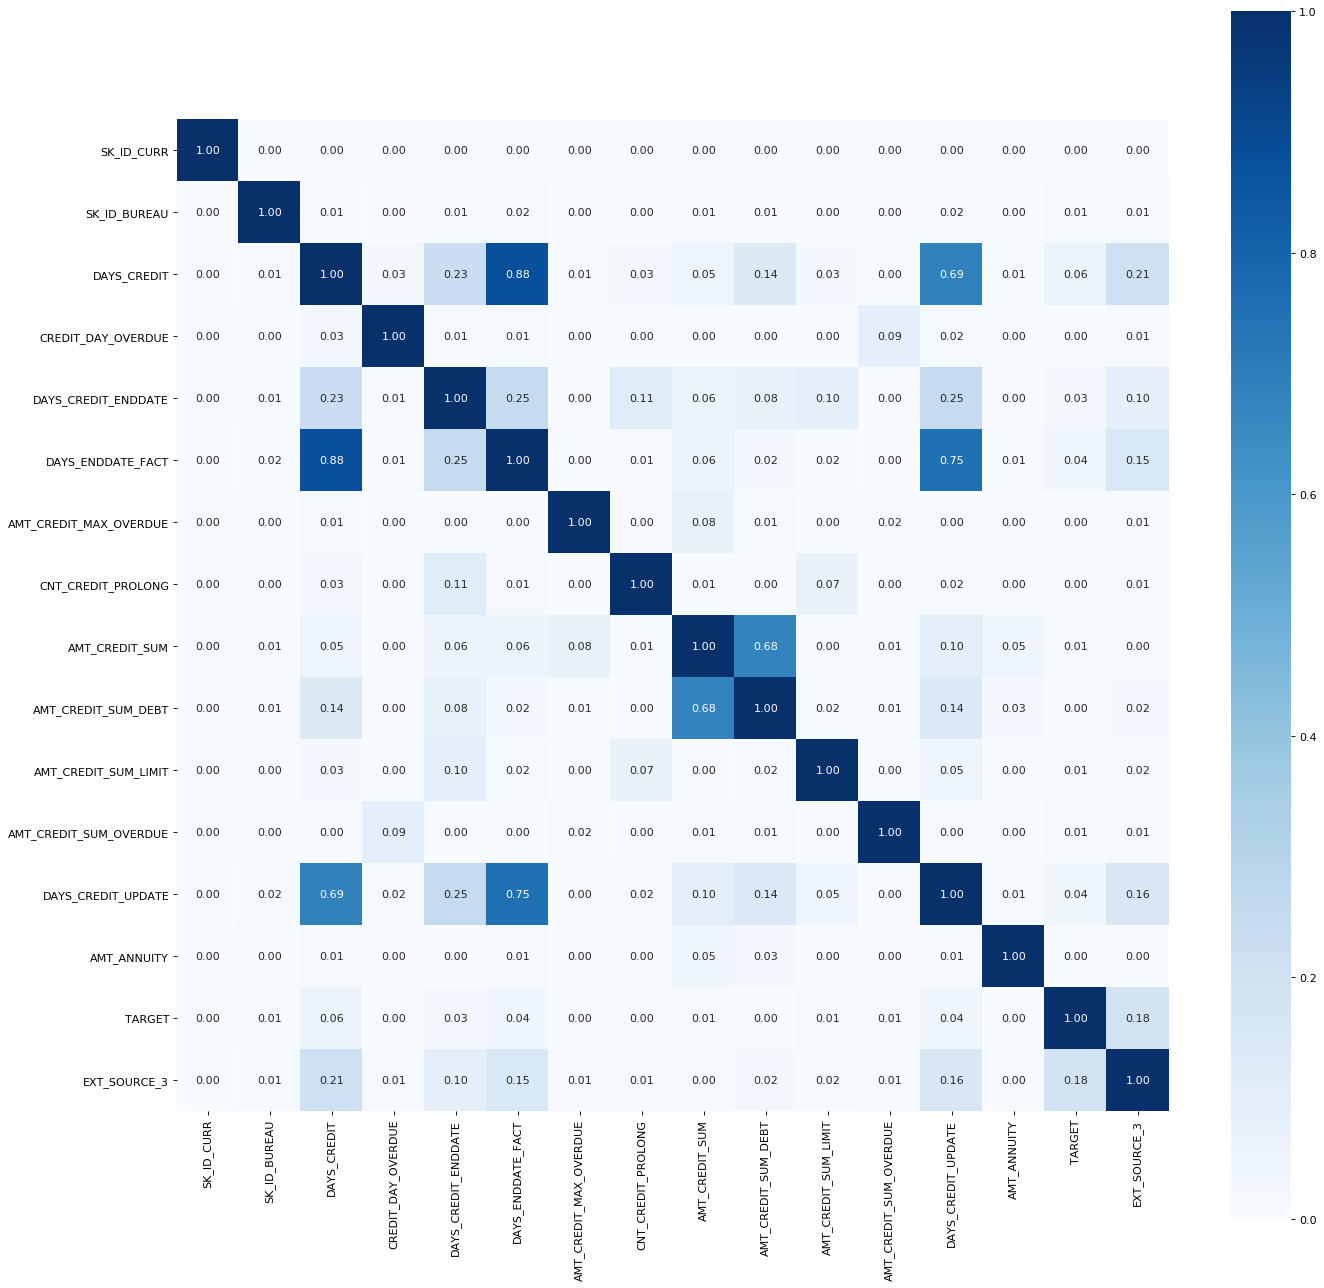

數值型別欄位計共 16 個。


SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  \
SK_ID_CURR                1.000000      0.000135     0.000266   
SK_ID_BUREAU              0.000135      1.000000     0.013015   
DAYS_CREDIT               0.000266      0.013015     1.000000   
CREDIT_DAY_OVERDUE        0.000283     -0.002628    -0.027266   
DAYS_CREDIT_ENDDATE       0.000456      0.009107     0.225682   
DAYS_ENDDATE_FACT        -0.000648      0.017890     0.875359   
AMT_CREDIT_MAX_OVERDUE    0.001329      0.002290    -0.014724   
CNT_CREDIT_PROLONG       -0.000388     -0.000740    -0.030460   
AMT_CREDIT_SUM            0.001179      0.007962     0.050883   
AMT_CREDIT_SUM_DEBT      -0.000790      0.005732     0.135397   
AMT_CREDIT_SUM_LIMIT     -0.000304     -0.003986     0.025140   
AMT_CREDIT_SUM_OVERDUE   -0.000014     -0.000499    -0.000383   
DAYS_CREDIT_UPDATE        0.000510      0.019398     0.688771   
AMT_ANNUITY              -0.002727      0.001799     0.005676   
TARGET                   -0.003024     -0.009018     0.061556   
EXT_SOURCE_3              0.000619     -0.014575    -0.207690   

                        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
SK_ID_CURR                        0.000283             0.000456   
SK_ID_BUREAU                     -0.002628             0.009107   
DAYS_CREDIT                      -0.027266             0.225682   
CREDIT_DAY_OVERDUE                1.000000            -0.007352   
DAYS_CREDIT_ENDDATE              -0.007352             1.000000   
DAYS_ENDDATE_FACT                -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE            0.001249             0.000577   
CNT_CREDIT_PROLONG                0.002756             0.113683   
AMT_CREDIT_SUM                   -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT              -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT             -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE            0.090951             0.001077   
DAYS_CREDIT_UPDATE               -0.018461             0.248525   
AMT_ANNUITY                      -0.000339             0.000475   
TARGET                            0.002652             0.026497   
EXT_SOURCE_3                     -0.011966            -0.095531   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                      -0.000648                0.001329   
SK_ID_BUREAU                     0.017890                0.002290   
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT              0.019609                0.014007   
AMT_CREDIT_SUM_LIMIT             0.019476               -0.000112   
AMT_CREDIT_SUM_OVERDUE          -0.000332                0.015036   
DAYS_CREDIT_UPDATE               0.751294               -0.000749   
AMT_ANNUITY                      0.006274                0.001578   
TARGET                           0.039057                0.001587   
EXT_SOURCE_3                    -0.149575               -0.005627   

                        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
SK_ID_CURR                       -0.000388        0.001179   
SK_ID_BUREAU                     -0.000740        0.007962   
DAYS_CREDIT                      -0.030460        0.050883   
CREDIT_DAY_OVERDUE                0.002756       -0.003292   
DAYS_CREDIT_ENDDATE               0.113683        0.055424   
DAYS_ENDDATE_FACT                 0.012017        0.059096   
AMT_CREDIT_MAX_OVERDUE            0.001523        0.081663   
CNT_CREDIT_PROLONG                1.000000       -0.008345   
AMT_CREDIT_SUM                   -0.008345    

In [135]:
heatmap(bureau_train_target)

In [136]:
bureau_train_target.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  EXT_SOURCE_3  
0  Consumer credit                -131          NaN     0.0      0.231439  
1      Credit card                 -20          NaN     0.0      0.231439  
2  Consumer credit                 -16          NaN     0.0      0.231439  
3      Credit card                 -16          NaN     0.0      0.231439  
4  Consumer credit                 -21          NaN     0.0      0.231439

In [137]:
bureau_train_target[bureau_train_target["SK_ID_BUREAU"]==5714462].sort_values(by=["SK_ID_CURR"]).shape[0]
bureau_train_target[bureau_train_target["SK_ID_BUREAU"]==5005383].sort_values(by=["SK_ID_CURR"]).head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
66110      340031       5005383        Closed      currency 1        -2381   

       CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
66110                   0              -2075.0            -1589.0   

       AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
66110               33088.005                   0         59040.0   

       AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
66110                  0.0                   0.0                     0.0   

           CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  EXT_SOURCE_3  
66110  Consumer credit               -1589          NaN     NaN           NaN

In [138]:
bureau_train_target[bureau_train_target["SK_ID_CURR"]==215354].sort_values(by=["SK_ID_BUREAU"])
#bureau_train_target[bureau_train_target["SK_ID_CURR"]==456254].sort_values(by=["SK_ID_BUREAU"]).head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
225157      215354       5714458        Closed      currency 1        -1872   
225158      215354       5714459        Closed      currency 1        -1734   
225159      215354       5714460        Closed      currency 1        -1333   
225160      215354       5714461        Closed      currency 1        -1011   
0           215354       5714462        Closed      currency 1         -497   
1           215354       5714463        Active      currency 1         -208   
2           215354       5714464        Active      currency 1         -203   
3           215354       5714465        Active      currency 1         -203   
4           215354       5714466        Active      currency 1         -629   
5           215354       5714467        Active      currency 1         -273   
6           215354       5714468        Active      currency 1          -43   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
225157                   0               -776.0            -1203.0   
225158                   0               -638.0            -1336.0   
225159                   0              -1089.0             -987.0   
225160                   0               -830.0             -770.0   
0                        0               -153.0             -153.0   
1                        0               1075.0                NaN   
2                        0                528.0                NaN   
3                        0                  NaN                NaN   
4                        0               1197.0                NaN   
5                        0              27460.0                NaN   
6                        0                 79.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
225157                     NaN                   0        494550.0   
225158                     NaN                   0       1084032.0   
225159                     NaN                   0        102150.0   
225160                     NaN                   0        500463.0   
0                          NaN                   0         91323.0   
1                          NaN                   0        225000.0   
2                          NaN                   0        464323.5   
3                          NaN                   0         90000.0   
4                      77674.5                   0       2700000.0   
5                          0.0                   0        180000.0   
6                          0.0                   0         42103.8   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
225157                 0.00                  0.00                     0.0   
225158                 0.00                   NaN                     0.0   
225159                  NaN                   NaN                     0.0   
225160                  NaN                   NaN                     0.0   
0                      0.00                   NaN                     0.0   
1                 171342.00                   NaN                     0.0   
2                       NaN                   NaN                     0.0   
3                       NaN                   NaN                     0.0   
4                       NaN                   NaN                     0.0   
5                  71017.38             108982.62                     0.0   
6                  42103.80                  0.00                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  EXT_SOURCE_3  
225157  Consumer credit                -696          NaN     0.0      0.231439  
225158         Car loan               -1336          NaN     0.0      0.231439  
225159  Consumer credit                -984          NaN     0.0      0.231439  
225160  Consumer credit                -767          NaN     0.0      0.231439  
0       Consumer credit                -131    

In [139]:
#32筆有信貸局貸款紀錄的逾期金額>0者，CNT_CREDIT_PROLONG(信貸局貸款紀錄延長了多少次)>0
#與train-target比對8筆有違約（1筆重複ID）
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau['CNT_CREDIT_PROLONG']>0)].shape[0]
bureau_train_target.loc[(bureau_train_target['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau_train_target['CNT_CREDIT_PROLONG']>0)&(bureau_train_target['TARGET']==0),
            ('SK_ID_CURR','SK_ID_BUREAU','TARGET','AMT_CREDIT_SUM_OVERDUE','CNT_CREDIT_PROLONG')].shape[0]

24

[[Back to Top]](#索引)

### <a id=109011601>NEW1</a>

* [新增4個欄位- CREDIT_ACTIVE_(Active、Bad debt、Closed、Sold)，將同一個'SK_ID_CURR'彙整，列出CREDIT_ACTIVE發生的比例。併到bureau。](#a01)
* [新增15個欄位- CREDIT_TYPE (Another type of loan、Car loan...)，將同一個'SK_ID_CURR'彙整，列出CREDIT_TYPE發生的情況one hot encoding。併到bureau。](#a02)

In [140]:
#4筆['CREDIT_ACTIVE']=='Bad debt')，有違約。bureau_balance查不到資料
# bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Bad debt')&(bureau_train_target['TARGET']>0),
#             ('SK_ID_CURR','SK_ID_BUREAU','TARGET','AMT_CREDIT_SUM_OVERDUE','CNT_CREDIT_PROLONG')].shape[0]
bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Bad debt')&(bureau_train_target['TARGET']>0),
            ('SK_ID_CURR','SK_ID_BUREAU','TARGET','CREDIT_ACTIVE','AMT_CREDIT_SUM_OVERDUE','CNT_CREDIT_PROLONG')].head(10)

#1筆['CREDIT_ACTIVE']=='Bad debt')&(bureau_train_target['TARGET'].isnull()。bureau_balance，stat有多筆是5
#stat==5(means DPD 120+ or sold or written off)
# bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Bad debt')&(bureau_train_target['TARGET'].isnull()),
#             ('SK_ID_CURR','SK_ID_BUREAU','TARGET','AMT_CREDIT_SUM_OVERDUE','CNT_CREDIT_PROLONG')].head(10)
#16筆bureau_train_target['CREDIT_ACTIVE']=='Bad debt')&(bureau_train_target['TARGET']==0)
#bureau_balance有資料的：5499851(41個月STATUS都是x)，
# bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Bad debt')&(bureau_train_target['TARGET']==0),
#             ('SK_ID_CURR','SK_ID_BUREAU','TARGET','CREDIT_ACTIVE','AMT_CREDIT_SUM_OVERDUE','CNT_CREDIT_PROLONG')].head(10)

SK_ID_CURR  SK_ID_BUREAU  TARGET CREDIT_ACTIVE  \
7778         436084       5723864     1.0      Bad debt   
69946        386859       5246470     1.0      Bad debt   
1196451      207535       5300044     1.0      Bad debt   
1519538      176952       5326184     1.0      Bad debt   

         AMT_CREDIT_SUM_OVERDUE  CNT_CREDIT_PROLONG  
7778                        0.0                   0  
69946                   53532.0                   1  
1196451                     0.0                   0  
1519538                    42.3                   0

In [141]:
#共6527筆bureau_train_target['CREDIT_ACTIVE']=='Sold'
bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold')].shape[0]
#874筆['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET'].isnull())
#bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET'].isnull())].shape[0]
#5082筆['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==0)
#bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==0)].shape[0]
#571筆['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)，0筆同時逾期天數、延長了多少次>0
#571筆['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)，562筆逾期天數==0,9筆逾期天數>0，延長了多少次==0
#bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)&(bureau_train_target['CREDIT_DAY_OVERDUE']>0)&(bureau_train_target['CNT_CREDIT_PROLONG']==0)].shape[0]
# bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)&(bureau_train_target['CREDIT_DAY_OVERDUE']>0)&(bureau_train_target['CNT_CREDIT_PROLONG']==0)].head()
#6筆'CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)，延長了多少次>0
#565筆'CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)，延長了多少次>0
#bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)&(bureau_train_target['CNT_CREDIT_PROLONG']==0)].shape[0]
#bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold')&(bureau_train_target['TARGET']==1)].tail(20)

6527

In [142]:
#由CREDIT_ACTIVE看出，違約比率Bad debt(0.2)>Sold(0.1)>Active(0.092)>Closed(0.06)
#bureau_train_target.groupby('CREDIT_ACTIVE')[['TARGET']].sum().head()
bureau_train_target.groupby('CREDIT_ACTIVE')[['TARGET']].mean().head()

TARGET
CREDIT_ACTIVE          
Active         0.092885
Bad debt       0.200000
Closed         0.069311
Sold           0.101008

#### <a id=a01>新增4個欄位- CREDIT_ACTIVE_(Active、Bad debt、Closed、Sold)，將同一個'SK_ID_CURR'彙整，列出CREDIT_ACTIVE發生的比例。併到bureau。</a>

In [143]:
#1090114將同一個'SK_ID_CURR'彙整，列出CREDIT_ACTIVE發生的比例。併到train。
CREDIT_ACTIVE_count=pd.crosstab(bureau_train_target['SK_ID_CURR'], bureau_train_target['CREDIT_ACTIVE'],normalize=0)
CREDIT_ACTIVE_count.rename(columns={'Active':'CREDIT_ACTIVE_Active','Bad debt':'CREDIT_ACTIVE_Bad debt',
                                                                          'Closed':'CREDIT_ACTIVE_Closed','Sold':'CREDIT_ACTIVE_Sold'},inplace=True)
#CREDIT_ACTIVE_count.head()
CREDIT_ACTIVE_count=pd.merge(bureau, CREDIT_ACTIVE_count,left_on='SK_ID_CURR',right_index=True,how='left')
CREDIT_ACTIVE_count.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  ...  AMT_CREDIT_SUM_DEBT  \
0                     NaN                   0  ...                  0.0   
1                     NaN                   0  ...             171342.0   
2                     NaN                   0  ...                  NaN   
3                     NaN                   0  ...                  NaN   
4                 77674.5                   0  ...                  NaN   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   NaN                     0.0  Consumer credit   
1                   NaN                     0.0      Credit card   
2                   NaN                     0.0  Consumer credit   
3                   NaN                     0.0      Credit card   
4                   NaN                     0.0  Consumer credit   

  DAYS_CREDIT_UPDATE  AMT_ANNUITY  CREDIT_ACTIVE_Active  \
0               -131          NaN              0.545455   
1                -20          NaN              0.545455   
2                -16          NaN              0.545455   
3                -16          NaN              0.545455   
4                -21          NaN              0.545455   

   CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  CREDIT_ACTIVE_Sold  
0                     0.0              0.454545                 0.0  
1                     0.0              0.454545                 0.0  
2                     0.0              0.454545                 0.0  
3                     0.0              0.454545                 0.0  
4                     0.0              0.454545                 0.0  

[5 rows x 21 columns]

In [144]:
#1090114將同一個'SK_ID_CURR'彙整，列出CREDIT_ACTIVE發生的次數。以便觀察target
#bureau_train_target.pivot_table('TARGET',index='SK_ID_CURR',columns='CREDIT_ACTIVE').head()
bureau_train_target.pivot_table(values=['TARGET'],index='SK_ID_CURR',columns='CREDIT_ACTIVE',aggfunc=['count'],margins=True, fill_value=0).tail(15)

count                                  
               TARGET                                  
CREDIT_ACTIVE  Active Bad debt  Closed  Sold        All
SK_ID_CURR                                             
456238              2        0       4     0        6.0
456239              5        0       6     0       11.0
456240              1        0       1     0        2.0
456241              2        0       3     0        5.0
456242              1        0       0     0        1.0
456243              2        0       5     0        7.0
456244              4        0      19     0       23.0
456246              1        0       2     0        3.0
456247              3        0       8     0       11.0
456249              2        0      11     0       13.0
456250              0        0       0     0        NaN
456253              2        0       2     0        4.0
456254              0        0       1     0        1.0
456255              5        0       6     0       11.0
All            541919       20  917733  5653  1465325.0

#### <a id=a02> 新增15個欄位- CREDIT_TYPE (Another type of loan、Car loan...)，將同一個'SK_ID_CURR'彙整，列出CREDIT_TYPE發生的情況one hot encoding。併到bureau。</a>

* 無採金額的比例，因為有些人的金額(AMT_CREDIT_SUM)是空值，或是0

In [145]:
#one hot encoding
CREDIT_CREDIT_TYPE_count_onehot = pd.get_dummies(bureau_train_target['CREDIT_TYPE'])
CREDIT_CREDIT_TYPE_count_onehot.head()
CREDIT_CREDIT_TYPE_count_onehot=pd.merge(bureau, CREDIT_CREDIT_TYPE_count_onehot,left_on='SK_ID_CURR',right_index=True,how='left')
CREDIT_CREDIT_TYPE_count_onehot.head(10)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   
5      215354       5714467        Active      currency 1         -273   
6      215354       5714468        Active      currency 1          -43   
7      162297       5714469        Closed      currency 1        -1896   
8      162297       5714470        Closed      currency 1        -1146   
9      162297       5714471        Active      currency 1        -1146   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   
5                   0              27460.0                NaN   
6                   0                 79.0                NaN   
7                   0              -1684.0            -1710.0   
8                   0               -811.0             -840.0   
9                   0               -484.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  ...  Interbank credit  \
0                     NaN                   0  ...                 0   
1                     NaN                   0  ...                 0   
2                     NaN                   0  ...                 0   
3                     NaN                   0  ...                 0   
4                 77674.5                   0  ...                 0   
5                     0.0                   0  ...                 0   
6                     0.0                   0  ...                 0   
7                 14985.0                   0  ...                 0   
8                     0.0                   0  ...                 0   
9                     0.0                   0  ...                 0   

   Loan for business development  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
5                              0   
6                              0   
7                              0   
8                              0   
9                              0   

   Loan for purchase of shares (margin lending)  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
5                                             0   
6                                             0   
7                                             0   
8                                             0   
9                                             0   

   Loan for the purchase of equipment Loan for working capital replenishment  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
5                                   0                                      0   
6                                   0                                      0   
7                                   0                                      0   


* 新增15個欄位- CREDIT_TYPE (Another type of loan、Car loan...)，將同一個'SK_ID_CURR'彙整，列出CREDIT_TYPE發生的比例。併到bureau。
* 待確是否要使用


In [146]:
#將同一個'SK_ID_CURR'彙整，列出CREDIT_TYPE發生的比例。以便觀察target、便於匯入train
CREDIT_CREDIT_TYPE_count=pd.crosstab(bureau_train_target['SK_ID_CURR'], bureau_train_target['CREDIT_TYPE'],normalize=0)
#CREDIT_CREDIT_TYPE_count.head()
CREDIT_CREDIT_TYPE_count.tail()
CREDIT_CREDIT_TYPE_count=pd.merge(bureau, CREDIT_CREDIT_TYPE_count,left_on='SK_ID_CURR',right_index=True,how='left')
CREDIT_CREDIT_TYPE_count.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  ...  Interbank credit  \
0                     NaN                   0  ...               0.0   
1                     NaN                   0  ...               0.0   
2                     NaN                   0  ...               0.0   
3                     NaN                   0  ...               0.0   
4                 77674.5                   0  ...               0.0   

   Loan for business development  \
0                            0.0   
1                            0.0   
2                            0.0   
3                            0.0   
4                            0.0   

   Loan for purchase of shares (margin lending)  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Loan for the purchase of equipment Loan for working capital replenishment  \
0                                 0.0                                    0.0   
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   Microloan  Mobile operator loan  Mortgage  Real estate loan  \
0        0.0                   0.0       0.0               0.0   
1        0.0                   0.0       0.0               0.0   
2        0.0                   0.0       0.0               0.0   
3        0.0                   0.0       0.0               0.0   
4        0.0                   0.0       0.0               0.0   

   Unknown type of loan  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 32 columns]

In [147]:
#Loan for the purchase of equipmen最高，#4筆違約#13筆無違約
bureau_train_target.groupby('CREDIT_TYPE')[['TARGET']].mean().sort_values(by=["TARGET"])

TARGET
CREDIT_TYPE                                           
Interbank credit                              0.000000
Loan for purchase of shares (margin lending)  0.000000
Mobile operator loan                          0.000000
Real estate loan                              0.000000
Cash loan (non-earmarked)                     0.043478
Mortgage                                      0.049978
Car loan                                      0.055731
Unknown type of loan                          0.061441
Loan for business development                 0.061592
Another type of loan                          0.071429
Consumer credit                               0.074837
Credit card                                   0.088009
Loan for working capital replenishment        0.127321
Microloan                                     0.206441
Loan for the purchase of equipment            0.235294

In [148]:
bureau[bureau['AMT_CREDIT_SUM']==0].head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
14       238881       5714482        Closed      currency 1         -318   
21       222183       5714491        Active      currency 1         -784   
149      253882       5714648        Closed      currency 1        -1341   
166      373324       5714674        Active      currency 1         -837   
216      451241       5714737        Active      currency 1        -1321   

     CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
14                    0               -187.0             -187.0   
21                    0               1008.0                NaN   
149                   0               -241.0             -749.0   
166                   0               -453.0                NaN   
216                   0                  NaN                NaN   

     AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
14                      NaN                   0             0.0   
21                      0.0                   0             0.0   
149                     NaN                   0             0.0   
166                     0.0                   0             0.0   
216                     0.0                   0             0.0   

     AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
14                 0.000                 0.000                     0.0   
21              -411.615               411.615                     0.0   
149                0.000                   NaN                     0.0   
166              -45.360                45.360                     0.0   
216                0.000                 0.000                     0.0   

     CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
14   Credit card                -185          NaN  
21   Credit card                -694          NaN  
149  Credit card                -747          NaN  
166  Credit card                -685          NaN  
216  Credit card                -228          NaN

In [149]:
#bureau_train_target.groupby(['SK_ID_CURR','AMT_CREDIT_SUM'])['CREDIT_TYPE'].agg('sum').head()
#bureau_train_target.pivot_table(values=['AMT_CREDIT_SUM'],index='SK_ID_CURR',columns='CREDIT_TYPE',aggfunc=['count'],margins=True, fill_value=0).tail(15)

In [150]:
#共19筆CREDIT_TYPE：Loan for the purchase of equipment
# bureau_train_target[bureau_train_target["CREDIT_TYPE"]=='Loan for the purchase of equipment'].sort_values(by=["SK_ID_CURR"]).shape[0]
#4筆違約
#13筆無違約
#2筆無資料
bureau_train_target.loc[(bureau_train_target['CREDIT_TYPE']=='Loan for the purchase of equipment')&(bureau_train_target['TARGET'].isnull())].shape[0]

2

In [151]:
bureau_train_target.groupby('CREDIT_TYPE')[['TARGET']].sum().sort_values(by=["TARGET"])

TARGET
CREDIT_TYPE                                          
Interbank credit                                  0.0
Loan for purchase of shares (margin lending)      0.0
Mobile operator loan                              0.0
Real estate loan                                  0.0
Cash loan (non-earmarked)                         1.0
Loan for the purchase of equipment                4.0
Unknown type of loan                             29.0
Loan for working capital replenishment           48.0
Another type of loan                             61.0
Loan for business development                   106.0
Mortgage                                        780.0
Car loan                                       1324.0
Microloan                                      1859.0
Credit card                                   30262.0
Consumer credit                               80046.0

In [152]:
#2種方法一樣
#bureau_train_target.groupby(['CREDIT_ACTIVE','CREDIT_TYPE'])['TARGET'].aggregate('mean').unstack()
#privot_table(aggfunc='mean'(預設)，可改sum.mean.count.min.max)
bureau_train_target.pivot_table('TARGET',index='CREDIT_ACTIVE',columns='CREDIT_TYPE')

CREDIT_TYPE    Another type of loan  Car loan  Cash loan (non-earmarked)  \
CREDIT_ACTIVE                                                              
Active                     0.055172  0.066950                       0.05   
Bad debt                        NaN       NaN                        NaN   
Closed                     0.073276  0.048848                       0.00   
Sold                       0.153846  0.074074                       0.00   

CREDIT_TYPE    Consumer credit  Credit card  Interbank credit  \
CREDIT_ACTIVE                                                   
Active                0.092083     0.094937               NaN   
Bad debt              0.133333     0.400000               NaN   
Closed                0.068721     0.070241               0.0   
Sold                  0.125270     0.082891               NaN   

CREDIT_TYPE    Loan for business development  \
CREDIT_ACTIVE                                  
Active                              0.082474   
Bad debt                                 NaN   
Closed                              0.057504   
Sold                                0.000000   

CREDIT_TYPE    Loan for purchase of shares (margin lending)  \
CREDIT_ACTIVE                                                 
Active                                                  0.0   
Bad debt                                                NaN   
Closed                                                  0.0   
Sold                                                    NaN   

CREDIT_TYPE    Loan for the purchase of equipment  \
CREDIT_ACTIVE                                       
Active                                   0.000000   
Bad debt                                      NaN   
Closed                                   0.285714   
Sold                                          NaN   

CREDIT_TYPE    Loan for working capital replenishment  Microloan  \
CREDIT_ACTIVE                                                      
Active                                       0.155000   0.269856   
Bad debt                                          NaN        NaN   
Closed                                       0.104938   0.186456   
Sold                                         0.000000   0.000000   

CREDIT_TYPE    Mobile operator loan  Mortgage  Real estate loan  \
CREDIT_ACTIVE                                                     
Active                          0.0  0.050703               0.0   
Bad debt                        NaN       NaN               NaN   
Closed                          NaN  0.046029               0.0   
Sold                            NaN  0.066414               0.0   

CREDIT_TYPE    Unknown type of loan  
CREDIT_ACTIVE                        
Active                     0.081633  
Bad debt                        NaN  
Closed                     0.056150  
Sold                            NaN

In [153]:
#['CREDIT_ACTIVE']=='Sold') 
#571 TARGET']>0
#5082 ['TARGET']==0
#874['TARGET'].isnull()
bureau_train_target.loc[(bureau_train_target['CREDIT_ACTIVE']=='Sold') & (bureau_train_target['TARGET'].isnull())].shape[0]

874

In [154]:
6480057
bureau_train_target.loc[(bureau_train_target['SK_ID_BUREAU']==6842759)]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1704691      163815       6842759        Closed      currency 1        -2232   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1704691                   0              -1286.0            -1286.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1704691                     NaN                   0        156973.5   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1704691                  NaN                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  \
1704691  Consumer credit               -1286       9697.5     0.0   

         EXT_SOURCE_3  
1704691      0.234015

In [155]:
pd.set_option("display.max_rows",None)
bureau_train_target.loc[bureau_train_target["SK_ID_CURR"]==163815].sort_values(by=["SK_ID_BUREAU"])

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1704689      163815       6842757        Active      currency 1         -238   
1704690      163815       6842758          Sold      currency 1        -2232   
1704691      163815       6842759        Closed      currency 1        -2232   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1704689                   0                806.0                NaN   
1704690                   0              -1501.0                NaN   
1704691                   0              -1286.0            -1286.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1704689                     NaN                   0         22500.0   
1704690                     NaN                   0        156973.5   
1704691                     NaN                   0        156973.5   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1704689               9994.5                   0.0                     0.0   
1704690                  NaN                   NaN                     0.0   
1704691                  NaN                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  \
1704689      Credit card                 -13       9994.5     0.0   
1704690      Credit card               -2200          0.0     0.0   
1704691  Consumer credit               -1286       9697.5     0.0   

         EXT_SOURCE_3  
1704689      0.234015  
1704690      0.234015  
1704691      0.234015

In [156]:
#將DAYS_CREDIT_UPDATE切割、CREDIT_ACTIVE、CREDIT_TYPE看違約比率
# DAYS_CREDIT_UPDATE_check=pd.cut(bureau_train_target['DAYS_CREDIT_UPDATE'],[-42000,-41800,-2920,-2555,-2190,-1825,-1460,-1095,-730,-365,-1,0])
# bureau_train_target.pivot_table('TARGET',['CREDIT_ACTIVE',DAYS_CREDIT_UPDATE_check],'CREDIT_TYPE')
# DAYS_CREDIT_UPDATE_check=pd.cut(bureau_train_target['DAYS_CREDIT_UPDATE'],[-42000,-41800,-2920,-1825,-1095,-730,-365,-1,0])
# bureau_train_target.pivot_table('TARGET',['CREDIT_ACTIVE',DAYS_CREDIT_UPDATE_check],'CREDIT_TYPE')

DAYS_CREDIT_UPDATE_check=pd.cut(bureau_train_target['DAYS_CREDIT_UPDATE'],[-42000,-41800,-2920,-1825,-365,-1,0])
bureau_train_target.pivot_table('TARGET',['CREDIT_ACTIVE',DAYS_CREDIT_UPDATE_check],'CREDIT_TYPE')                                


CREDIT_TYPE                       Another type of loan  Car loan  \
CREDIT_ACTIVE DAYS_CREDIT_UPDATE                                   
Active        (-42000, -41800]                     NaN       NaN   
              (-2920, -1825]                       NaN  0.036364   
              (-1825, -365]                   0.100000  0.058642   
              (-365, -1]                      0.051852  0.067485   
              (-1, 0]                              NaN  0.000000   
Bad debt      (-2920, -1825]                       NaN       NaN   
              (-1825, -365]                        NaN       NaN   
              (-365, -1]                           NaN       NaN   
Closed        (-42000, -41800]                     NaN       NaN   
              (-2920, -1825]                  0.078947  0.036675   
              (-1825, -365]                   0.052209  0.050272   
              (-365, -1]                      0.087087  0.049219   
              (-1, 0]                              NaN       NaN   
Sold          (-2920, -1825]                       NaN  0.133333   
              (-1825, -365]                   0.153846  0.056034   
              (-365, -1]                           NaN  0.094937   

CREDIT_TYPE                       Cash loan (non-earmarked)  Consumer credit  \
CREDIT_ACTIVE DAYS_CREDIT_UPDATE                                               
Active        (-42000, -41800]                          NaN              NaN   
              (-2920, -1825]                            NaN         0.065475   
              (-1825, -365]                             NaN         0.070697   
              (-365, -1]                               0.05         0.094257   
              (-1, 0]                                   NaN         0.163043   
Bad debt      (-2920, -1825]                            NaN         1.000000   
              (-1825, -365]                             NaN         0.071429   
              (-365, -1]                                NaN              NaN   
Closed        (-42000, -41800]                          NaN              NaN   
              (-2920, -1825]                            NaN         0.057170   
              (-1825, -365]                             NaN         0.067139   
              (-365, -1]                               0.00         0.079078   
              (-1, 0]                                   NaN         0.000000   
Sold          (-2920, -1825]                            NaN         0.046358   
              (-1825, -365]                             NaN         0.094680   
              (-365, -1]                               0.00         0.167520   

CREDIT_TYPE                       Credit card  Interbank credit  \
CREDIT_ACTIVE DAYS_CREDIT_UPDATE                                  
Active        (-42000, -41800]       0.238095               NaN   
              (-2920, -1825]         0.049942               NaN   
              (-1825, -365]          0.074970               NaN   
              (-365, -1]             0.099816               NaN   
              (-1, 0]                0.054795               NaN   
Bad debt      (-2920, -1825]              NaN               NaN   
              (-1825, -365]          0.333333               NaN   
              (-365, -1]             0.500000               NaN   
Closed        (-42000, -41800]       0.108108               NaN   
              (-2920, -1825]         0.061018               NaN   
              (-1825, -365]          0.064081               0.0   
              (-365, -1]             0.080485               NaN   
              (-1, 0]                0.000000               NaN   
Sold          (-2920, -1825]         0.081330               NaN   
              (-1825, -365]          0.127451               NaN   
              (-365, -1]             0.076503               NaN   

CREDIT_TYPE                       Loan for business development  \
CREDIT_ACTIVE DAYS_CREDIT_UPDATE                            

[[Back to Top]](#索引)

### <a id=082>與測試資料驗證</a>

In [157]:
#bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau['CNT_CREDIT_PROLONG']>0)].shape[0]
bureau_test_target.loc[(bureau_test_target['AMT_CREDIT_SUM_OVERDUE']>0)&(bureau_test_target['CNT_CREDIT_PROLONG']>0)&(bureau_test_target['test']==1),
            ('SK_ID_CURR','SK_ID_BUREAU','TARGET','AMT_CREDIT_SUM_OVERDUE','CNT_CREDIT_PROLONG')].shape[0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:805: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



0

In [158]:
bureau_test_target.loc[(bureau_test_target['CREDIT_ACTIVE']=='Sold') & (bureau_test_target['test']>0)].shape[0]

874

[[Back to Top]](#索引)

## <a id=09>9.載入home-bureau_balance</a>

### <a id=091>資料的型態、大小</a>

In [159]:
#group_3
#bureau_balance=pd.read_csv("../../datasets/homecdt_eda/bureau_balance.csv")
#資策會
bureau_balance=pd.read_csv("../../bureau_balance.csv") # 所有資料
#家裡
# bureau_balance=pd.read_csv("home-credit-default-risk/bureau_balance.csv")# 所有資料

In [160]:
bureau_balance.head(5)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [161]:
total_info(bureau_balance)

              bureau
Row         27299925
Column             3
Total Data  81899775
int64              2
object             1


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_BUREAU     int64       817395              0              0.0
MONTHS_BALANCE   int64           97              0              0.0
STATUS          object            8              0              0.0

[[Back to Top]](#索引)

### <a id=092>特徵篩選</a>

### <a id=109011602>NEW2</a>

* [新增8個欄位，STATUS的各類別總和發生的比例](#b01)
* [新增24個欄位：STATUS最近3、6、9期各類別總和發生的比例](#b02)
* [將bureau_balance資料合併到bureau](#bb)

#### bureau_balance列出同一個SK_ID_BUREAU，發生STATUS不同情況的次數

In [162]:
#109/01/12
#bureau_balance.groupby(['SK_ID_BUREAU','STATUS']).aggregate({'MONTHS_BALANCE':max}).head(130)

#列出同一個SK_ID_BUREAU，發生STATUS不同情況的次數
#817395筆不同'SK_ID_BUREAU'
#bureau_balance.pivot_table('MONTHS_BALANCE',index='SK_ID_BUREAU',columns='STATUS',aggfunc='count').shape[0]
#bureau_balance.pivot_table('MONTHS_BALANCE',index='SK_ID_BUREAU',columns='STATUS',aggfunc='count',margins=True, fill_value=0).head(15)
#bureau_balance.pivot_table('MONTHS_BALANCE',index='SK_ID_BUREAU',columns='STATUS',aggfunc='count',margins=True, fill_value=0).tail(15)
#817396筆-1列＝817395筆不同'SK_ID_BUREAU
#bureau_balance.pivot_table(values=['MONTHS_BALANCE'],index='SK_ID_BUREAU',columns='STATUS',aggfunc=['count'],margins=True, fill_value=0).shape[0]
#bureau_balance.pivot_table(values=['MONTHS_BALANCE'],index='SK_ID_BUREAU',columns='STATUS',aggfunc=['count'],margins=True, fill_value=0).head(15)
bureau_balance.pivot_table(values=['MONTHS_BALANCE'],index='SK_ID_BUREAU',columns='STATUS',aggfunc=['count'],margins=True, fill_value=0).tail(15)

count                                              \
             MONTHS_BALANCE                                               
STATUS                    0       1      2     3     4      5         C   
SK_ID_BUREAU                                                              
6842875                  24       0      0     0     0      0        52   
6842876                   1       0      0     0     0      0         0   
6842877                  40       0      0     0     0      0         0   
6842878                   5       0      0     0     0      0        23   
6842879                   6       0      0     0     0      0        20   
6842880                   7       2      0     0     0      0        36   
6842881                  20       0      0     0     0      0         0   
6842882                   4       0      0     0     0      0         0   
6842883                   1       0      0     0     0      0        35   
6842884                   9       0      0     0     0      0        20   
6842885                  12       0      0     0     0     12         0   
6842886                   8       0      0     0     0      0        25   
6842887                   6       0      0     0     0      0        31   
6842888                   9       1      0     0     0      0        52   
All                 7499507  242347  23419  8924  5847  62406  13646993   

                                 
                                 
STATUS              X       All  
SK_ID_BUREAU                     
6842875             1        77  
6842876            25        26  
6842877             1        41  
6842878             2        30  
6842879            13        39  
6842880            13        58  
6842881            12        32  
6842882             4         8  
6842883             1        37  
6842884            19        48  
6842885             0        24  
6842886             0        33  
6842887             0        37  
6842888             0        62  
All           5810482  27299925

In [163]:
bureau_balance.pivot_table(values=['MONTHS_BALANCE'],index='SK_ID_BUREAU',columns='STATUS',aggfunc=['max'],margins=True, fill_value=0).tail(15)

max                           
             MONTHS_BALANCE                           
STATUS                    0   1  2  3  4  5  C   X All
SK_ID_BUREAU                                          
6842875                 -52   0  0  0  0  0  0 -76   0
6842876                 -25   0  0  0  0  0  0   0   0
6842877                   0   0  0  0  0  0  0 -40   0
6842878                 -24   0  0  0  0  0  0 -23   0
6842879                 -30   0  0  0  0  0  0 -20   0
6842880                 -37 -46  0  0  0  0  0 -36   0
6842881                  -2   0  0  0  0  0  0   0   0
6842882                   0   0  0  0  0  0  0  -1   0
6842883                 -35   0  0  0  0  0  0 -36   0
6842884                 -38   0  0  0  0  0  0 -20   0
6842885                 -12   0  0  0  0  0  0   0   0
6842886                 -25   0  0  0  0  0  0   0   0
6842887                 -31   0  0  0  0  0  0   0   0
6842888                 -52 -58  0  0  0  0  0   0   0
All                       0   0  0  0  0  0  0   0   0

#### bureau_balance列出同一個SK_ID_BUREAU，發生STATUS不同情況的比例

In [164]:
#列出同一個SK_ID_BUREAU，發生STATUS不同情況的比例
STATUS_count=pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS'], normalize=0)
#pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS'], normalize=0).head(15)
#pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS'], normalize=0).tail(15)
STATUS_count.head(5)
#STATUS_count.loc[(STATUS_count['4']>0)].head(20)

STATUS               0    1    2    3    4    5         C         X
SK_ID_BUREAU                                                       
5001709       0.000000  0.0  0.0  0.0  0.0  0.0  0.886598  0.113402
5001710       0.060241  0.0  0.0  0.0  0.0  0.0  0.578313  0.361446
5001711       0.750000  0.0  0.0  0.0  0.0  0.0  0.000000  0.250000
5001712       0.526316  0.0  0.0  0.0  0.0  0.0  0.473684  0.000000
5001713       0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  1.000000

#### <a id=b01>新增8個欄位，STATUS的各類別總和發生的比例</a>

In [165]:
#新增8個欄位，STATUS的各類別總和發生的比例
#列出同一個SK_ID_BUREAU，發生STATUS不同情況的比例
total_status_count=pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS'], normalize=0)
#pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS'], normalize=0).head(15)
#pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS'], normalize=0).tail(15)

#STATUS_count.loc[(STATUS_count['5']>0)].head(5)
#更改列出同一個SK_ID_BUREAU，發生STATUS不同情況的比例的欄位名稱
total_status_count.rename(columns={'0':'total_status_0%','1':'total_status_1%','2':'total_status_2%',
                                '3':'total_status_3%','4':'total_status_4%','5':'total_status_5%',
                                'C':'total_status_C%','X':'total_status_X%'},inplace=True) 
#total_status_count.reset_index(level='SK_ID_BUREAU',inplace=True)
#total_status_count.head(5)
#合併到bureau_balance
total_status_count=pd.merge(bureau_balance, total_status_count,left_on='SK_ID_BUREAU',right_index=True,how='left')
total_status_count.head(12)
#total_status_count.shape

SK_ID_BUREAU  MONTHS_BALANCE STATUS  total_status_0%  total_status_1%  \
0        5715448               0      C         0.296296              0.0   
1        5715448              -1      C         0.296296              0.0   
2        5715448              -2      C         0.296296              0.0   
3        5715448              -3      C         0.296296              0.0   
4        5715448              -4      C         0.296296              0.0   
5        5715448              -5      C         0.296296              0.0   
6        5715448              -6      C         0.296296              0.0   
7        5715448              -7      C         0.296296              0.0   
8        5715448              -8      C         0.296296              0.0   
9        5715448              -9      0         0.296296              0.0   
10       5715448             -10      0         0.296296              0.0   
11       5715448             -11      X         0.296296              0.0   

    total_status_2%  total_status_3%  total_status_4%  total_status_5%  \
0               0.0              0.0              0.0              0.0   
1               0.0              0.0              0.0              0.0   
2               0.0              0.0              0.0              0.0   
3               0.0              0.0              0.0              0.0   
4               0.0              0.0              0.0              0.0   
5               0.0              0.0              0.0              0.0   
6               0.0              0.0              0.0              0.0   
7               0.0              0.0              0.0              0.0   
8               0.0              0.0              0.0              0.0   
9               0.0              0.0              0.0              0.0   
10              0.0              0.0              0.0              0.0   
11              0.0              0.0              0.0              0.0   

    total_status_C%  total_status_X%  
0          0.333333          0.37037  
1          0.333333          0.37037  
2          0.333333          0.37037  
3          0.333333          0.37037  
4          0.333333          0.37037  
5          0.333333          0.37037  
6          0.333333          0.37037  
7          0.333333          0.37037  
8          0.333333          0.37037  
9          0.333333          0.37037  
10         0.333333          0.37037  
11         0.333333          0.37037

#### <a id=b02>新增24個欄位：STATUS最近3、6、9期各類別總和發生的比例</a>

In [166]:
# STATUS最近3、6、9期狀況
#新增欄位MONTHS_BALANC_MAX
bb_g_id = pd.DataFrame(bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max())
bb_g_id.head()
bb_g_id.reset_index(level='SK_ID_BUREAU',inplace=True)
bb_g_id.rename(columns={'MONTHS_BALANCE':'MONTHS_BALANC_MAX'},inplace=True)
bb_m = pd.merge(bureau_balance,bb_g_id)
bb_m.head(10)

SK_ID_BUREAU  MONTHS_BALANCE STATUS  MONTHS_BALANC_MAX
0       5715448               0      C                  0
1       5715448              -1      C                  0
2       5715448              -2      C                  0
3       5715448              -3      C                  0
4       5715448              -4      C                  0
5       5715448              -5      C                  0
6       5715448              -6      C                  0
7       5715448              -7      C                  0
8       5715448              -8      C                  0
9       5715448              -9      0                  0

In [167]:
bb_m['recent_3'] = (bb_m['MONTHS_BALANCE'] >= bb_m['MONTHS_BALANC_MAX']-2) #新增欄位，並標示MONTHS_BALANCE是否為最近3期
bb_m['recent_6'] = (bb_m['MONTHS_BALANCE'] >= bb_m['MONTHS_BALANC_MAX']-5) #新增欄位，並標示MONTHS_BALANCE是否為最近6期
bb_m['recent_9'] = (bb_m['MONTHS_BALANCE'] >= bb_m['MONTHS_BALANC_MAX']-8) #新增欄位，並標示MONTHS_BALANCE是否為最近9期
#bb_m.head(50)
recent_3_status=bb_m[bb_m["recent_3"]==True].sort_values(by=["SK_ID_BUREAU"]) #新增表格，篩選最近3期MONTHS_BALANCE
recent_6_status=bb_m[bb_m["recent_6"]==True].sort_values(by=["SK_ID_BUREAU"]) #新增表格，篩選最近6期MONTHS_BALANCE
recent_9_status=bb_m[bb_m["recent_9"]==True].sort_values(by=["SK_ID_BUREAU"]) #新增表格，篩選最近9期MONTHS_BALANCE
#recent_3_status.head(21)
#recent_6_status.head(36)
#recent_9_status.head(54)
recent_3_status=pd.crosstab(recent_3_status['SK_ID_BUREAU'], recent_3_status['STATUS'],normalize=0) #列出最近3期STATUS的比例
recent_6_status=pd.crosstab(recent_6_status['SK_ID_BUREAU'], recent_6_status['STATUS'],normalize=0) #列出最近6期STATUS的比例
recent_9_status=pd.crosstab(recent_9_status['SK_ID_BUREAU'], recent_9_status['STATUS'],normalize=0) #列出最近9期STATUS的比例
#recent_3_status.head(10)
#recent_6_status.head(10)
#recent_9_status.head(10)
#recent_3_status.shape
recent_3_status.rename(columns={'0':'recent_3_status_0%','1':'recent_3_status_1%','2':'recent_3_status_2%',
                                '3':'recent_3_status_3%','4':'recent_3_status_4%','5':'recent_3_status_5%',
                                'C':'recent_3_status_C%','X':'recent_3_status_X%'},inplace=True)  #更改最近3期欄位名稱
recent_6_status.rename(columns={'0':'recent_6_status_0%','1':'recent_6_status_1%','2':'recent_6_status_2%',
                                '3':'recent_6_status_3%','4':'recent_6_status_4%','5':'recent_6_status_5%',
                                'C':'recent_6_status_C%','X':'recent_6_status_X%'},inplace=True)  #更改最近6期欄位名稱
recent_9_status.rename(columns={'0':'recent_9_status_0%','1':'recent_9_status_1%','2':'recent_9_status_2%',
                                '3':'recent_9_status_3%','4':'recent_9_status_4%','5':'recent_9_status_5%',
                                'C':'recent_9_status_C%','X':'recent_9_status_X%'},inplace=True)  #更改最近9期欄位名稱
#recent_3_status.head()
#recent_6_status.head()
recent_9_status.head(6)
recent_3_status.shape

(817395, 8)

In [168]:
#合併STATUS最近3、6、9期各類別總和發生的比例
recent_369_status=[recent_3_status,recent_6_status,recent_9_status]
recent_369_status=pd.concat(recent_369_status,axis=1)
#recent_369_status.reset_index(level='SK_ID_BUREAU',inplace=True)
#recent_369_status.head(10)
#recent_369_status.shape[0]
#合併到bureau_balance
recent_369_status=pd.merge(bureau_balance, recent_369_status,left_on='SK_ID_BUREAU',right_index=True,how='left')
recent_369_status.head(10)

SK_ID_BUREAU  MONTHS_BALANCE STATUS  recent_3_status_0%  \
0       5715448               0      C                 0.0   
1       5715448              -1      C                 0.0   
2       5715448              -2      C                 0.0   
3       5715448              -3      C                 0.0   
4       5715448              -4      C                 0.0   
5       5715448              -5      C                 0.0   
6       5715448              -6      C                 0.0   
7       5715448              -7      C                 0.0   
8       5715448              -8      C                 0.0   
9       5715448              -9      0                 0.0   

   recent_3_status_1%  recent_3_status_2%  recent_3_status_3%  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 0.0                 0.0                 0.0   
8                 0.0                 0.0                 0.0   
9                 0.0                 0.0                 0.0   

   recent_3_status_4%  recent_3_status_5%  recent_3_status_C%  ...  \
0                 0.0                 0.0                 1.0  ...   
1                 0.0                 0.0                 1.0  ...   
2                 0.0                 0.0                 1.0  ...   
3                 0.0                 0.0                 1.0  ...   
4                 0.0                 0.0                 1.0  ...   
5                 0.0                 0.0                 1.0  ...   
6                 0.0                 0.0                 1.0  ...   
7                 0.0                 0.0                 1.0  ...   
8                 0.0                 0.0                 1.0  ...   
9                 0.0                 0.0                 1.0  ...   

   recent_6_status_C%  recent_6_status_X%  recent_9_status_0%  \
0                 1.0                 0.0                 0.0   
1                 1.0                 0.0                 0.0   
2                 1.0                 0.0                 0.0   
3                 1.0                 0.0                 0.0   
4                 1.0                 0.0                 0.0   
5                 1.0                 0.0                 0.0   
6                 1.0                 0.0                 0.0   
7                 1.0                 0.0                 0.0   
8                 1.0                 0.0                 0.0   
9                 1.0                 0.0                 0.0   

   recent_9_status_1%  recent_9_status_2%  recent_9_status_3%  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 0.0                 0.0                 0.0   
8                 0.0                 0.0                 0.0   
9                 0.0                 0.0                 0.0   

   recent_9_status_4%  recent_9_status_5%  recent_9_status_C%  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   
5          

#### <a id=bb>將bureau_balance資料合併到bureau</a>

In [169]:
#合併所有新增欄位到bureau_balance
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
bureau_balance_FE=pd.merge(total_status_count, recent_369_status)
bureau_balance_FE.head(10)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(bureau_balance_FE.head(10))

SK_ID_BUREAU  MONTHS_BALANCE STATUS  total_status_0%  total_status_1%  \
0       5715448               0      C         0.296296              0.0   
1       5715448              -1      C         0.296296              0.0   
2       5715448              -2      C         0.296296              0.0   
3       5715448              -3      C         0.296296              0.0   
4       5715448              -4      C         0.296296              0.0   
5       5715448              -5      C         0.296296              0.0   
6       5715448              -6      C         0.296296              0.0   
7       5715448              -7      C         0.296296              0.0   
8       5715448              -8      C         0.296296              0.0   
9       5715448              -9      0         0.296296              0.0   

   total_status_2%  total_status_3%  total_status_4%  total_status_5%  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   
5              0.0              0.0              0.0              0.0   
6              0.0              0.0              0.0              0.0   
7              0.0              0.0              0.0              0.0   
8              0.0              0.0              0.0              0.0   
9              0.0              0.0              0.0              0.0   

   total_status_C%  total_status_X%  recent_3_status_0%  recent_3_status_1%  \
0         0.333333          0.37037                 0.0                 0.0   
1         0.333333          0.37037                 0.0                 0.0   
2         0.333333          0.37037                 0.0                 0.0   
3         0.333333          0.37037                 0.0                 0.0   
4         0.333333          0.37037                 0.0                 0.0   
5         0.333333          0.37037                 0.0                 0.0   
6         0.333333          0.37037                 0.0                 0.0   
7         0.333333          0.37037                 0.0                 0.0   
8         0.333333          0.37037                 0.0                 0.0   
9         0.333333          0.37037                 0.0                 0.0   

   recent_3_status_2%  recent_3_status_3%  recent_3_status_4%  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 0.0                 0.0                 0.0   
8                 0.0                 0.0                 0.0   
9                 0.0                 0.0                 0.0   

   recent_3_status_5%  recent_3_status_C%  recent_3_status_X%  \
0                 0.0                 1.0                 0.0   
1                 0.0                 1.0                 0.0   
2                 0.0                 1.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 1.0                 0.0   
5                 0.0                 1.0                 0.0   
6                 0.0                 1.0                 0.0   
7                 0.0                 1.0                 0.0   
8                 0.0                 1.0                 0.0   
9                 0.0                 1.0                 0.0   

   recent_6_status_0%  recent_6_status_1%  recent_6_status_2

In [178]:
bureau_balance_FE_to_bureau=pd.merge(bureau, bureau_balance_FE,how='left')
#bureau_balance_FE_to_bureau=pd.merge(bureau, bureau_balance_FE,left_on='SK_ID_BUREAU',right_index=True,how='left')
bureau_balance_FE_to_bureau.shape
bureau_balance_FE_to_bureau.head(50)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0       215354       5714462        Closed      currency 1         -497   
1       215354       5714463        Active      currency 1         -208   
2       215354       5714464        Active      currency 1         -203   
3       215354       5714465        Active      currency 1         -203   
4       215354       5714466        Active      currency 1         -629   
5       215354       5714467        Active      currency 1         -273   
6       215354       5714468        Active      currency 1          -43   
7       162297       5714469        Closed      currency 1        -1896   
8       162297       5714470        Closed      currency 1        -1146   
9       162297       5714471        Active      currency 1        -1146   
10      162297       5714472        Active      currency 1        -1146   
11      162297       5714473        Closed      currency 1        -2456   
12      162297       5714474        Active      currency 1         -277   
13      402440       5714475        Active      currency 1          -96   
14      238881       5714482        Closed      currency 1         -318   
15      238881       5714484        Closed      currency 1        -2911   
16      238881       5714485        Closed      currency 1        -2148   
17      238881       5714486        Active      currency 1         -381   
18      238881       5714487        Active      currency 1          -95   
19      238881       5714488        Closed      currency 1         -444   
20      238881       5714489        Active      currency 1         -392   
21      222183       5714491        Active      currency 1         -784   
22      222183       5714492        Active      currency 1         -774   
23      222183       5714493        Active      currency 1         -395   
24      222183       5714495        Closed      currency 1        -2744   
25      222183       5714496        Closed      currency 1        -1103   
26      222183       5714497        Active      currency 1         -315   
27      426155       5714498        Closed      currency 1        -1331   
28      426155       5714499        Closed      currency 1        -2534   
29      426155       5714500        Closed      currency 1         -845   
30      426155       5714501        Closed      currency 1         -529   
31      136226       5714502        Active      currency 1         -521   
32      136226       5714503        Closed      currency 1         -559   
33      400486       5714504        Closed      currency 1        -2413   
34      400486       5714506        Active      currency 1         -941   
35      400486       5714507        Closed      currency 1        -1110   
36      400486       5714508        Closed      currency 1        -2133   
37      400486       5714509        Active      currency 1         -391   
38      435112       5714512        Closed      currency 1        -1412   
39      435112       5714513        Closed      currency 1        -1590   
40      435112       5714514        Closed      currency 1        -1181   
41      435112       5714516        Closed      currency 1        -1475   
42      435112       5714517        Closed      currency 1        -1411   
43      435112       5714518        Active      currency 1        -1483   
44      435112       5714519        Closed      currency 1        -1589   
45      435112       5714520        Closed      currency 1         -829   
46      435112       5714521        Closed      currency 1         -739   
47      435112       5714522        Active      currency 1         -508   
48      435112       5714523        Active      currency 1         -416   
49      452585       5714524        Closed      currency 1        -2642   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                    0               -153.0             -153.0   
1                    0               1075.0   

In [179]:
bureau_balance_FE_to_bureau[bureau_balance_FE_to_bureau["recent_3_status_0%"]==0].head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
768      380361       5715448        Active      currency 1         -820   
769      380361       5715448        Active      currency 1         -820   
770      380361       5715448        Active      currency 1         -820   
771      380361       5715448        Active      currency 1         -820   
772      380361       5715448        Active      currency 1         -820   

     CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
768                   0              31069.0                NaN   
769                   0              31069.0                NaN   
770                   0              31069.0                NaN   
771                   0              31069.0                NaN   
772                   0              31069.0                NaN   

     AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
768                     NaN                   0         67500.0   
769                     NaN                   0         67500.0   
770                     NaN                   0         67500.0   
771                     NaN                   0         67500.0   
772                     NaN                   0         67500.0   

     AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
768                  0.0               67500.0                     0.0   
769                  0.0               67500.0                     0.0   
770                  0.0               67500.0                     0.0   
771                  0.0               67500.0                     0.0   
772                  0.0               67500.0                     0.0   

     CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE STATUS  \
768  Credit card                -183          0.0             0.0      C   
769  Credit card                -183          0.0            -1.0      C   
770  Credit card                -183          0.0            -2.0      C   
771  Credit card                -183          0.0            -3.0      C   
772  Credit card                -183          0.0            -4.0      C   

     total_status_0%  total_status_1%  total_status_2%  total_status_3%  \
768         0.296296              0.0              0.0              0.0   
769         0.296296              0.0              0.0              0.0   
770         0.296296              0.0              0.0              0.0   
771         0.296296              0.0              0.0              0.0   
772         0.296296              0.0              0.0              0.0   

     total_status_4%  total_status_5%  total_status_C%  total_status_X%  \
768              0.0              0.0         0.333333          0.37037   
769              0.0              0.0         0.333333          0.37037   
770              0.0              0.0         0.333333          0.37037   
771              0.0              0.0         0.333333          0.37037   
772              0.0              0.0         0.333333          0.37037   

     recent_3_status_0%  recent_3_status_1%  recent_3_status_2%  \
768                 0.0                 0.0                 0.0   
769                 0.0                 0.0                 0.0   
770                 0.0                 0.0                 0.0   
771                 0.0                 0.0                 0.0   
772                 0.0                 0.0                 0.0   

     recent_3_status_3%  recent_3_status_4%  recent_3_status_5%  \
768                 0.0                 0.0                 0.0   
769                 0.0                 0.0                 0.0   
770                 0.0                 0.0                 0.0   
771                 0.0                 0.0                 0.0   
772                 0.0                 0.0                 0.0   

     recent_3_status_C%  recent_3_status_X%  recent_6_status_0%  \
768                 1.0                 0.0                 0.0  

[[Back to Top]](#索引)

### <a id=093>合併與訓練資料驗證</a>

In [180]:
bureau_train_target_STATUS_count=pd.merge(bureau_train_target, STATUS_count,left_on='SK_ID_BUREAU',right_index=True,how='left')
#1716428筆
#bureau_train_target_STATUS_count.shape[0]
bureau_train_target_STATUS_count.head(100)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0       215354       5714462        Closed      currency 1         -497   
1       215354       5714463        Active      currency 1         -208   
2       215354       5714464        Active      currency 1         -203   
3       215354       5714465        Active      currency 1         -203   
4       215354       5714466        Active      currency 1         -629   
5       215354       5714467        Active      currency 1         -273   
6       215354       5714468        Active      currency 1          -43   
7       162297       5714469        Closed      currency 1        -1896   
8       162297       5714470        Closed      currency 1        -1146   
9       162297       5714471        Active      currency 1        -1146   
10      162297       5714472        Active      currency 1        -1146   
11      162297       5714473        Closed      currency 1        -2456   
12      162297       5714474        Active      currency 1         -277   
13      402440       5714475        Active      currency 1          -96   
14      238881       5714482        Closed      currency 1         -318   
15      238881       5714484        Closed      currency 1        -2911   
16      238881       5714485        Closed      currency 1        -2148   
17      238881       5714486        Active      currency 1         -381   
18      238881       5714487        Active      currency 1          -95   
19      238881       5714488        Closed      currency 1         -444   
20      238881       5714489        Active      currency 1         -392   
21      222183       5714491        Active      currency 1         -784   
22      222183       5714492        Active      currency 1         -774   
23      222183       5714493        Active      currency 1         -395   
24      222183       5714495        Closed      currency 1        -2744   
25      222183       5714496        Closed      currency 1        -1103   
26      222183       5714497        Active      currency 1         -315   
27      426155       5714498        Closed      currency 1        -1331   
28      426155       5714499        Closed      currency 1        -2534   
29      426155       5714500        Closed      currency 1         -845   
30      426155       5714501        Closed      currency 1         -529   
31      136226       5714502        Active      currency 1         -521   
32      136226       5714503        Closed      currency 1         -559   
33      400486       5714504        Closed      currency 1        -2413   
34      400486       5714506        Active      currency 1         -941   
35      400486       5714507        Closed      currency 1        -1110   
36      400486       5714508        Closed      currency 1        -2133   
37      400486       5714509        Active      currency 1         -391   
38      435112       5714512        Closed      currency 1        -1412   
39      435112       5714513        Closed      currency 1        -1590   
40      435112       5714514        Closed      currency 1        -1181   
41      435112       5714516        Closed      currency 1        -1475   
42      435112       5714517        Closed      currency 1        -1411   
43      435112       5714518        Active      currency 1        -1483   
44      435112       5714519        Closed      currency 1        -1589   
45      435112       5714520        Closed      currency 1         -829   
46      435112       5714521        Closed      currency 1         -739   
47      435112       5714522        Active      currency 1         -508   
48      435112       5714523        Active      currency 1         -416   
49      452585       5714524        Closed      currency 1        -2642   
50      452585       5714525        Active      currency 1        -2538   
51      452585       5714527        Active      currency 1          -42   
52      452585       5714528 

#### STATUS有缺942074筆資料(約54.89%）。bureau_balance資料較少

In [181]:
# STATUS有缺942074筆資料(約54.89%）。bureau_balance資料較少
total_info(bureau_train_target_STATUS_count)

              bureau
Row          1716428
Column            27
Total Data  46343556
float64           18
int64              6
object             3


Type  Uniques_Num  Missing_Total  Missing_Percent
SK_ID_CURR                int64       305811              0         0.000000
SK_ID_BUREAU              int64      1716428              0         0.000000
CREDIT_ACTIVE            object            4              0         0.000000
CREDIT_CURRENCY          object            4              0         0.000000
DAYS_CREDIT               int64         2923              0         0.000000
CREDIT_DAY_OVERDUE        int64          942              0         0.000000
DAYS_CREDIT_ENDDATE     float64        14097         105553         6.149573
DAYS_ENDDATE_FACT       float64         2918         633653        36.916958
AMT_CREDIT_MAX_OVERDUE  float64        68252        1124488        65.513264
CNT_CREDIT_PROLONG        int64           10              0         0.000000
AMT_CREDIT_SUM          float64       236709             13         0.000757
AMT_CREDIT_SUM_DEBT     float64       226538         257669        15.011932
AMT_CREDIT_SUM_LIMIT    float64        51727         591780        34.477415
AMT_CREDIT_SUM_OVERDUE  float64         1616              0         0.000000
CREDIT_TYPE              object           15              0         0.000000
DAYS_CREDIT_UPDATE        int64         2982              0         0.000000
AMT_ANNUITY             float64        40322        1226791        71.473490
TARGET                  float64            3         251103        14.629393
EXT_SOURCE_3            float64          813         296018        17.246165
0                       float64         2772         942074        54.885728
1                       float64         1141         942074        54.885728
2                       float64          404         942074        54.885728
3                       float64          241         942074        54.885728
4                       float64          194         942074        54.885728
5                       float64         1170         942074        54.885728
C                       float64         2772         942074        54.885728
X                       float64         2780         942074        54.885728

In [182]:
#433筆TARGET']==1，bureau_train_target_STATUS_count['5']
#bureau_train_target_STATUS_count.loc[(bureau_train_target_STATUS_count['TARGET']==1)&(bureau_train_target_STATUS_count['5']>0)].shape[0]
bureau_train_target_STATUS_count.loc[(bureau_train_target_STATUS_count['TARGET']==1)&(bureau_train_target_STATUS_count['5']>0)].shape[0]

433

In [183]:
#檢視同樣SK_ID_CURR發生bureau_balance的STATUS的比例，已準備合併到train
bureau_train_target_STATUS_count.groupby('SK_ID_CURR')[['TARGET','0','1','2','3','4','5','C','X']].mean().head(20)

TARGET         0         1    2    3    4    5         C         X
SK_ID_CURR                                                                    
100001         NaN  0.336651  0.007519  0.0  0.0  0.0  0.0  0.441240  0.214590
100002         1.0  0.406960  0.255682  0.0  0.0  0.0  0.0  0.175426  0.161932
100003         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100004         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100005         NaN  0.735043  0.000000  0.0  0.0  0.0  0.0  0.128205  0.136752
100007         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100008         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100009         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100010         0.0  0.277778  0.000000  0.0  0.0  0.0  0.0  0.722222  0.000000
100011         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100013         NaN  0.320718  0.027701  0.0  0.0  0.0  0.0  0.397036  0.254545
100014         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100015         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100016         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100017         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100019         0.0  0.941176  0.000000  0.0  0.0  0.0  0.0  0.000000  0.058824
100020         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100022         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100023         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN
100025         0.0       NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN

In [184]:
bureau_train_target_STATUS_count[bureau_train_target_STATUS_count["SK_ID_CURR"]==100001].sort_values(by=["SK_ID_BUREAU"])

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
248484      100001       5896630        Closed      currency 1         -857   
248485      100001       5896631        Closed      currency 1         -909   
248486      100001       5896632        Closed      currency 1         -879   
248487      100001       5896633        Closed      currency 1        -1572   
248488      100001       5896634        Active      currency 1         -559   
248489      100001       5896635        Active      currency 1          -49   
248490      100001       5896636        Active      currency 1         -320   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
248484                   0               -492.0             -553.0   
248485                   0               -179.0             -877.0   
248486                   0               -514.0             -544.0   
248487                   0              -1329.0            -1328.0   
248488                   0                902.0                NaN   
248489                   0               1778.0                NaN   
248490                   0                411.0                NaN   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
248484                     NaN                   0        112500.0   
248485                     NaN                   0        279720.0   
248486                     NaN                   0         91620.0   
248487                     NaN                   0         85500.0   
248488                     NaN                   0        337680.0   
248489                     NaN                   0        378000.0   
248490                     NaN                   0        168345.0   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
248484                  0.0                   0.0                     0.0   
248485                  0.0                   0.0                     0.0   
248486                  0.0                   0.0                     0.0   
248487                  0.0                   0.0                     0.0   
248488             113166.0                   0.0                     0.0   
248489             373239.0                   0.0                     0.0   
248490             110281.5                   NaN                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  TARGET  \
248484  Consumer credit                -155          0.0     NaN   
248485  Consumer credit                -155          0.0     NaN   
248486  Consumer credit                -155          0.0     NaN   
248487  Consumer credit                -155          0.0     NaN   
248488  Consumer credit                  -6       4630.5     NaN   
248489  Consumer credit                 -16      10822.5     NaN   
248490  Consumer credit                 -10       9364.5     NaN   

        EXT_SOURCE_3         0         1    2    3    4    5         C  \
248484           NaN  0.103448  0.000000  0.0  0.0  0.0  0.0  0.655172   
248485           NaN  0.033333  0.000000  0.0  0.0  0.0  0.0  0.966667   
248486           NaN  0.068966  0.000000  0.0  0.0  0.0  0.0  0.620690   
248487           NaN  0.019231  0.000000  0.0  0.0  0.0  0.0  0.846154   
248488           NaN  0.631579  0.052632  0.0  0.0  0.0  0.0  0.000000   
248489           NaN  0.500000  0.000000  0.0  0.0  0.0  0.0  0.000000   
248490           NaN  1.000000  0.000000  0.0  0.0  0.0  0.0  0.000000   

               X  
248484  0.241379  
248485  0.000000  
248486  0.310345  
248487  0.134615  
248488  0.315789  
248489  0.500000  
248490  0.000000

In [185]:
#???待確
#bureau_train_target_STATUS_count.pivot_table(values=['C'],index='SK_ID_CURR',columns='TARGET',aggfunc=['count'],margins=True, fill_value=0).head(5)

In [186]:
#???待確
#bureau_train_target_STATUS_count.pivot_table(values=['C','1'],index='SK_ID_BUREAU',columns='TARGET',aggfunc=['count'],margins=True, fill_value=0).head(5)

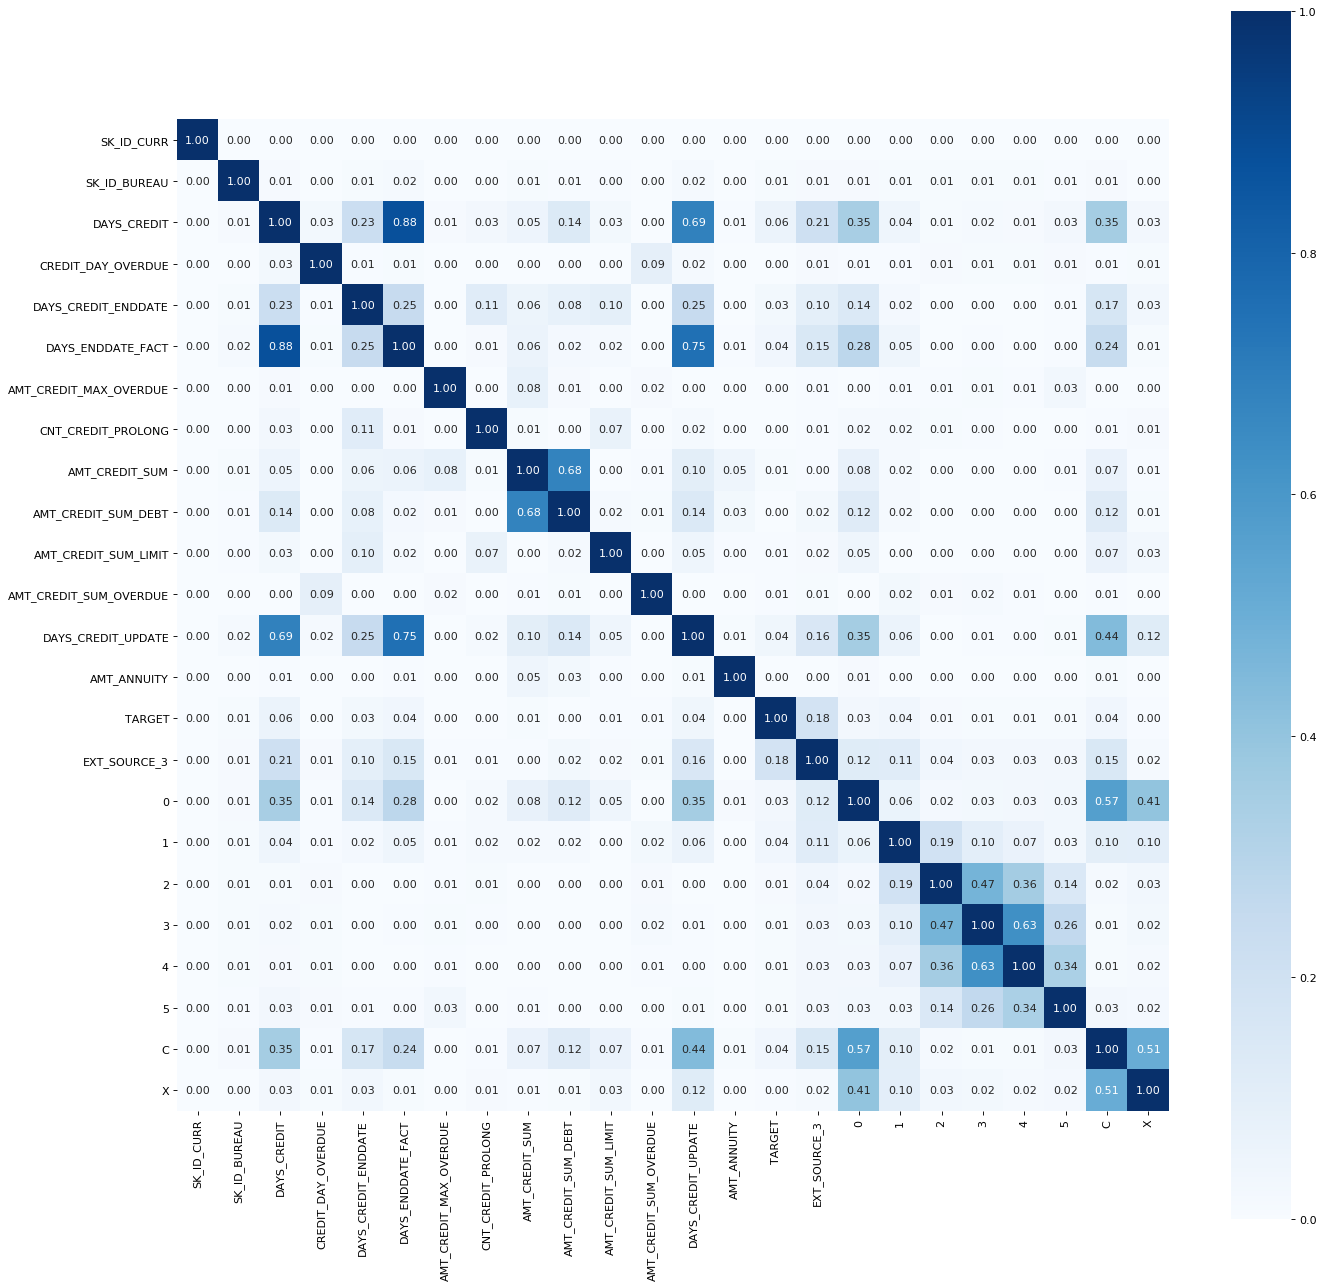

數值型別欄位計共 24 個。


SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  \
SK_ID_CURR                1.000000      0.000135     0.000266   
SK_ID_BUREAU              0.000135      1.000000     0.013015   
DAYS_CREDIT               0.000266      0.013015     1.000000   
CREDIT_DAY_OVERDUE        0.000283     -0.002628    -0.027266   
DAYS_CREDIT_ENDDATE       0.000456      0.009107     0.225682   
DAYS_ENDDATE_FACT        -0.000648      0.017890     0.875359   
AMT_CREDIT_MAX_OVERDUE    0.001329      0.002290    -0.014724   
CNT_CREDIT_PROLONG       -0.000388     -0.000740    -0.030460   
AMT_CREDIT_SUM            0.001179      0.007962     0.050883   
AMT_CREDIT_SUM_DEBT      -0.000790      0.005732     0.135397   
AMT_CREDIT_SUM_LIMIT     -0.000304     -0.003986     0.025140   
AMT_CREDIT_SUM_OVERDUE   -0.000014     -0.000499    -0.000383   
DAYS_CREDIT_UPDATE        0.000510      0.019398     0.688771   
AMT_ANNUITY              -0.002727      0.001799     0.005676   
TARGET                   -0.003024     -0.009018     0.061556   
EXT_SOURCE_3              0.000619     -0.014575    -0.207690   
0                        -0.000185     -0.012083     0.345493   
1                         0.001042     -0.008372     0.044182   
2                         0.001385     -0.009124    -0.010687   
3                        -0.000532     -0.007996    -0.015679   
4                        -0.001066     -0.008870    -0.011916   
5                        -0.001785     -0.006738    -0.028529   
C                        -0.001129      0.014809    -0.351588   
X                         0.001419     -0.001900     0.031019   

                        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
SK_ID_CURR                        0.000283             0.000456   
SK_ID_BUREAU                     -0.002628             0.009107   
DAYS_CREDIT                      -0.027266             0.225682   
CREDIT_DAY_OVERDUE                1.000000            -0.007352   
DAYS_CREDIT_ENDDATE              -0.007352             1.000000   
DAYS_ENDDATE_FACT                -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE            0.001249             0.000577   
CNT_CREDIT_PROLONG                0.002756             0.113683   
AMT_CREDIT_SUM                   -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT              -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT             -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE            0.090951             0.001077   
DAYS_CREDIT_UPDATE               -0.018461             0.248525   
AMT_ANNUITY                      -0.000339             0.000475   
TARGET                            0.002652             0.026497   
EXT_SOURCE_3                     -0.011966            -0.095531   
0                                -0.005992             0.144184   
1                                 0.005548             0.022046   
2                                 0.012891             0.001832   
3                                 0.010226            -0.003134   
4                                 0.010125            -0.002250   
5                                 0.014259            -0.006939   
C                                -0.005205            -0.165422   
X                                 0.009539             0.034388   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                      -0.000648                0.001329   
SK_ID_BUREAU                     0.017890                0.002290   
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT             

In [187]:
heatmap(bureau_train_target_STATUS_count)

[[Back to Top]](#索引)

## <a id=96>96.sample</a>

[[Back to Top]](#索引)

## <a id=97>97.test</a>

[[Back to Top]](#索引)

## <a id=98>98.待確</a>

In [ ]:
bureau.fillna(method='ffill',axis=1)
bureau.head(5)


#sort_day_credit_flag_fillna=sort_day_credit_flag[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM','DAYS_CREDIT_ENDDATE','day_credit_flag']]
#sort_day_credit_flag_fillna.head(n=15)

In [ ]:
sort_missing_data=bureau[['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM','DAYS_CREDIT_ENDDATE']].sort_values(by='AMT_CREDIT_SUM')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(sort_values_REGION_INCOME)
sort_missing_data.head(n=15)
#ssort_missing_data.tail(n=15)
#sort_missing_data

[[Back to Top]](#索引)

# 下面先略過

In [ ]:
bureau.apply(lambda x:x.unique().shape[0],axis=0)

In [ ]:
#bureau.columns[bureau.dtypes == 'object']
for i in bureau.columns[bureau.dtypes == 'object']:
    print(i)

In [ ]:
np.unique(bureau['CREDIT_ACTIVE'])

In [ ]:
np.unique(bureau['CREDIT_CURRENCY'])

In [ ]:
np.unique(bureau['CREDIT_TYPE'])

In [ ]:
b= pd.unique(bureau['CREDIT_ACTIVE'])
c= pd.DataFrame(b,columns=['CREDIT_ACTIVE'])
#print('CREDIT_ACTIVE', b)
c

In [ ]:
#pd.unique?

In [ ]:
d = np.unique(bureau[bureau.columns[bureau.dtypes == 'object']])
d

In [ ]:
e= pd.DataFrame(columns=[bureau.columns[bureau.dtypes == 'object']])
e

In [ ]:
#pd.concat

In [ ]:
#plt.figure(figsize=(20,20),dpi=200)
#sns.heatmap(np.abs(bureau.corr()),cmap="Blues",
#           vmin=0,
#          vmax=1,
#          square=True,
#           annot=True)
#plt.show()

In [ ]:
#plt.figure(figsize=(20,20),dpi=200)

##sns.pairplot(data=bureau, vars=["SK_ID_BUREAU", "MONTHS_BALANCE", "STATUS"])
#sns.pairplot(data=bureau, vars=bureau.columns[0:5])
#plt.show()

In [ ]:
#plt.figure(figsize=(20,20),dpi=200)

##sns.pairplot(data=bureau, vars=["SK_ID_BUREAU", "MONTHS_BALANCE", "STATUS"])
#sns.pairplot(data=bureau, vars=bureau.columns[0:10])
#plt.show()

In [ ]:
#plt.figure(figsize=(20,20),dpi=200)

##sns.pairplot(data=bureau, vars=["SK_ID_BUREAU", "MONTHS_BALANCE", "STATUS"])
#sns.pairplot(data=bureau, vars=bureau.columns[10:18])
#plt.show()

In [ ]:
#plt.figure(figsize=(20,12),dpi=200)

#sns.pairplot(data=bureau, vars=["SK_ID_CURR", "SK_ID_BUREAU", "DAYS_CREDIT"])
#sns.pairplot(data=bureau, vars=bureau.columns)
#plt.show()

[[Back to Top]](#索引)

## <a id=99>99.印出所有報告</a>

--pandas_profiling.ProfileReport()--印出所有報告

In [ ]:
df = bureau.copy()
df.head(15)

In [ ]:
df2 = df.iloc[0:10]
df2

In [ ]:
total_info(df2)

In [ ]:
pfr = pandas_profiling.ProfileReport(df2)
pfr

In [ ]:
pfr.to_file('test2-report.html')

[[Back to Top]](#索引)